## Problem:

## For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

## Importing the Necessary Library

In [3]:
# Importing the necessary packages

import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import seaborn                         as      sns
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 01 Read the data as an appropriate Time Series data and plot the data.

In [4]:
dfr = pd.read_csv('Rose.csv',parse_dates=True,index_col='YearMonth')
##dfr.head().to_csv('rose_head.csv')
dfr.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [5]:
dfr.tail()

Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

In [6]:
dfs = pd.read_csv('Sparkling.csv',parse_dates=True,index_col='YearMonth')
##dfs.head().to_csv('spark_head.csv')
dfs.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [7]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [8]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [9]:
dfr.shape

(187, 1)

In [10]:
dfs.shape

(187, 1)

## Check for Missing Value for Both the dataset respectively:

In [11]:
dfs.isna().sum()

Sparkling    0
dtype: int64

In [12]:
dfr.isna().sum()

Rose    2
dtype: int64

## Fill Missing Values by Interpolation.

In [13]:
dfr = dfr.interpolate()

In [14]:
dfr.isna().sum()

Rose    0
dtype: int64

## Plot the Time Series.

In [15]:
rcParams['figure.figsize'] = 16,9

Text(0.5, 1.0, 'Rose Wine Time Series')

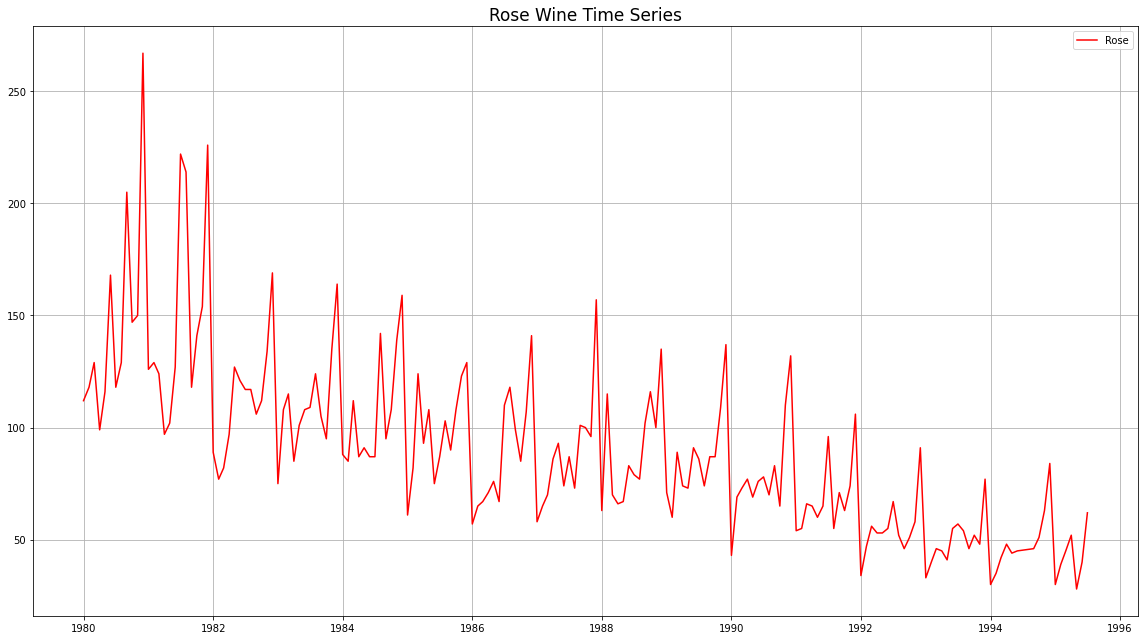

In [16]:
# ROSE TIME SERIES

plt.plot(dfr, color='red');
plt.title('Rose Wine Time Series', fontsize=17);
plt.grid();
plt.legend(['Rose'], loc='best');
plt.tight_layout()

Text(0.5, 1.0, 'Sparkling Wine Time Series')

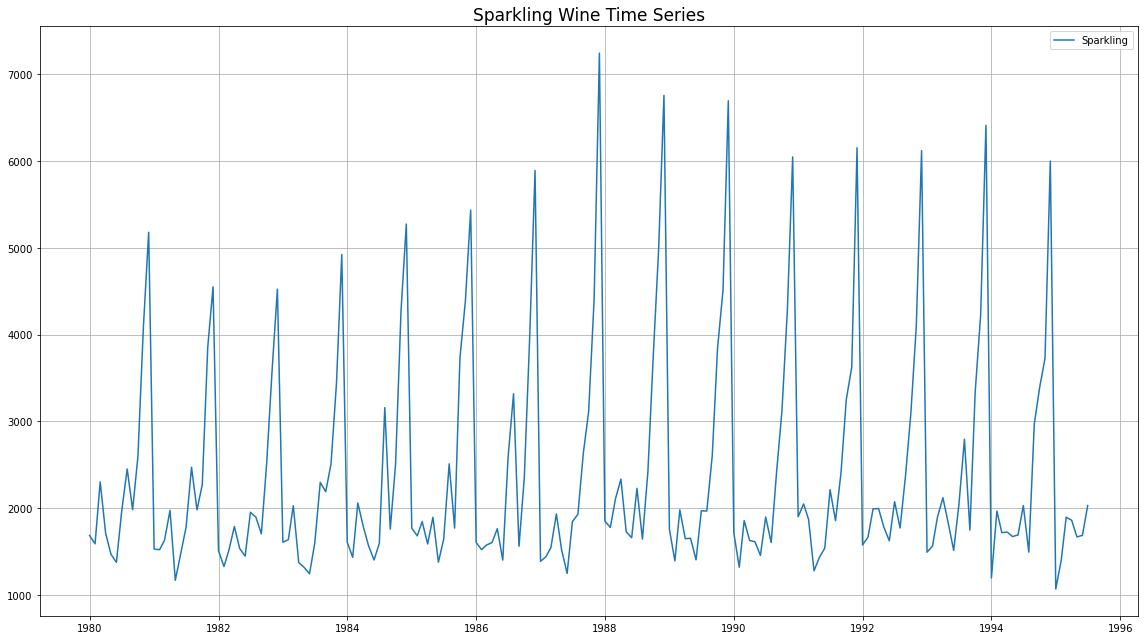

In [17]:
# SPARKLING TIME SERIES

plt.plot(dfs);
plt.title('Sparkling Wine Time Series', fontsize=17);
plt.grid();
plt.legend(['Sparkling']);
plt.tight_layout()


# 02. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

## Check the basic measures of descriptive statistics of the Time Series.

In [18]:
round(dfr.describe().T,3).to_csv('rose_describe.csv')
round(dfr.describe().T,3)

count    mean     std   min   25%   50%    75%    max
Rose  187.0  89.914  39.238  28.0  62.5  85.0  111.0  267.0

## Plot a year on year boxplot for the Rose wine Sales.

### Now, let us plot a box and whisker (1.5* IQR) plot to understand the spread of the data and check for outliers in each year, if any.

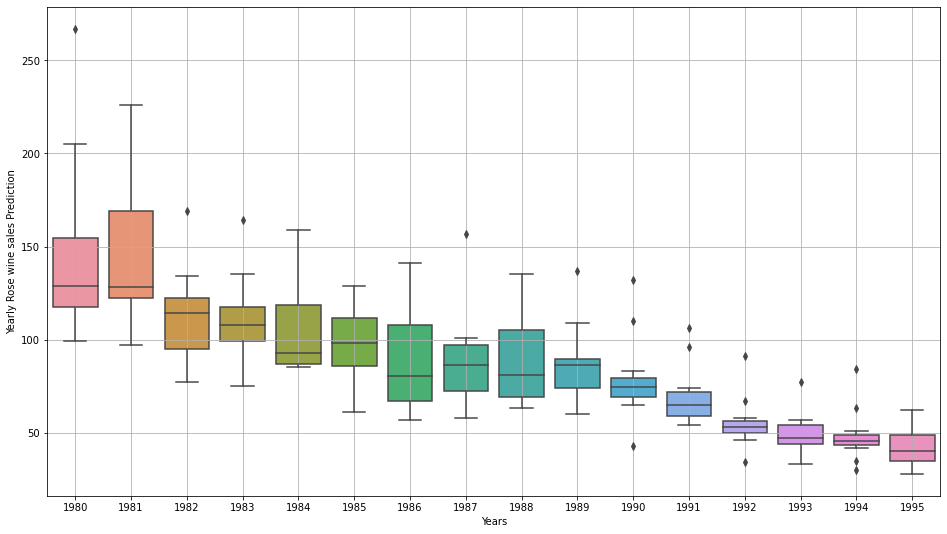

In [19]:
sns.boxplot(x = dfr.index.year, y = dfr['Rose']);
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Rose wine sales Prediction');

### As we got to know from the Time Series plot, the boxplots over here also indicates a measure of trend being present. Also, we see that the Rose wine Sales has some outliers for certain years.

## Plot Box-plot Monthwise.

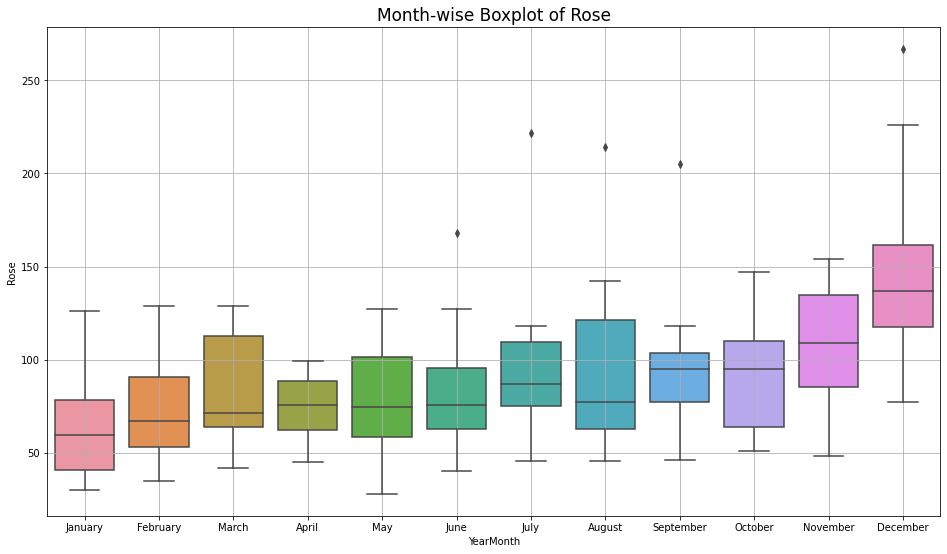

In [20]:
sns.boxplot(x = dfr.index.month_name(), y = dfr['Rose']);
plt.grid();
plt.title('Month-wise Boxplot of Rose', fontsize=17);

## Plot a monthplot of the given Time series of Rose wine sales.

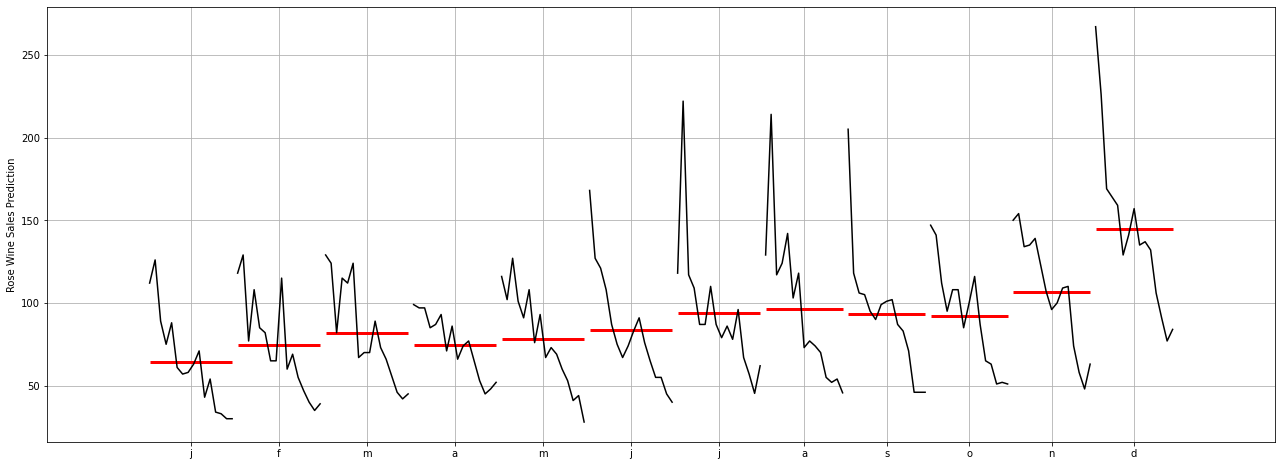

In [21]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))
month_plot(dfr,ylabel='Rose Wine Sales Prediction',ax=ax)
plt.grid();

## Plot the Time Series according to different months for different years for Rose Wine Sales.

In [22]:
yearly_sales_across_months = pd.pivot_table(dfr, values = 'Rose', columns = dfr.index.month, 
                                        index = dfr.index.year)
yearly_sales_across_months

YearMonth     1      2      3     4      5      6           7           8   \
YearMonth                                                                    
1980       112.0  118.0  129.0  99.0  116.0  168.0  118.000000  129.000000   
1981       126.0  129.0  124.0  97.0  102.0  127.0  222.000000  214.000000   
1982        89.0   77.0   82.0  97.0  127.0  121.0  117.000000  117.000000   
1983        75.0  108.0  115.0  85.0  101.0  108.0  109.000000  124.000000   
1984        88.0   85.0  112.0  87.0   91.0   87.0   87.000000  142.000000   
1985        61.0   82.0  124.0  93.0  108.0   75.0   87.000000  103.000000   
1986        57.0   65.0   67.0  71.0   76.0   67.0  110.000000  118.000000   
1987        58.0   65.0   70.0  86.0   93.0   74.0   87.000000   73.000000   
1988        63.0  115.0   70.0  66.0   67.0   83.0   79.000000   77.000000   
1989        71.0   60.0   89.0  74.0   73.0   91.0   86.000000   74.000000   
1990        43.0   69.0   73.0  77.0   69.0   76.0   78.000000   70.000000   
1991        54.0   55.0   66.0  65.0   60.0   65.0   96.000000   55.000000   
1992        34.0   47.0   56.0  53.0   53.0   55.0   67.000000   52.000000   
1993        33.0   40.0   46.0  45.0   41.0   55.0   57.000000   54.000000   
1994        30.0   35.0   42.0  48.0   44.0   45.0   45.333333   45.666667   
1995        30.0   39.0   45.0  52.0   28.0   40.0   62.000000         NaN   

YearMonth     9      10     11     12  
YearMonth                              
1980       205.0  147.0  150.0  267.0  
1981       118.0  141.0  154.0  226.0  
1982       106.0  112.0  134.0  169.0  
1983       105.0   95.0  135.0  164.0  
1984        95.0  108.0  139.0  159.0  
1985        90.0  108.0  123.0  129.0  
1986        99.0   85.0  107.0  141.0  
1987       101.0  100.0   96.0  157.0  
1988       102.0  116.0  100.0  135.0  
1989        87.0   87.0  109.0  137.0  
1990        83.0   65.0  110.0  132.0  
1991        71.0   63.0   74.0  106.0  
1992        46.0   51.0   58.0   91.0  
1993        46.0   52.0   48.0   77.0  
1994        46.0   51.0   63.0   84.0  
1995         NaN    NaN    NaN    NaN

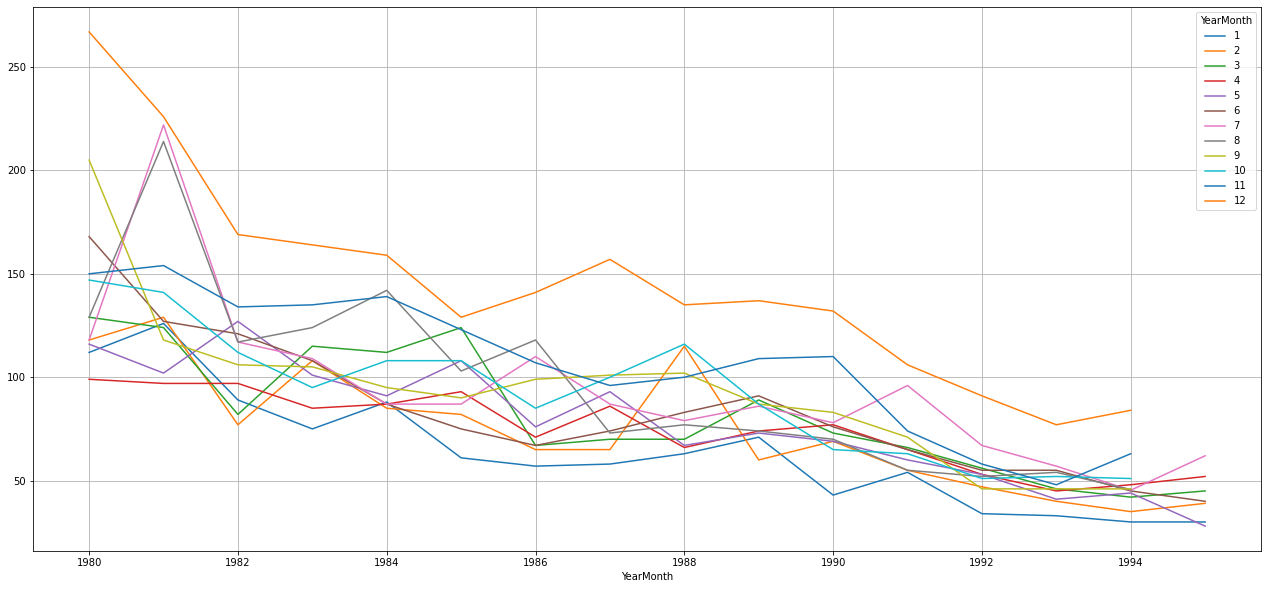

In [23]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
plt.grid();

# 02(B) Decompose the Time Series and plot the different components.

In [24]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

### Additive Decomposition of Rose Wine Sales.

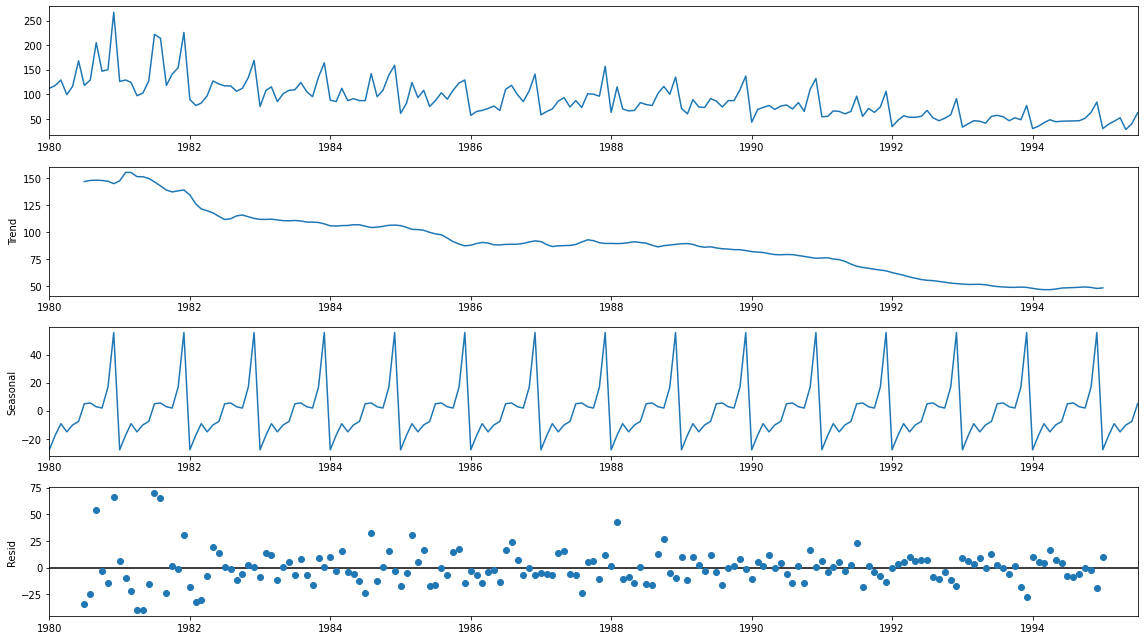

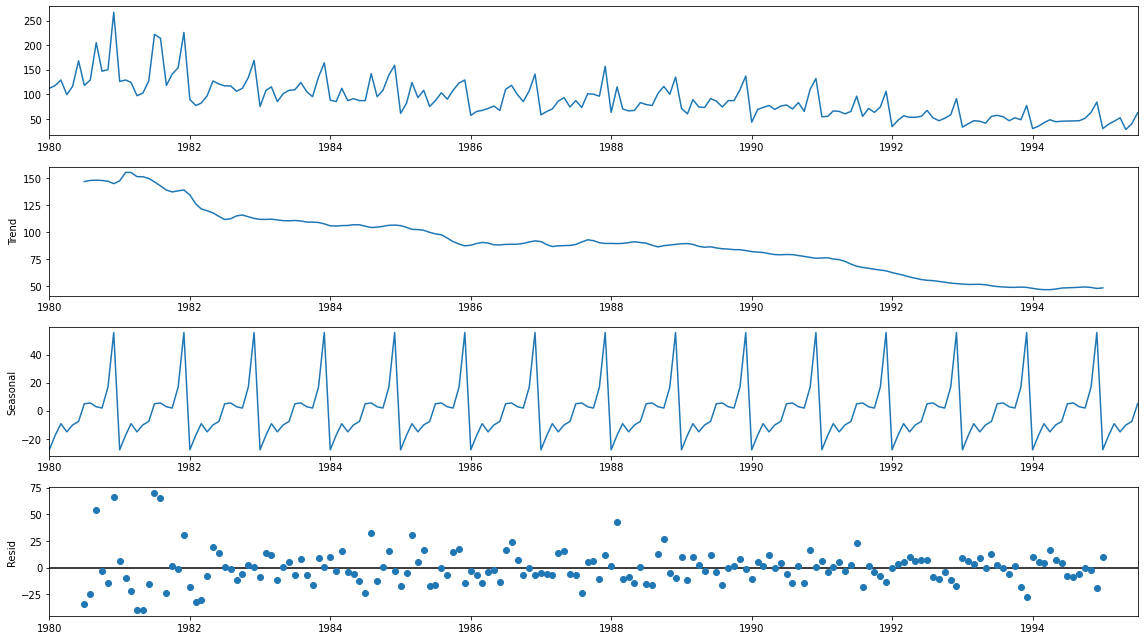

In [25]:
decompositionr = seasonal_decompose(dfr,model='additive')

decompositionr.plot()


In [26]:
trend = decompositionr.trend
seasonality = decompositionr.seasonal
residual = decompositionr.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -27.908647
1980-02-01   -17.435632
1980-03-01    -9.285830
1980-04-01   -15.098330
1980-05-01   -10.196544
1980-06-01    -7.678687
1980-07-01     4.896908
1980-08-01     5.499686
1980-09-01     2.774686
1980-10-01     1.871908
1980-11-01    16.846908
1980-12-01    55.713575
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -33.980241
1980-08-01   -24.624686
1980-09-01    53.850314
1980-10-01    -2.955241
1980-11-01   -14.263575
1980-12-01    66.16142

In [27]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(12)

YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    113.103092
1980-08-01    123.500314
1980-09-01    202.225314
1980-10-01    145.128092
1980-11-01    133.153092
1980-12-01    211.286425
dtype: float64

<AxesSubplot:xlabel='YearMonth'>

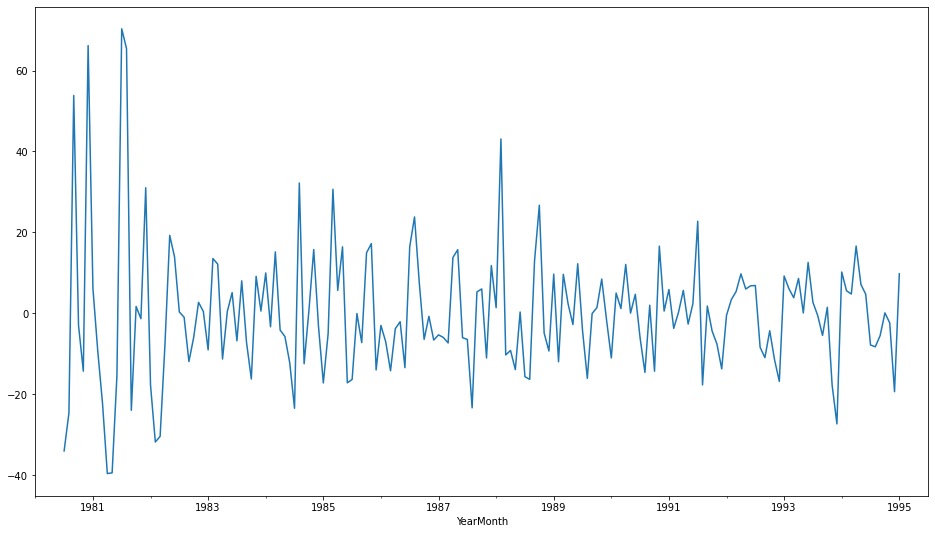

In [28]:
residual.plot()

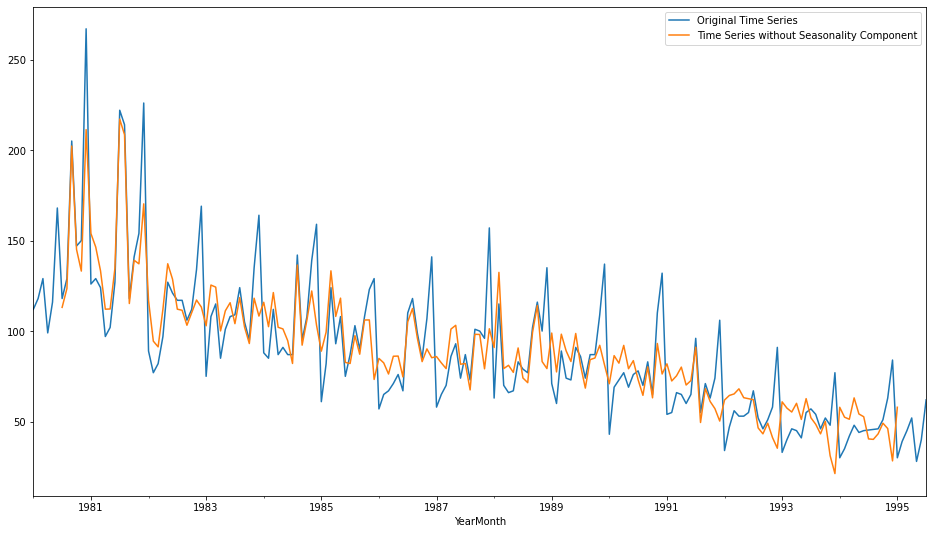

In [29]:
dfr.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

## Multiplicative Decomposition of Rose wine Sales.

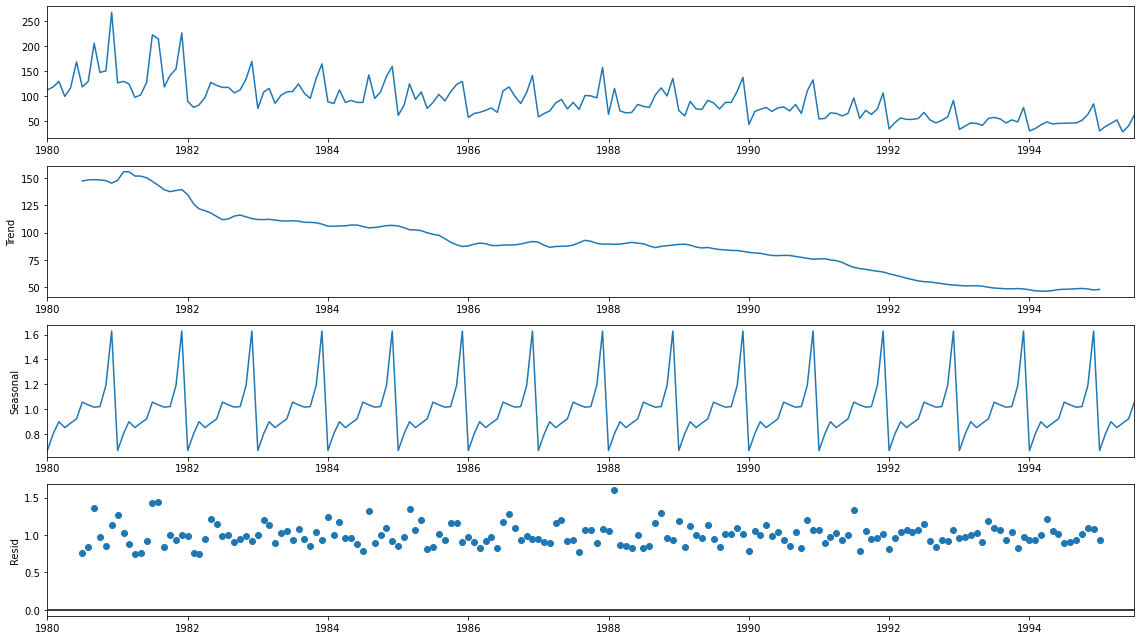

In [30]:
decompositionmr = seasonal_decompose(dfr,model='multiplicative')
decompositionmr.plot();

In [31]:
trend = decompositionmr.trend
seasonality = decompositionmr.seasonal
residual = decompositionmr.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.670111
1980-02-01    0.806163
1980-03-01    0.901164
1980-04-01    0.854024
1980-05-01    0.889415
1980-06-01    0.923985
1980-07-01    1.058038
1980-08-01    1.035881
1980-09-01    1.017648
1980-10-01    1.022573
1980-11-01    1.192349
1980-12-01    1.628646
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.758258
1980-08-01    0.840720
1980-09-01    1.357674
1980-10-01    0.970771
1980-11-01    0.853378
1980-12-01    1.129646
Name: resid, dtype: fl

<AxesSubplot:xlabel='YearMonth'>

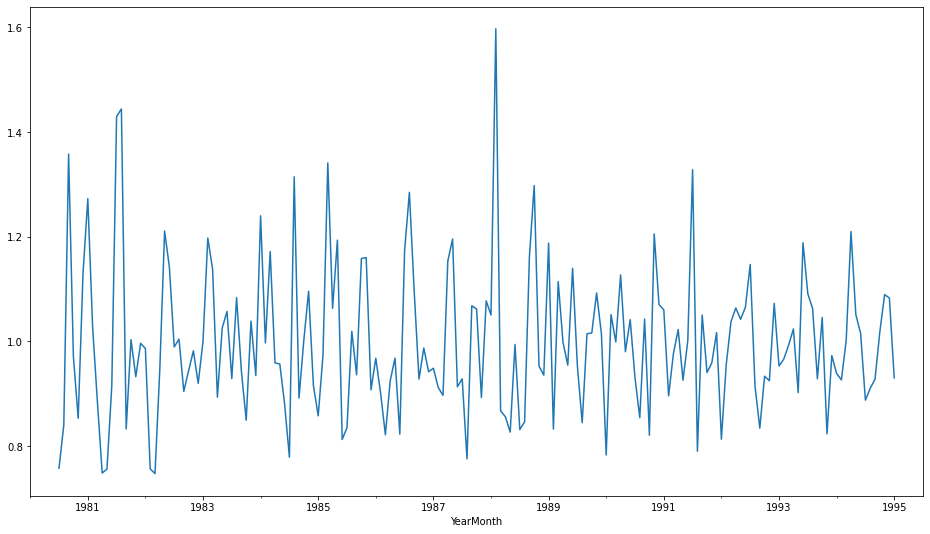

In [32]:
residual.plot()

#### For the multiplicative series, we see that a lot of residuals are located around 1.

## 03. Split the data into training and test. The test data should start in 1991.

### Spliting the Rose Wine Sales into Training & Test Set.

In [33]:
# ROSE DATA SPLIT
rtrain = dfr[dfr.index<'1991'] 
rtest = dfr[dfr.index>='1991']

In [34]:
print(rtrain.shape)
print(rtest.shape)

(132, 1)
(55, 1)


In [35]:
rtest.head()

Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0

#### The above dataframe represnts that the test data has started from 1991 for Rose Wine Sales.

## Spliting the Sparkling Wine Sales into Training & Test Set.

In [36]:
# SPARKLING DATA SPLIT
strain = dfs[dfs.index<'1991'] 
stest = dfs[dfs.index>='1991']

In [37]:
print(strain.shape)
print(stest.shape)

(132, 1)
(55, 1)


In [38]:
stest.head()

Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432

#### The above dataframe represnts that the test data has started from 1991 for Sparkling Wine Sales.

In [39]:
from IPython.display import display

#### ROSE WINE SALES DATA TRAIN AND TEST.

In [40]:
print('First few rows of Rose Training Data')
display(rtrain.head())
print('Last few rows of Rose Training Data')
display(rtrain.tail())
print('First few rows of Rose Test Data')
display(rtest.head())
print('Last few rows of Rose Test Data')
display(rtest.tail())

First few rows of Rose Training Data


Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

Last few rows of Rose Training Data


Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0

First few rows of Rose Test Data


Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0

Last few rows of Rose Test Data


Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

In [41]:
#### SPARKLING WINE SALES DATA TRAIN AND TEST.

In [42]:
print('First few rows of Sparkling Training Data')
display(strain.head())
print('Last few rows of Sparkling Training Data')
display(strain.tail())
print('First few rows of Sparkling Test Data')
display(stest.head())
print('Last few rows of Sparkling Test Data')
display(stest.tail())

First few rows of Sparkling Training Data


Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

Last few rows of Sparkling Training Data


Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

First few rows of Sparkling Test Data


Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432

Last few rows of Sparkling Test Data


Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

#### ROSE WINE SALES DATA TRAIN TEST SPLIT TIME SERIES.

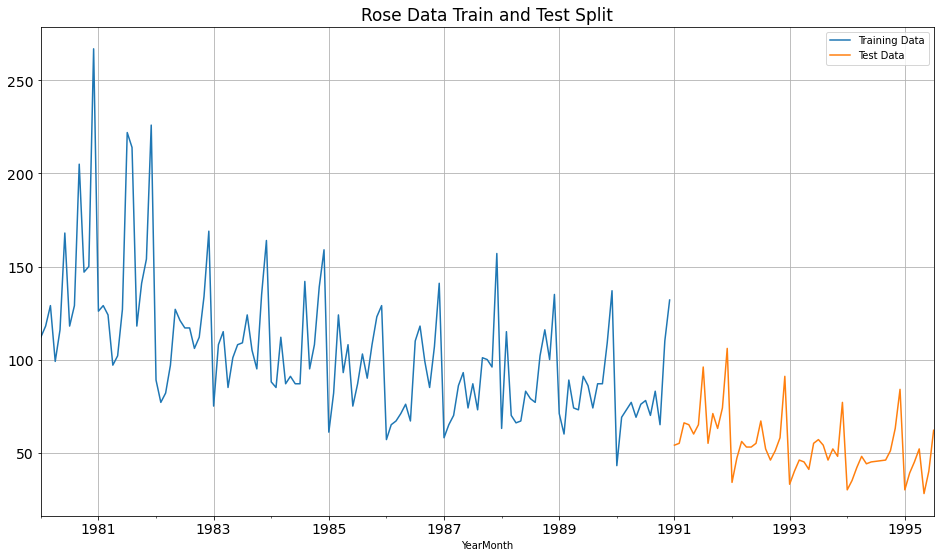

In [43]:
rtrain['Rose'].plot(fontsize=14)
rtest['Rose'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.title('Rose Data Train and Test Split', fontsize=17)
plt.show();

### SPARKLING Wine Sales DATA TRAIN TEST SPLIT TIME SERIES

<AxesSubplot:xlabel='YearMonth'>

<AxesSubplot:xlabel='YearMonth'>

Text(0.5, 1.0, 'Sparkling Data Train and Test Split')

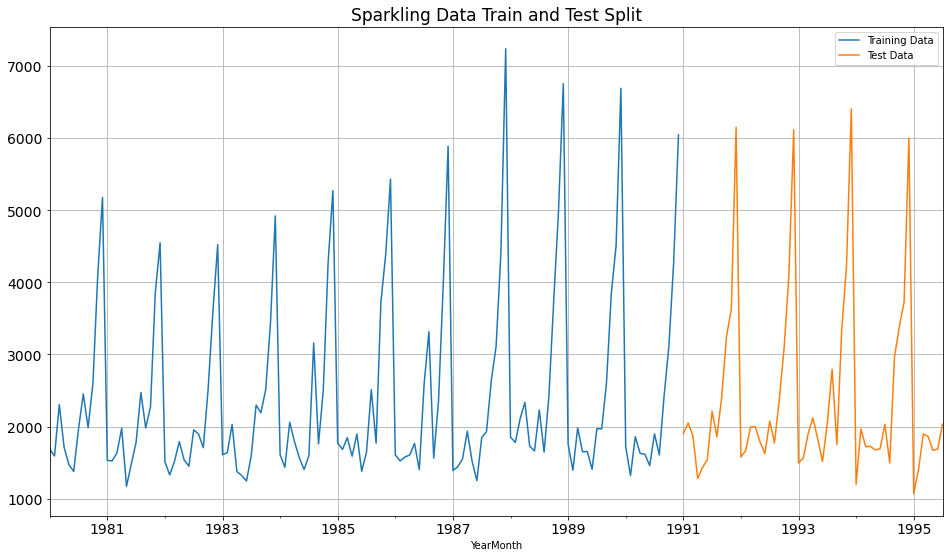

In [44]:
strain['Sparkling'].plot(fontsize=14)
stest['Sparkling'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.title('Sparkling Data Train and Test Split', fontsize=17)
plt.show()

## Building different models and comparing the accuracy metrics.¶
### Model 1: Linear Regression on Rose Wine Sales.
### For this particular linear regression, we are going to regress the 'Rose' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression

In [45]:
rtrain.shape
rtest.shape

(132, 1)

(55, 1)

In [46]:
train_time = [i+1 for i in range(len(rtrain))]
test_time = [i+133 for i in range(len(rtest))]
print('Training Time Instance :','\n',train_time)
print('Test Time Instance :','\n',test_time)

Training Time Instance : 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time Instance : 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


#### We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [47]:
LinearRegression_train = rtrain.copy()
LinearRegression_test = rtest.copy()

In [48]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5

Last few rows of Training Data


Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132

First few rows of Test Data


Rose  time
YearMonth             
1991-01-01  54.0   133
1991-02-01  55.0   134
1991-03-01  66.0   135
1991-04-01  65.0   136
1991-05-01  60.0   137

Last few rows of Test Data


Rose  time
YearMonth             
1995-03-01  45.0   183
1995-04-01  52.0   184
1995-05-01  28.0   185
1995-06-01  40.0   186
1995-07-01  62.0   187

### Now that our training and test data has been modified, let us go ahead use  𝐿𝑖𝑛𝑒𝑎𝑟𝑅𝑒𝑔𝑟𝑒𝑠𝑠𝑖𝑜𝑛⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯  to build the model on the training data and test the model on the test data.

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lr = LinearRegression()

In [51]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'])

LinearRegression()

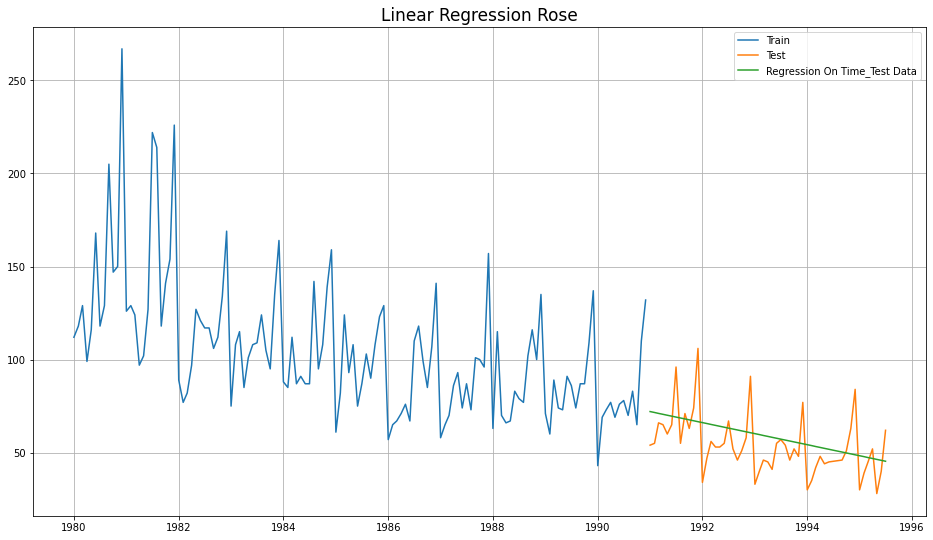

In [52]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot(rtrain['Rose'], label='Train')
plt.plot(rtest['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.title('Linear Regression Rose', fontsize=17)
plt.legend(loc='best')
plt.grid();

### Defining the functions for calculating the accuracy metrics.

In [53]:
from sklearn import metrics

### Model Evaluation for Rose wine Sales Data.

In [54]:
rmse_model11_test = metrics.mean_squared_error(rtest['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model11_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.269 


In [55]:
resultsDf = pd.DataFrame({'Test RMSE Rose': [rmse_model11_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE Rose
RegressionOnTime       15.268955

## Model 2: Naive Approach Rose : 𝑦̂ 𝑡+1=𝑦𝑡

### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [56]:
NaiveModel_train = rtrain.copy()
NaiveModel_test = rtest.copy()

In [57]:
rtrain.tail()

Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0

In [58]:
rtest.tail()

Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

In [59]:
rtest.head()

Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0

In [60]:
NaiveModel_test['naive'] = np.asarray(rtrain['Rose'])[len(np.asarray(rtrain['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

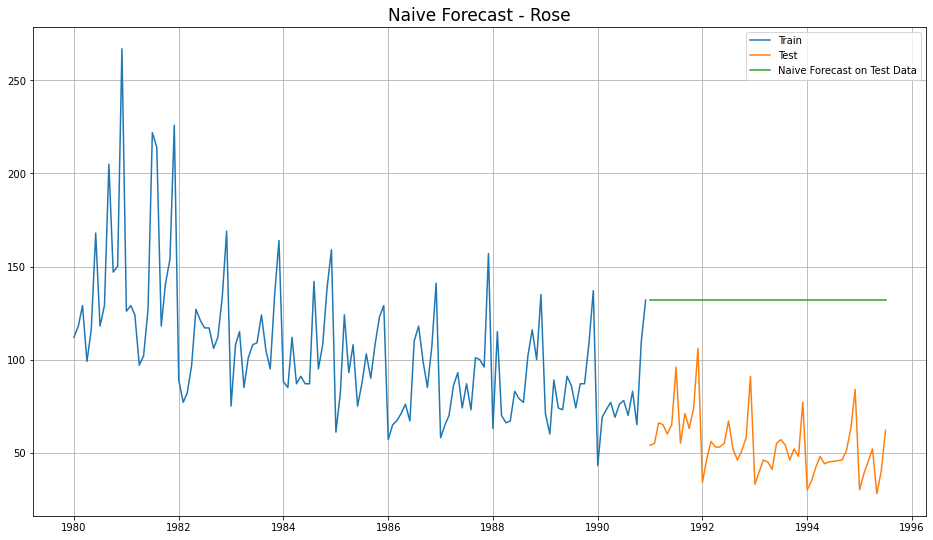

In [61]:
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(rtest['Rose'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast - Rose", fontsize=17)
plt.grid();

### Model Evaluation for Rose Wine Sales.

In [62]:
rmse_model21_test = metrics.mean_squared_error(rtest['Rose'],NaiveModel_test['naive'],squared=False)
print("For NaiveModel forecast on the Test Data,  RMSE is %3.3f" %(rmse_model21_test))

For NaiveModel forecast on the Test Data,  RMSE is 79.719


In [63]:
resultsDf_21 = pd.DataFrame({'Test RMSE Rose': [rmse_model21_test]},index=['NaiveModel'])

resultsDf_rn = pd.concat([resultsDf, resultsDf_21])
resultsDf_rn

Test RMSE Rose
RegressionOnTime       15.268955
NaiveModel             79.718773

## Model 3: Simple Average Rose Wine Sales:

### For this particular simple average method, we will forecast by using the average of the training values.

In [64]:
SimpleAverage_train = rtrain.copy()
SimpleAverage_test = rtest.copy()

In [65]:
SimpleAverage_test['mean_forecast'] = rtrain['Rose'].mean()
SimpleAverage_test.head()

Rose  mean_forecast
YearMonth                      
1991-01-01  54.0     104.939394
1991-02-01  55.0     104.939394
1991-03-01  66.0     104.939394
1991-04-01  65.0     104.939394
1991-05-01  60.0     104.939394

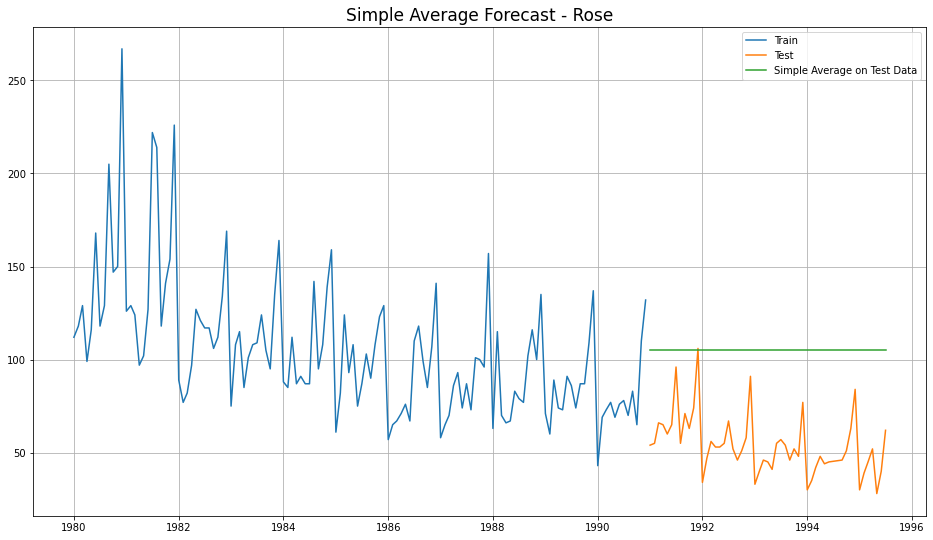

In [66]:
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast - Rose", fontsize=17)
plt.grid();

### Model Evaluation for Rose Wine Sales.

In [67]:
rmse_model31_test = metrics.mean_squared_error(rtest['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on Rose Test Data,  RMSE is %3.3f" %(rmse_model31_test))

For Simple Average forecast on Rose Test Data,  RMSE is 53.461


In [68]:
resultsDf_31 = pd.DataFrame({'Test RMSE Rose': [rmse_model31_test]},index=['SimpleAverageModel'])
resultsDf_sam= pd.concat([resultsDf, resultsDf_21, resultsDf_31])
resultsDf_sam

Test RMSE Rose
RegressionOnTime         15.268955
NaiveModel               79.718773
SimpleAverageModel       53.460570

## Model 4: Moving Average(MA) - Rose Wine Sales.

### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

#### For Moving Average, we are going to average over the entire data.

In [69]:
MovingAverage = dfr.copy()
MovingAverage.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

#### Trailing moving averages for Rose wine Sales.

In [70]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                        
1980-01-01  112.0         NaN         NaN         NaN         NaN
1980-02-01  118.0       115.0         NaN         NaN         NaN
1980-03-01  129.0       123.5         NaN         NaN         NaN
1980-04-01   99.0       114.0       114.5         NaN         NaN
1980-05-01  116.0       107.5       115.5         NaN         NaN

Text(0.5, 1.0, 'Moving Average Forecast - Rose')

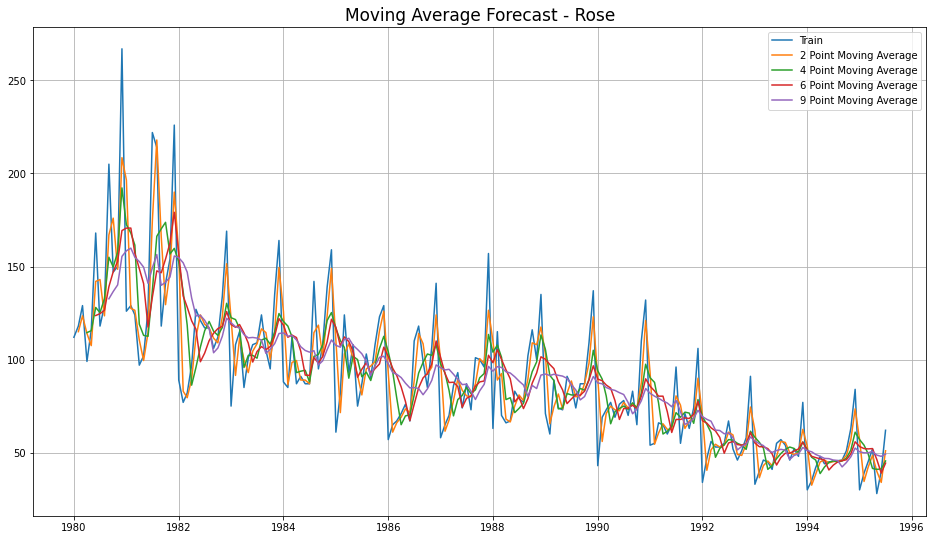

In [71]:
## Plotting on the whole data

plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average Forecast - Rose', fontsize=17)

#### Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [72]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

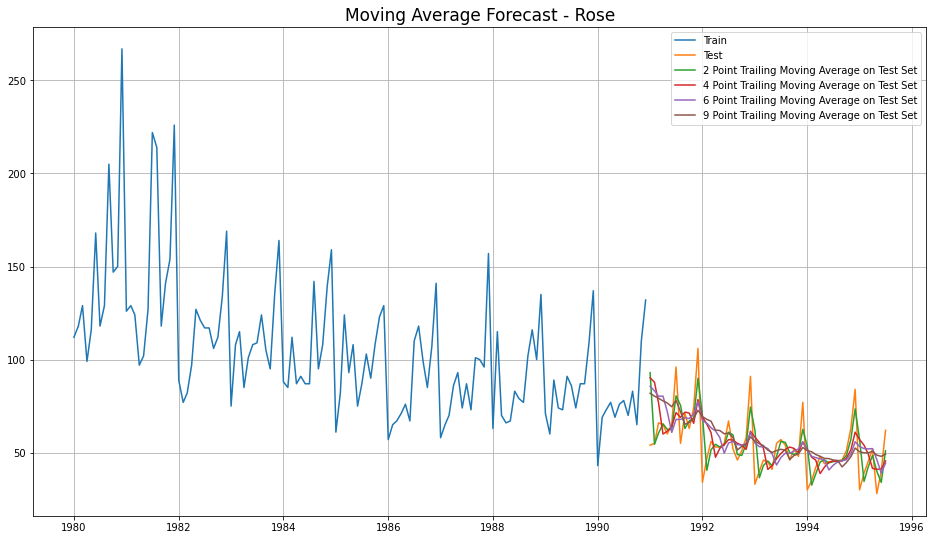

In [73]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average Forecast - Rose', fontsize=17);

## Model Evaluation.

#### Done only on the test data.

In [74]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on Rose Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on Rose Training Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on Rose Training Data,  RMSE is 14.566
For 9 point Moving Average Model forecast on Rose Training Data,  RMSE is 14.728


In [75]:
resultsDf_41 = pd.DataFrame({'Test RMSE Rose': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])
resultsDf_41

Test RMSE Rose
2pointTrailingMovingAverage       11.529278
4pointTrailingMovingAverage       14.451403
6pointTrailingMovingAverage       14.566327
9pointTrailingMovingAverage       14.727630

In [76]:
resultsDf_fm = pd.concat([resultsDf_sam, resultsDf_41], axis=0)
resultsDf_fm

Test RMSE Rose
RegressionOnTime                  15.268955
NaiveModel                        79.718773
SimpleAverageModel                53.460570
2pointTrailingMovingAverage       11.529278
4pointTrailingMovingAverage       14.451403
6pointTrailingMovingAverage       14.566327
9pointTrailingMovingAverage       14.727630

## Consolidated plots of All Models- Rose Wine Sales.

In [77]:
# LR on Rose
train_time = [i+1 for i in range(len(rtrain))]
test_time = [i+133 for i in range(len(rtest))]
LinearRegression_train = rtrain.copy()
LinearRegression_test = rtest.copy()
LinearRegression_test['time'] = test_time
LinearRegression_train['time'] = train_time
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'])
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

# NB on Rose
NaiveModel_train = rtrain.copy()
NaiveModel_test = rtest.copy()
NaiveModel_test['naive'] = np.asarray(rtrain['Rose'])[len(np.asarray(rtrain['Rose']))-1]

# SA on Rose
SimpleAverage_train = rtrain.copy()
SimpleAverage_test = rtest.copy()
SimpleAverage_test['mean_forecast'] = rtrain['Rose'].mean()

# MA on Rose

MovingAverage = dfr.copy()
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
trailing_MovingAverage_test = MovingAverage[MovingAverage.index>='1991']

LinearRegression()

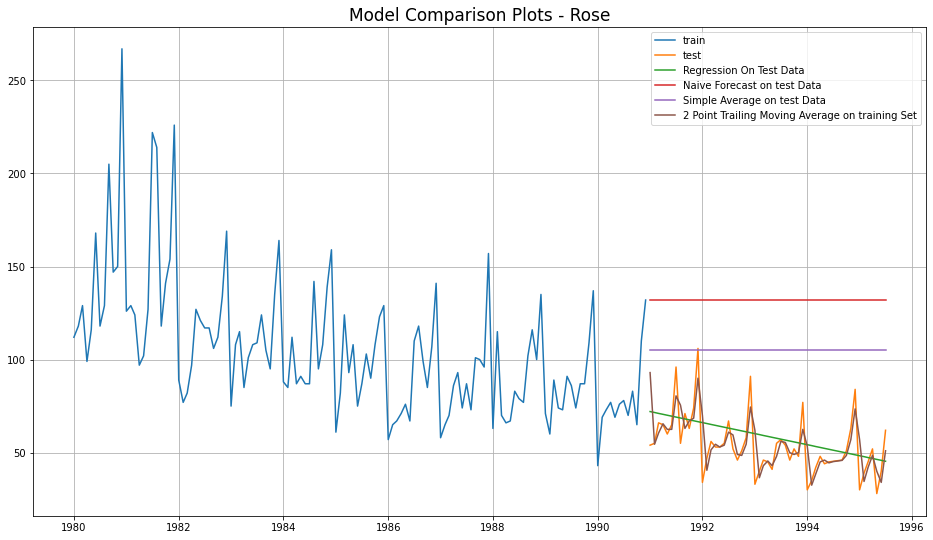

In [78]:
## Plotting on both rtraining and rtest data

plt.plot(rtrain['Rose'], label='train')
plt.plot(rtest['Rose'], label='test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots - Rose", fontsize=17)
plt.grid();

## Model 5: Building a Simple Exponential Smoothing model by using the parameter 'optimise=True' within the '.fit()' function. Then,evaluate the same model on the test set using RMSE.

In [79]:
# Importing the necessary packages

import statsmodels.tools.eval_measures as      em
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt

## SES - ETS(A, N, N) - Simple Exponential Smoothing with additive errors - ROSE Wine Sales.

#### SimpleExpSmoothing class must be instantiated and passed the training data.

#### The fit() function is then called providing the fit configuration, the alpha value, smoothing_level. If this is omitted or set to None, the model will automatically optimize the value.

In [80]:
SES_train = rtrain.copy()
SES_test = rtest.copy()

In [81]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

C:\Users\jyoti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jyoti\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [82]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [83]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.09874989825614361,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38702255613862,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [84]:
# Using the fitted model on the training set to forecast on the test set
SES_predict_rose = model_SES_autofit.forecast(steps=len(rtest))
SES_predict_rose

C:\Users\jyoti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01    87.104999
1991-02-01    87.104999
1991-03-01    87.104999
1991-04-01    87.104999
1991-05-01    87.104999
1991-06-01    87.104999
1991-07-01    87.104999
1991-08-01    87.104999
1991-09-01    87.104999
1991-10-01    87.104999
1991-11-01    87.104999
1991-12-01    87.104999
1992-01-01    87.104999
1992-02-01    87.104999
1992-03-01    87.104999
1992-04-01    87.104999
1992-05-01    87.104999
1992-06-01    87.104999
1992-07-01    87.104999
1992-08-01    87.104999
1992-09-01    87.104999
1992-10-01    87.104999
1992-11-01    87.104999
1992-12-01    87.104999
1993-01-01    87.104999
1993-02-01    87.104999
1993-03-01    87.104999
1993-04-01    87.104999
1993-05-01    87.104999
1993-06-01    87.104999
1993-07-01    87.104999
1993-08-01    87.104999
1993-09-01    87.104999
1993-10-01    87.104999
1993-11-01    87.104999
1993-12-01    87.104999
1994-01-01    87.104999
1994-02-01    87.104999
1994-03-01    87.104999
1994-04-01    87.104999
1994-05-01    87.104999
1994-06-01    87

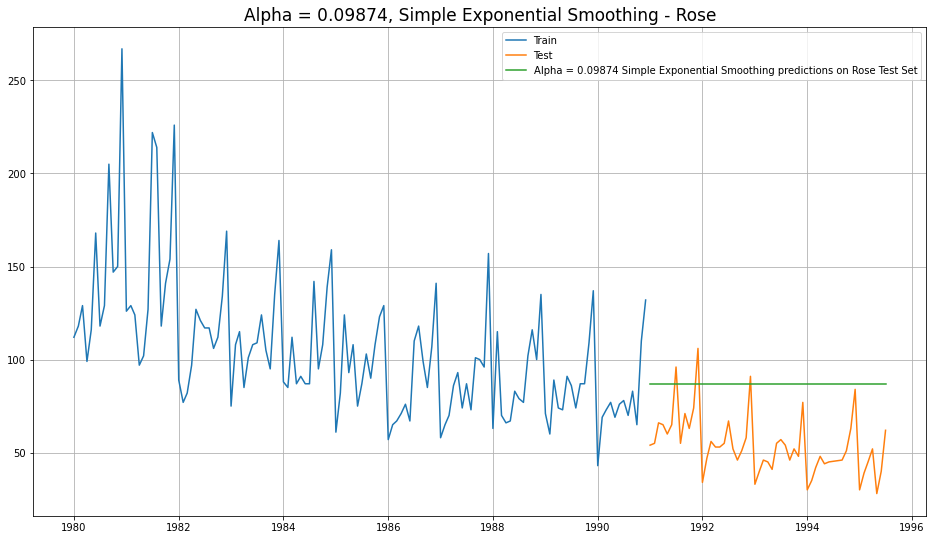

In [85]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha = 0.09874 Simple Exponential Smoothing predictions on Rose Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.09874, Simple Exponential Smoothing - Rose', fontsize=17);

### Model Evaluation for  𝛼  = 0.09874 : Simple Exponential Smoothing.

In [86]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [87]:
print('SES RMSE:',mean_squared_error(rtest.values,SES_predict_rose.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(rtest.values,SES_predict_rose.values)[0])

SES RMSE: 36.79624208189247
SES RMSE (calculated using statsmodels): 36.79624208189247


In [88]:
resultsDf_rses = pd.DataFrame({'Test RMSE Rose': [em.rmse(rtest.values,SES_predict_rose.values)[0]]},index=['Simple Exponential Smoothing'])
resultsDf_rses

Test RMSE Rose
Simple Exponential Smoothing       36.796242

In [89]:
resultsDf_model = pd.DataFrame({'Alpha Values':[],'Test RMSE': []})
resultsDf_model

Empty DataFrame
Columns: [Alpha Values, Test RMSE]
Index: []

## Model 6: Holt - ETS(A, A, N) - Holt's linear method with additive errors - Rose Wine Sales.

## Double Exponential Smoothing - Rose


* One of the drawbacks of the simple exponential smoothing is that the model does not do well in the presence of the trend.
* This model is an extension of SES known as Double Exponential model which estimates two smoothing parameters.
* Applicable when data has Trend but no seasonality.
* Two separate components are considered: Level and Trend.
* Level is the local mean.
* One smoothing parameter α corresponds to the level series
* A second smoothing parameter β corresponds to the trend series.

#### Two parameters  𝛼  and  𝛽  are estimated in this model. Level and Trend are accounted for in this model.

In [90]:
DES_train = rtrain.copy()
DES_test = rtest.copy()

In [91]:
model_DES = Holt(DES_train['Rose'], initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('Holt model Exponential Smoothing Estimated Parameters :')
print('')
print(model_DES.params)

C:\Users\jyoti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



Holt model Exponential Smoothing Estimated Parameters :

{'smoothing_level': 1.4901247095597348e-08, 'smoothing_trend': 7.3896641488640725e-09, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 137.81551313502814, 'initial_trend': -0.4943777717865305, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [92]:
# Forecasting using this model for the duration of the test set
DES_predict_rose =  model_DES.forecast(len(rtest))
DES_predict_rose

C:\Users\jyoti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01    72.063269
1991-02-01    71.568892
1991-03-01    71.074514
1991-04-01    70.580136
1991-05-01    70.085758
1991-06-01    69.591381
1991-07-01    69.097003
1991-08-01    68.602625
1991-09-01    68.108247
1991-10-01    67.613870
1991-11-01    67.119492
1991-12-01    66.625114
1992-01-01    66.130736
1992-02-01    65.636358
1992-03-01    65.141981
1992-04-01    64.647603
1992-05-01    64.153225
1992-06-01    63.658847
1992-07-01    63.164470
1992-08-01    62.670092
1992-09-01    62.175714
1992-10-01    61.681336
1992-11-01    61.186959
1992-12-01    60.692581
1993-01-01    60.198203
1993-02-01    59.703825
1993-03-01    59.209447
1993-04-01    58.715070
1993-05-01    58.220692
1993-06-01    57.726314
1993-07-01    57.231936
1993-08-01    56.737559
1993-09-01    56.243181
1993-10-01    55.748803
1993-11-01    55.254425
1993-12-01    54.760047
1994-01-01    54.265670
1994-02-01    53.771292
1994-03-01    53.276914
1994-04-01    52.782536
1994-05-01    52.288159
1994-06-01    51

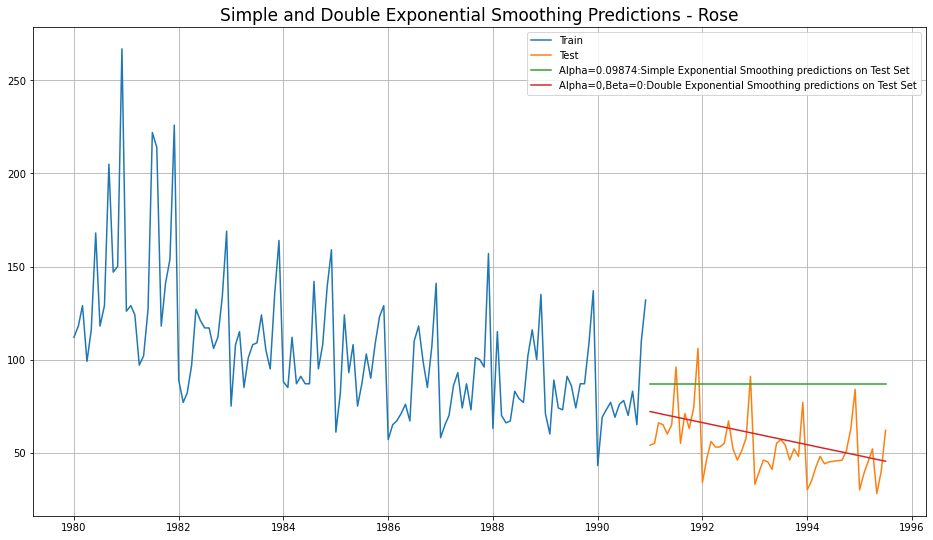

In [93]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions - Rose', fontsize=17);

### We see that the double exponential smoothing is picking up the trend component along with the level component as well.

In [94]:
print('DES RMSE:',mean_squared_error(rtest.values,DES_predict_rose.values,squared=False))

DES RMSE: 15.268956852847325


In [95]:
resultsDf_rdes = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,DES_predict_rose.values,squared=False)]}
                           ,index=['Double Exponential Smoothing'])
resultsDf_Rdes = pd.concat([resultsDf_rses, resultsDf_rdes])
resultsDf_Rdes

Test RMSE Rose
Simple Exponential Smoothing       36.796242
Double Exponential Smoothing       15.268957

## Model 7: Triple Exponential Smoothing (Holt - Winter's Model).

## Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors - ROSE Wine Sales.

#### Three parameters  𝛼 ,  𝛽  and  𝛾  are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [96]:
TES_train = rtrain.copy()
TES_test = rtest.copy()

In [97]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='additive',initialization_method='estimated')

C:\Users\jyoti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [98]:
# Fitting the model
model_TES = model_TES.fit()

In [99]:
print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.09467987567540882, 'smoothing_trend': 2.31999683285252e-05, 'smoothing_seasonal': 0.0004175285691922314, 'damping_trend': nan, 'initial_level': 146.40142527639352, 'initial_trend': -0.5464913833622084, 'initial_seasons': array([-31.19268548, -18.83344765, -10.84745053, -21.48718886,
       -12.67654312,  -7.19154248,   2.65454402,   8.80233514,
         4.79913097,   2.91389547,  21.00157004,  63.18716583]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [100]:
# Forecasting using this model for the duration of the test set
TES_predict_add_rose =  model_TES.forecast(len(rtest))
TES_predict_add_rose

C:\Users\jyoti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01     42.716117
1991-02-01     54.528923
1991-03-01     61.968476
1991-04-01     50.782306
1991-05-01     59.046436
1991-06-01     63.984756
1991-07-01     73.284643
1991-08-01     78.885632
1991-09-01     74.336035
1991-10-01     71.904228
1991-11-01     89.445446
1991-12-01    131.087464
1992-01-01     36.158278
1992-02-01     47.971084
1992-03-01     55.410637
1992-04-01     44.224467
1992-05-01     52.488597
1992-06-01     57.426917
1992-07-01     66.726804
1992-08-01     72.327793
1992-09-01     67.778196
1992-10-01     65.346389
1992-11-01     82.887606
1992-12-01    124.529625
1993-01-01     29.600439
1993-02-01     41.413245
1993-03-01     48.852798
1993-04-01     37.666628
1993-05-01     45.930758
1993-06-01     50.869078
1993-07-01     60.168965
1993-08-01     65.769954
1993-09-01     61.220357
1993-10-01     58.788550
1993-11-01     76.329767
1993-12-01    117.971785
1994-01-01     23.042600
1994-02-01     34.855406
1994-03-01     42.294959
1994-04-01     31.108789


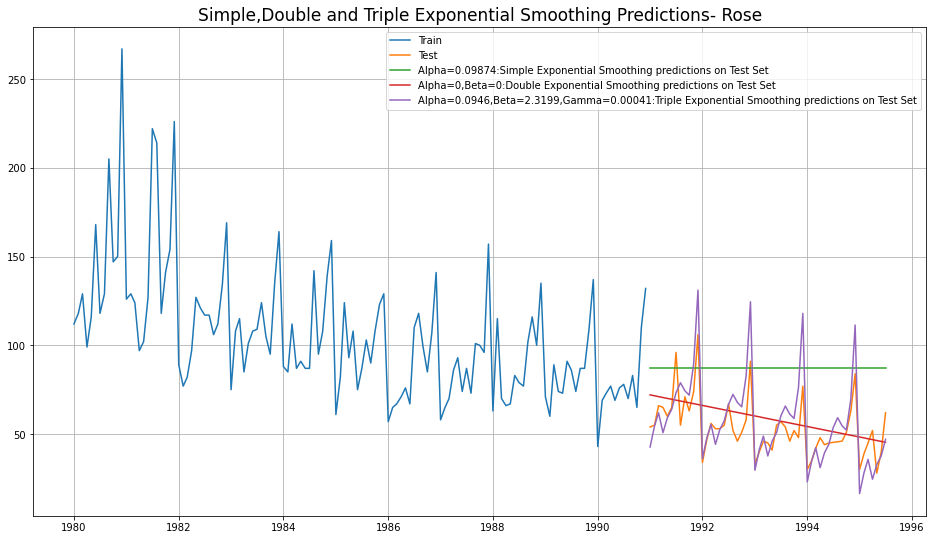

In [101]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_rose, label='Alpha=0.0946,Beta=2.3199,Gamma=0.00041:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions- Rose', fontsize=17);

#### We see that the Triple Exponential Smoothing is picking up the seasonal component as well.

In [102]:
print('TES RMSE:',mean_squared_error(rtest.values,TES_predict_add_rose.values,squared=False))

TES RMSE: 14.278440376982086


In [103]:
resultsDf_rtes= pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,TES_predict_add_rose.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Additive Season)'])

import textwrap
textwrap.TextWrapper(resultsDf_rtes.index)
resultsDf_Rtes = pd.concat([resultsDf_Rdes, resultsDf_rtes])
resultsDf_Rtes

Test RMSE Rose
Simple Exponential Smoothing                         36.796242
Double Exponential Smoothing                         15.268957
Triple Exponential Smoothing (Additive Season)       14.278440

## Model 7 : Triple Exponential Smoothing.
## Holt-Winters - ETS(A, A, M) - Holt Winter's linear method - ROSE Wine Sales.

#### ETS(A, A, M) model - Taking MULTIPLICATIVE SEASONALITY.

In [104]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',initialization_method='estimated')

C:\Users\jyoti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [105]:
# Fitting the model
model_TES_am = model_TES_am.fit()

In [106]:
print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07130285749243212, 'smoothing_trend': 0.04550837652110988, 'smoothing_seasonal': 8.385716703273524e-05, 'damping_trend': nan, 'initial_level': 163.60092654560762, 'initial_trend': -0.9804841883026134, 'initial_seasons': array([0.68714163, 0.77936108, 0.85184662, 0.74446365, 0.8372947 ,
       0.91182237, 1.00282327, 1.06745268, 1.01025249, 0.98957378,
       1.1535151 , 1.59037115]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [107]:
# Forecasting using this model for the duration of the test set
TES_predict_am_rose =  model_TES_am.forecast(len(rtest))
TES_predict_am_rose

C:\Users\jyoti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01     56.332862
1991-02-01     63.693063
1991-03-01     69.394575
1991-04-01     60.454513
1991-05-01     67.772390
1991-06-01     73.563907
1991-07-01     80.645116
1991-08-01     85.563629
1991-09-01     80.718288
1991-10-01     78.808929
1991-11-01     91.565566
1991-12-01    125.823875
1992-01-01     54.185254
1992-02-01     61.257120
1992-03-01     66.732091
1992-04-01     58.127595
1992-05-01     65.155411
1992-06-01     70.714123
1992-07-01     77.510896
1992-08-01     82.227449
1992-09-01     77.560771
1992-10-01     75.716019
1992-11-01     87.960222
1992-12-01    120.853321
1993-01-01     52.037646
1993-02-01     58.821176
1993-03-01     64.069608
1993-04-01     55.800678
1993-05-01     62.538432
1993-06-01     67.864338
1993-07-01     74.376675
1993-08-01     78.891269
1993-09-01     74.403254
1993-10-01     72.623110
1993-11-01     84.354879
1993-12-01    115.882766
1994-01-01     49.890039
1994-02-01     56.385233
1994-03-01     61.407124
1994-04-01     53.473761


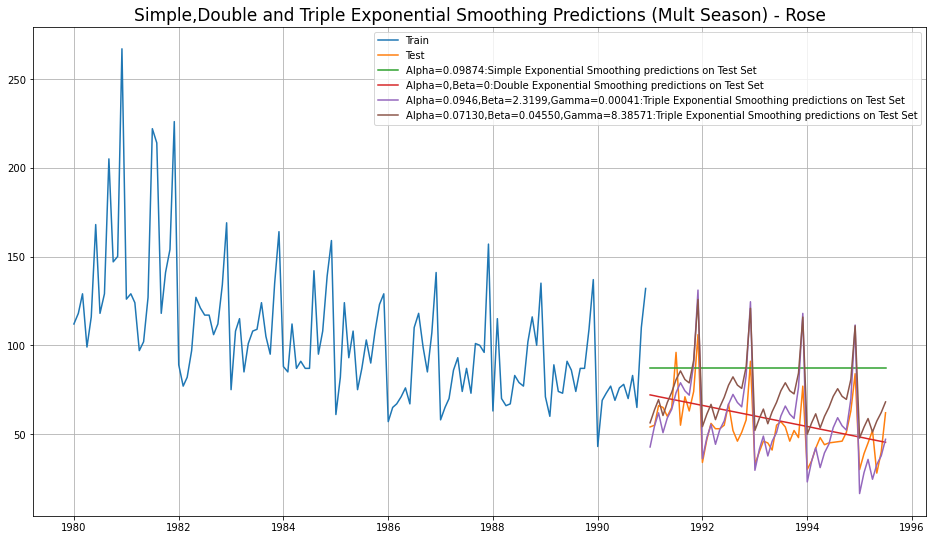

In [108]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_rose, label='Alpha=0.0946,Beta=2.3199,Gamma=0.00041:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am_rose, label='Alpha=0.07130,Beta=0.04550,Gamma=8.38571:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (Mult Season) - Rose', fontsize=17);

## Model Evaluation for Rose Wine Sales on Triple Exponential Smoothing for Multiplicativity.
### Report model accuracy

In [109]:
print('TES_am RMSE_rose:',mean_squared_error(rtest.values,TES_predict_am_rose.values,squared=False))

TES_am RMSE_rose: 20.189764216068276


In [110]:
resultsDf_rtesm = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,TES_predict_am_rose.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Multiplicative Season)'])
resultsDf_Rtesm = pd.concat([resultsDf_Rtes, resultsDf_rtesm])
resultsDf_Rtesm

Test RMSE Rose
Simple Exponential Smoothing                             36.796242
Double Exponential Smoothing                             15.268957
Triple Exponential Smoothing (Additive Season)           14.278440
Triple Exponential Smoothing (Multiplicative Se...       20.189764

In [111]:
resultsDf_Ram= pd.concat([resultsDf_fm, resultsDf_Rtesm], axis=0)
resultsDf_Ram

Test RMSE Rose
RegressionOnTime                                         15.268955
NaiveModel                                               79.718773
SimpleAverageModel                                       53.460570
2pointTrailingMovingAverage                              11.529278
4pointTrailingMovingAverage                              14.451403
6pointTrailingMovingAverage                              14.566327
9pointTrailingMovingAverage                              14.727630
Simple Exponential Smoothing                             36.796242
Double Exponential Smoothing                             15.268957
Triple Exponential Smoothing (Additive Season)           14.278440
Triple Exponential Smoothing (Multiplicative Se...       20.189764

## Inference: After Analyzing the value of Test RMSE of Rose wine sales the 2pointTrailingMovingAverage Model is performing at its best for the sales forecasting of Rose wine.

### Best Model for Rose Wine Sales is  - 2 Pt Moving Average. 

In [112]:
MovingAverage = dfr.copy()
MovingAverage.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

### Trailing moving averages.

In [113]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()

MovingAverage.head()

Rose  Trailing_2
YearMonth                    
1980-01-01  112.0         NaN
1980-02-01  118.0       115.0
1980-03-01  129.0       123.5
1980-04-01   99.0       114.0
1980-05-01  116.0       107.5

In [114]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

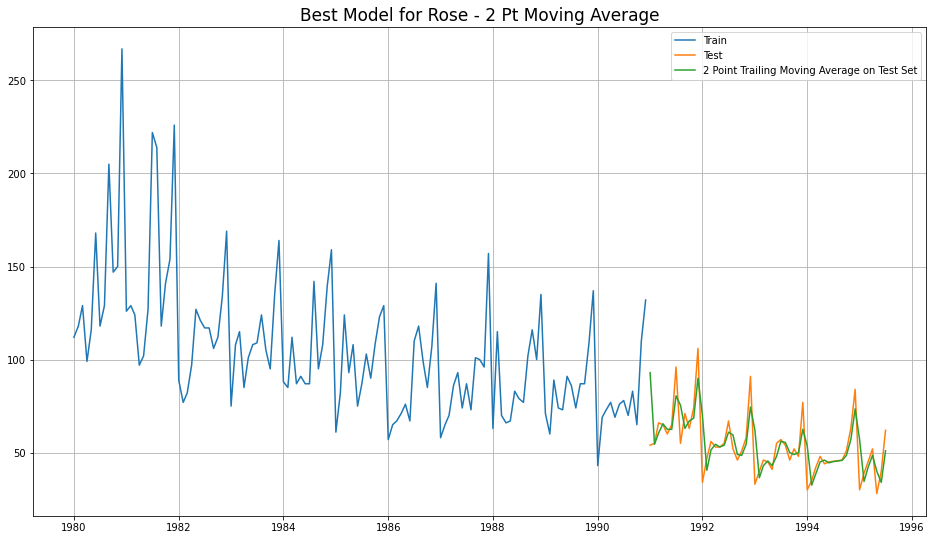

In [115]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')


plt.legend(loc = 'best')
plt.grid();
plt.title('Best Model for Rose - 2 Pt Moving Average', fontsize=17);

## 05. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

## Checking Stationarity of ROSE Wine sales Data.

### The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

### The hypothesis in a simple form for the ADF test is:
### * $H_0$ : The Time Series has a unit root and is thus non-stationary.
### * $H_1$ : The Time Series does not have a unit root and is thus stationary.

### We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

## Hypothesis for Statistical Test for Rose wine sales.

   ### *H0: The Time series of Rose Wine has a unit root and is thus a Non- stationary.
   ### *H1: The Time series of Rose Wine does not have a unit root and is thus Stationary.

In [116]:
from statsmodels.tsa.stattools import adfuller

In [117]:
dfrs = adfuller(dfr,regression='ct')
print('DF test statistic is %3.3f' %dfrs[0])
print('DF test p-value is' ,dfrs[1])
print('Number of lags used' ,dfrs[2])

DF test statistic is -2.240
DF test p-value is 0.467137162779315
Number of lags used 13


## Inference: According to the Adfuller test the p-value is greater than the alpha value = 0.05.

### So, according to the result the time series of Rose wine Sales is non.stationary.

### So, here the differencing is perfomed on the Rose wine Sales Time series to make it Stationary.

### We see that at 5% significant level the Time Series is non-stationary.

### Let us take one level of differencing to see whether the series becomes stationary.

In [118]:
dfrs = adfuller(dfr.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dfrs[0])
print('DF test p-value is' ,dfrs[1])
print('Number of lags used' ,dfrs[2])

DF test statistic is -8.162
DF test p-value is 3.01597611582779e-11
Number of lags used 12


#### We see that p-value < alpha=0.05 Hence, we reject the Null Hypothesis

#### We conclude that with a lag 1 - now the Rose data is Stationary

#### Now, let us go ahead and plot the stationary series.

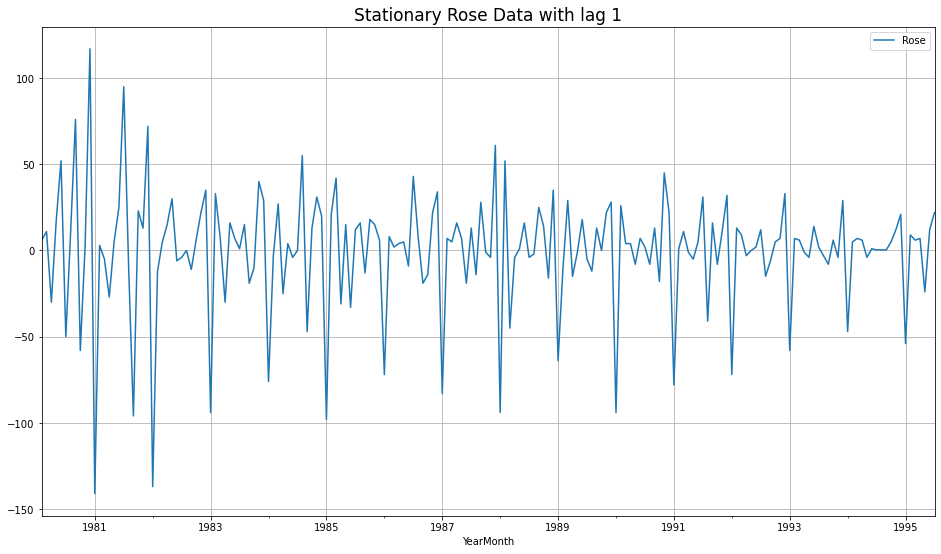

In [119]:
dfr.diff().dropna().plot(grid=True);
plt.title('Stationary Rose Data with lag 1', fontsize=17);

### Inference: So, the Above plot shows the stationarity of the Rose Wine Sales dataset & the stationarity has been checked on the alpha vlue = 0.05.

# ================================================================#

## 06. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

## Check for stationarity of the whole Time Series data of Rose Wine Sales.

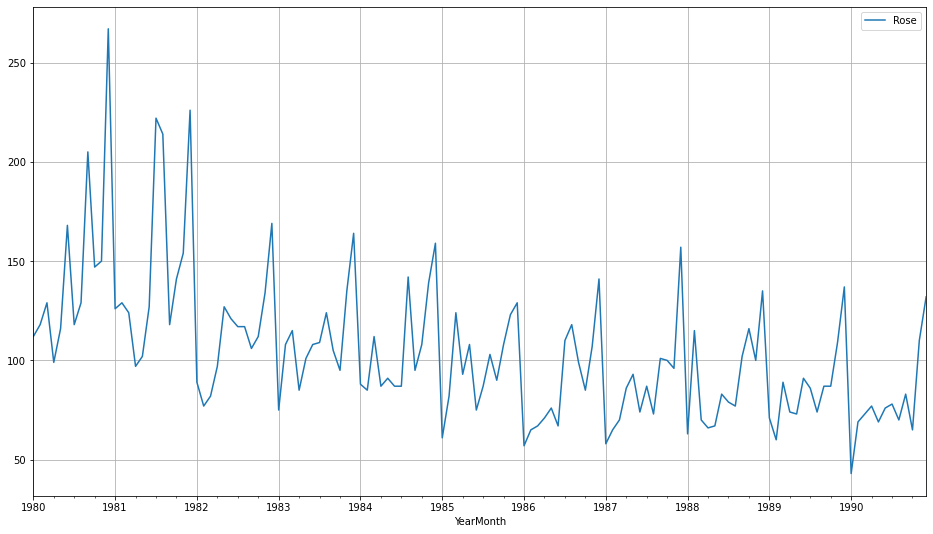

In [120]:
rtrain.plot(grid=True);

In [121]:
dftest = adfuller(rtrain,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.686
DF test p-value is 0.7569093051047072
Number of lags used 13


#### The training data is non-stationary at 95% confidence level. Let us take a first level of differencing to stationarize the Time Series.

In [122]:
dftest = adfuller(rtrain.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -6.804
DF test p-value is 3.894831356782219e-08
Number of lags used 12


#### p-value < 0.05 ------> So at 95% Confidence Interval. Train Rose data is Stationary with lag 1 Now, let us go ahead and plot the differenced training data.

<AxesSubplot:xlabel='YearMonth'>

Text(0.5, 1.0, 'Stationary Train Rose Time Series')

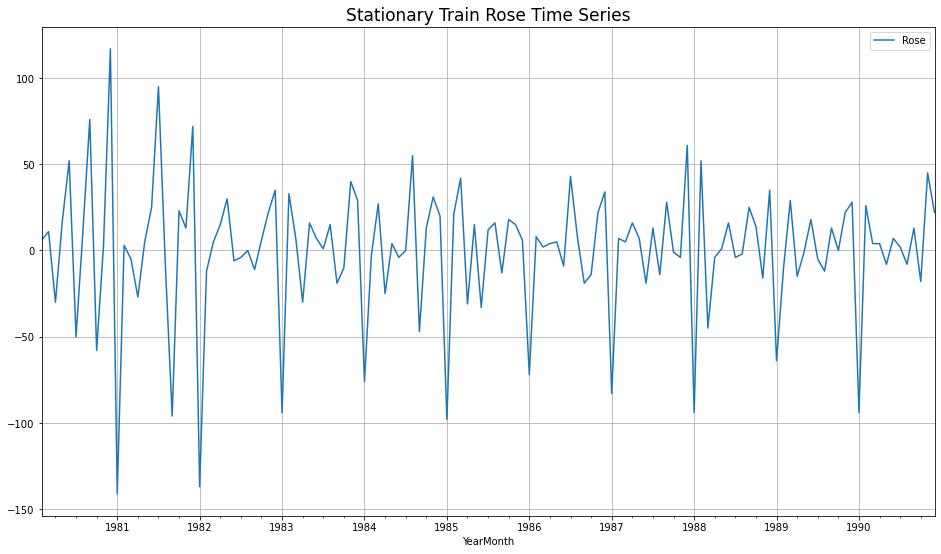

In [123]:
rtrain.diff().dropna().plot(grid=True);
plt.title('Stationary Train Rose Time Series', fontsize=17)
plt.show()

In [124]:
rtrain.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


## Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [125]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

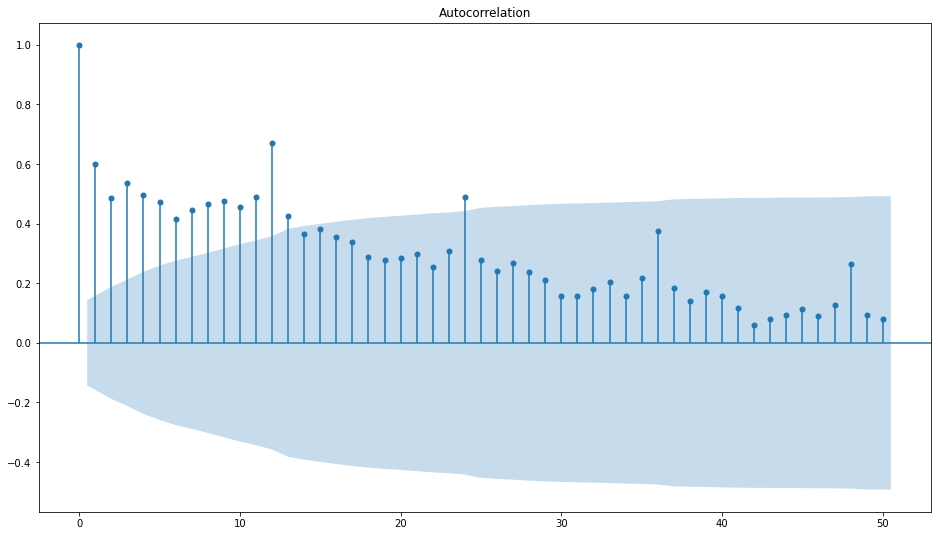

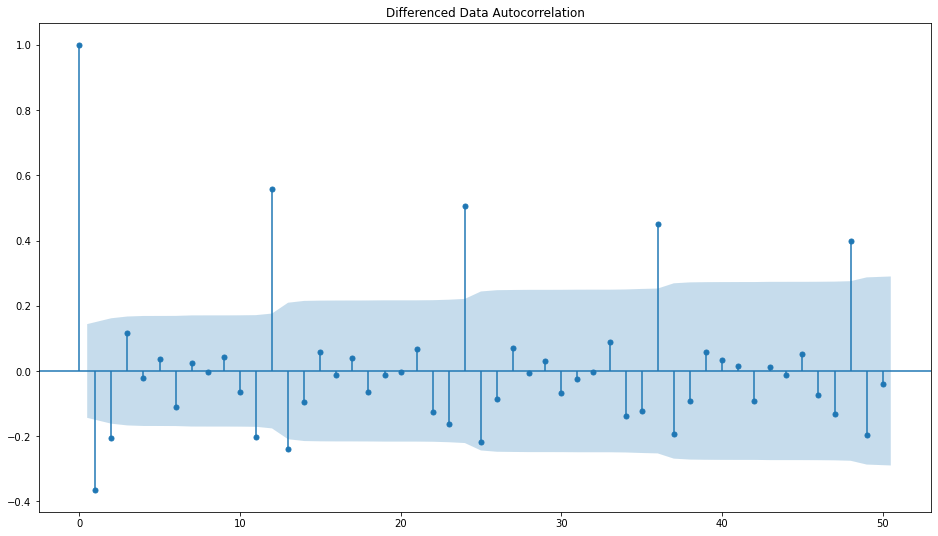

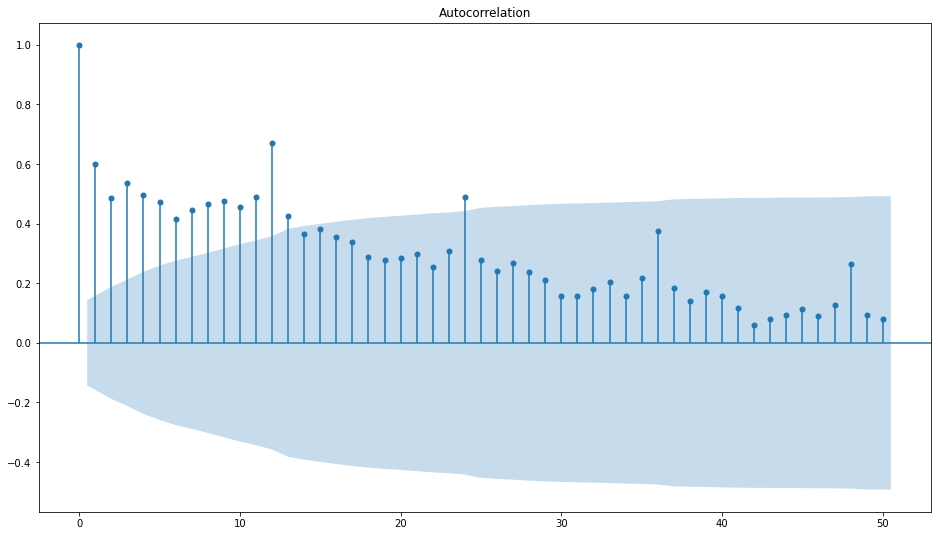

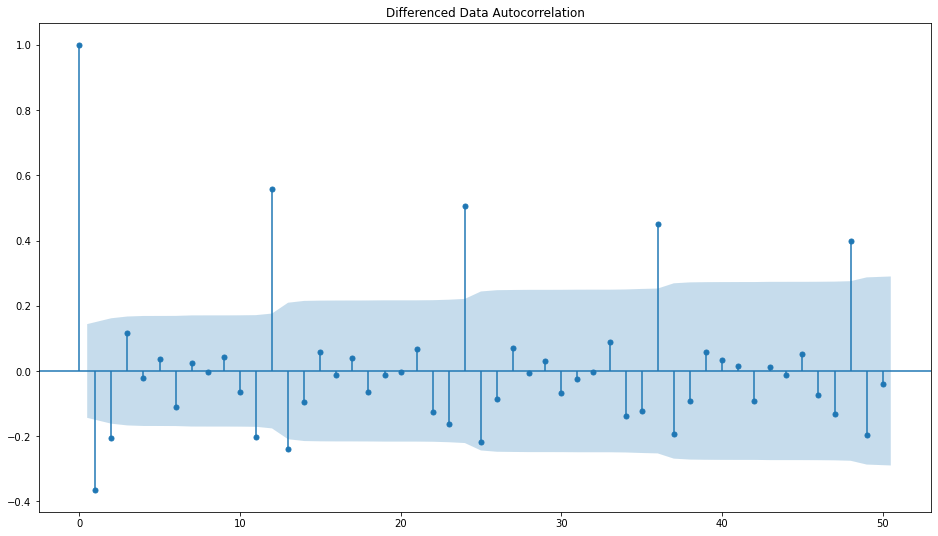

In [126]:
plot_acf(dfr['Rose'],lags=50,title='Autocorrelation')
plot_acf(dfr['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

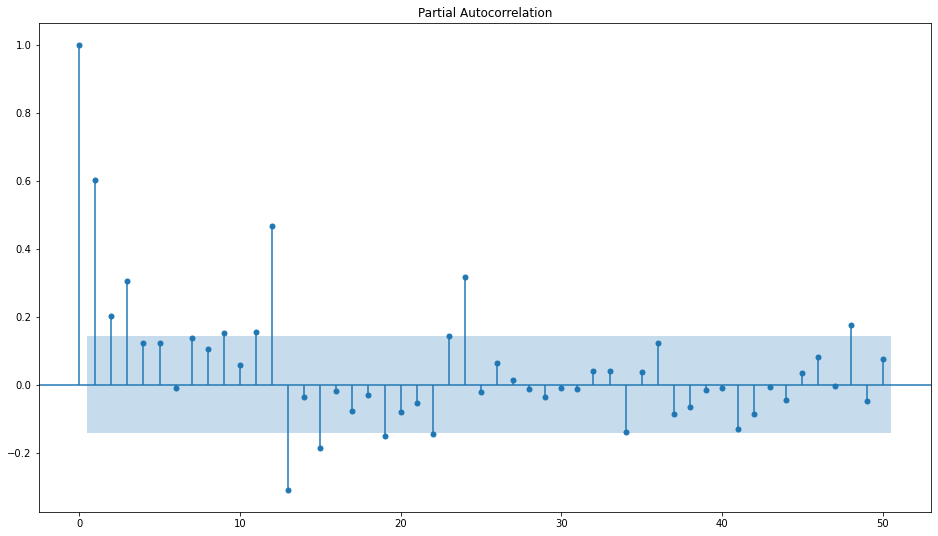

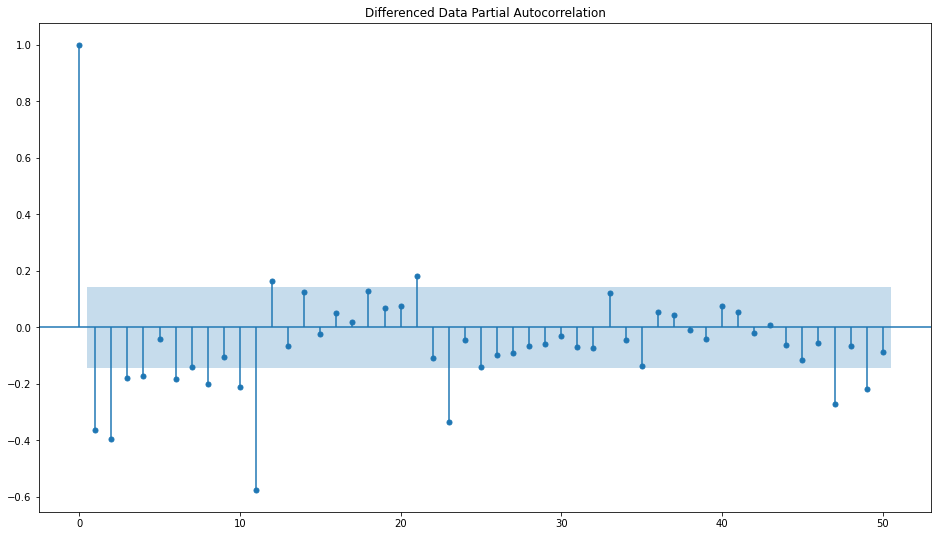

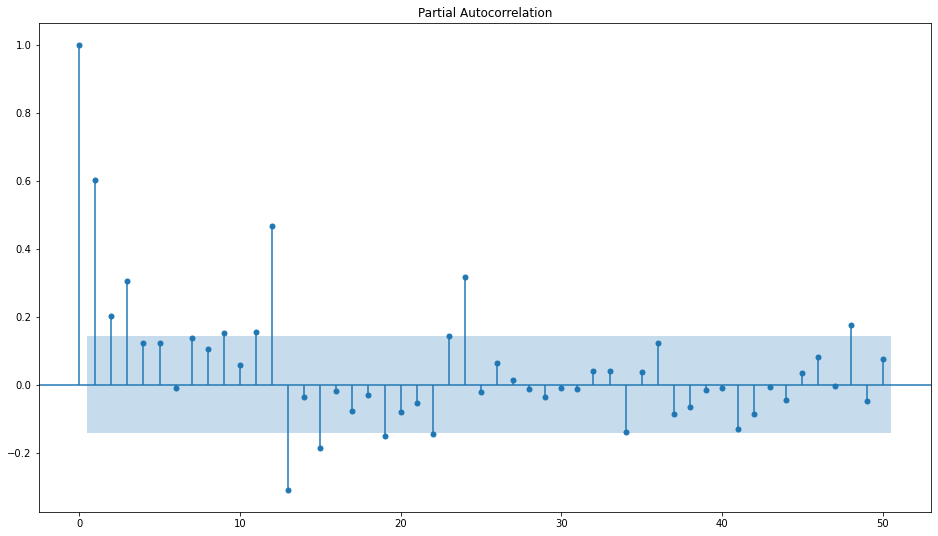

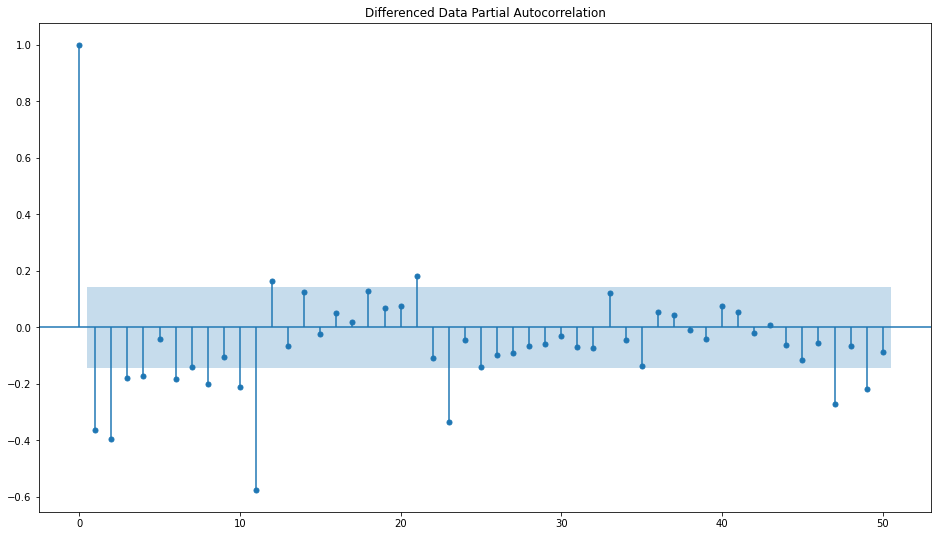

In [127]:
plot_pacf(dfr['Rose'],lags=50)
plot_pacf(dfr['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

## Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

#### Note: The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF and the PACF plots.

In [128]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [129]:
# Creating an empty Dataframe with column names only
ROSE_ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ROSE_ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [130]:
import warnings
warnings.filterwarnings("ignore") 
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(rtrain['Rose'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ROSE_ARIMA_AIC = ROSE_ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC value

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748299
ARIMA(0, 1, 2) - AIC:1279.6715288535793
ARIMA(0, 1, 3) - AIC:1280.5453761734657
ARIMA(1, 1, 0) - AIC:1317.3503105381546
ARIMA(1, 1, 1) - AIC:1280.5742295380073
ARIMA(1, 1, 2) - AIC:1279.8707234231906
ARIMA(1, 1, 3) - AIC:1281.8707223309966
ARIMA(2, 1, 0) - AIC:1298.6110341604983
ARIMA(2, 1, 1) - AIC:1281.507862186851
ARIMA(2, 1, 2) - AIC:1281.8707222264593
ARIMA(2, 1, 3) - AIC:1274.6948122121792
ARIMA(3, 1, 0) - AIC:1297.4810917271661
ARIMA(3, 1, 1) - AIC:1282.4192776271907
ARIMA(3, 1, 2) - AIC:1283.720740597711
ARIMA(3, 1, 3) - AIC:1278.6579946366096


In [131]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ROSE_ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
11  (2, 1, 3)  1274.694812
15  (3, 1, 3)  1278.657995
2   (0, 1, 2)  1279.671529
6   (1, 1, 2)  1279.870723
3   (0, 1, 3)  1280.545376

In [132]:
auto_ARIMA = ARIMA(rtrain, order=(2,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.347
Date:                Sat, 02 Jul 2022   AIC                           1274.695
Time:                        15:33:52   BIC                           1291.946
Sample:                    01-01-1980   HQIC                          1281.705
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6780      0.084    -20.035      0.000      -1.842      -1.514
ar.L2         -0.7288      0.084     -8.702      0.000      -0.893      -0.565
ma.L1          1.0447      0.670      1.559      0.1

### Rose Train Diagnostics plot.

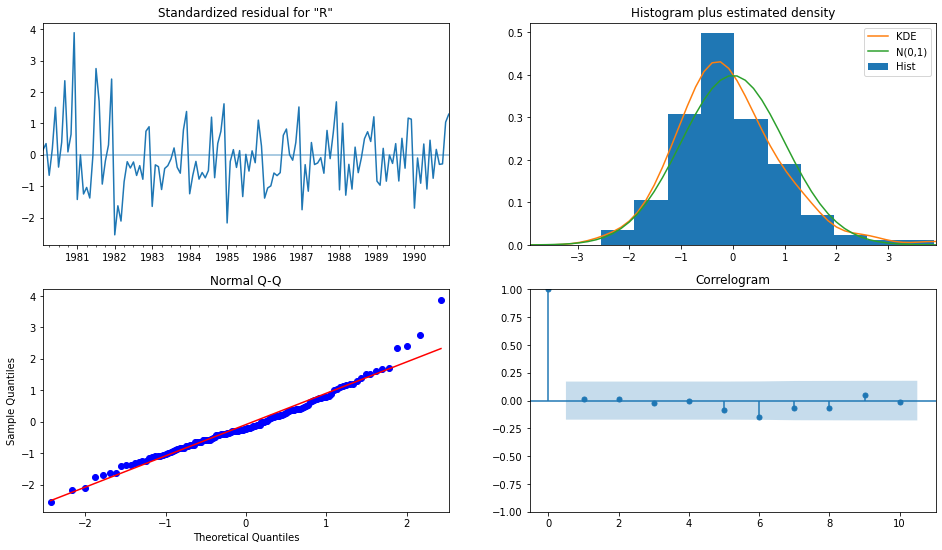

In [133]:
results_auto_ARIMA.plot_diagnostics();

## Predict on the Rose Test Set using this model and evaluate the model.

In [134]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(rtest))
predicted_auto_ARIMA

1991-01-01    85.591771
1991-02-01    90.540260
1991-03-01    81.957467
1991-04-01    92.752662
1991-05-01    80.893834
1991-06-01    92.924987
1991-07-01    81.379865
1991-08-01    91.983846
1991-09-01    82.604851
1991-10-01    90.614266
1991-11-01    84.010189
1991-12-01    89.254310
1992-01-01    85.267934
1992-02-01    88.134997
1992-03-01    86.229454
1992-04-01    87.337358
1992-05-01    86.867105
1992-06-01    86.848725
1992-07-01    87.222292
1992-08-01    86.608851
1992-09-01    87.365929
1992-10-01    86.542654
1992-11-01    87.372322
1992-12-01    86.580172
1993-01-01    87.304708
1993-02-01    86.666283
1993-03-01    87.209494
1993-04-01    86.763291
1993-05-01    87.116110
1993-06-01    86.849287
1993-07-01    87.039871
1993-08-01    86.914539
1993-09-01    86.985943
1993-10-01    86.957473
1993-11-01    86.953205
1993-12-01    86.981116
1994-01-01    86.937393
1994-02-01    86.990417
1994-03-01    86.933310
1994-04-01    86.990490
1994-05-01    86.936163
1994-06-01    86

In [135]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [136]:
rmse = mean_squared_error(rtest['Rose'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 36.81151448797232 
MAPE: 75.83580476065637


In [137]:
resultsDf_ARI = pd.DataFrame({'Test RMSE Rose': rmse,'Test MAPE Rose':mape}
                           ,index=['ARIMA(2,1,3)'])
resultsDf_ARI

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)       36.811514       75.835805

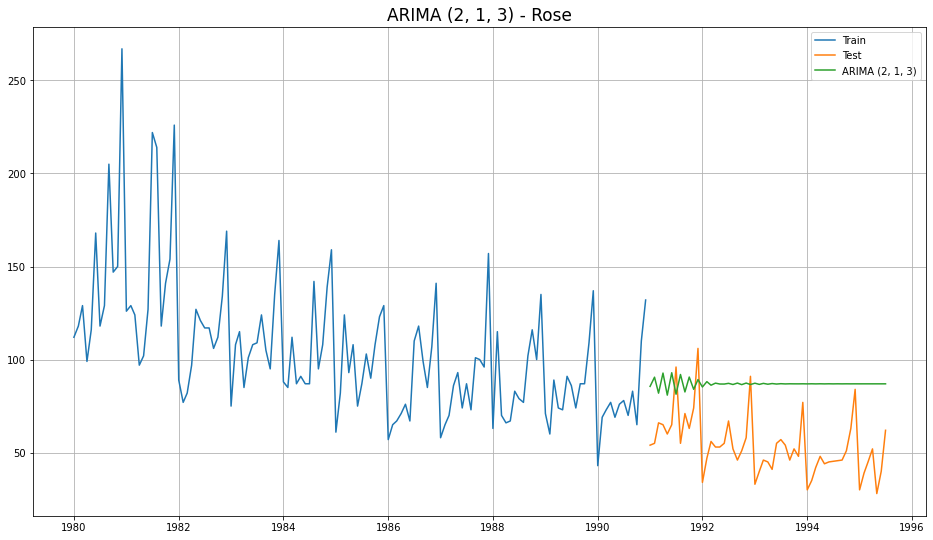

In [138]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')
plt.plot(predicted_auto_ARIMA,label='ARIMA (2, 1, 3)')

plt.legend(loc='best')
plt.grid()
plt.title('ARIMA (2, 1, 3) - Rose', fontsize=17);

## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC) - ROSE WINE Sales Dataset.

#### Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

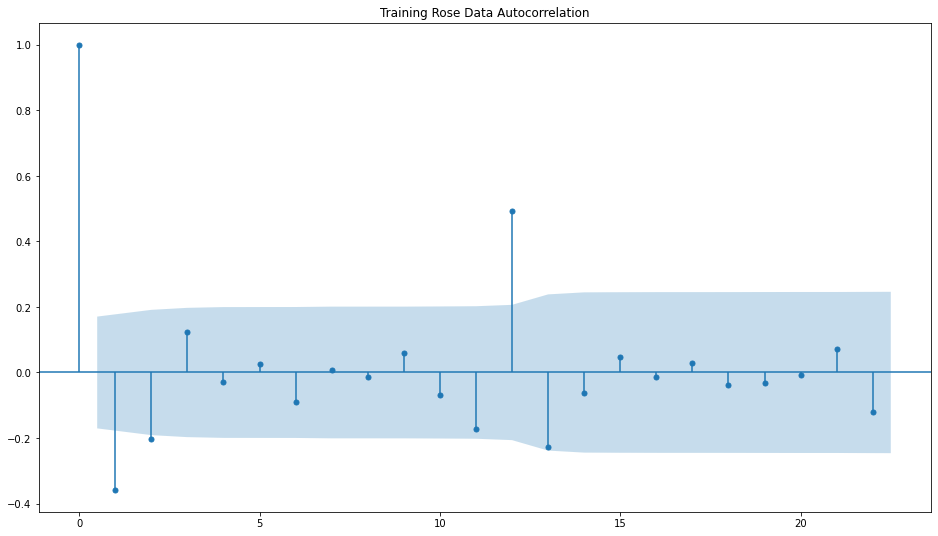

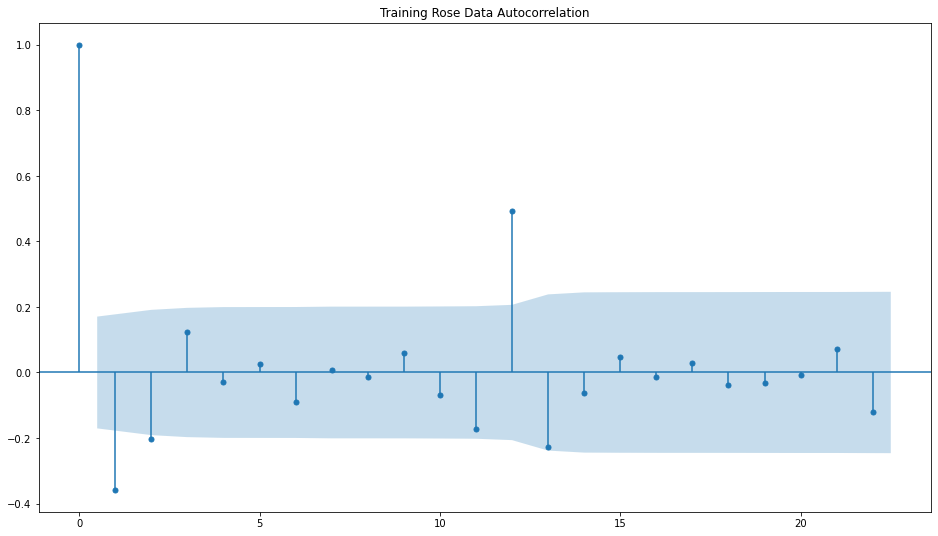

In [139]:
plot_acf(rtrain.diff(),title='Training Rose Data Autocorrelation',missing='drop');
plt.show()

In [140]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [141]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [142]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(rtrain['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1264.4996261113859
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1144.7077471827492
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:1081.2713830625148
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1274.7897737087983
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1241.7870945149034
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1146.3093266721953
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:1058.9861743124366
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1137.9167236212038
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1137.4533629515097
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1117.022442632412
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:1058.8048206422386
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:1072.546583469527
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:1061.3687765140075
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:1058.0425053208362
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:1058.8917085663488
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1201.3832548029557
SARIMA(0, 1, 1)x(0, 0, 2, 6) -

SARIMA(2, 1, 1)x(2, 0, 1, 6) - AIC:1068.4781627388459
SARIMA(2, 1, 1)x(2, 0, 2, 6) - AIC:1051.6734607528306
SARIMA(2, 1, 1)x(2, 0, 3, 6) - AIC:965.1763955071331
SARIMA(2, 1, 1)x(3, 0, 0, 6) - AIC:974.1258778649587
SARIMA(2, 1, 1)x(3, 0, 1, 6) - AIC:975.8068385700585
SARIMA(2, 1, 1)x(3, 0, 2, 6) - AIC:967.6521336371324
SARIMA(2, 1, 1)x(3, 0, 3, 6) - AIC:967.1740892378822
SARIMA(2, 1, 2)x(0, 0, 0, 6) - AIC:1253.9102116146705
SARIMA(2, 1, 2)x(0, 0, 1, 6) - AIC:1185.7691921531987
SARIMA(2, 1, 2)x(0, 0, 2, 6) - AIC:1082.5581033340538
SARIMA(2, 1, 2)x(0, 0, 3, 6) - AIC:1005.4894643086194
SARIMA(2, 1, 2)x(1, 0, 0, 6) - AIC:1200.4217492510918
SARIMA(2, 1, 2)x(1, 0, 1, 6) - AIC:1150.728323067526
SARIMA(2, 1, 2)x(1, 0, 2, 6) - AIC:1063.1103218716592
SARIMA(2, 1, 2)x(1, 0, 3, 6) - AIC:996.8724045155584
SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:1073.6961457873563
SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:1070.0771798924668
SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:1045.2203768452962
SARIMA(2, 1, 2)x(2, 0, 3, 6) - AIC:

In [143]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal         AIC
187  (2, 1, 3)  (2, 0, 3, 6)  951.744302
59   (0, 1, 3)  (2, 0, 3, 6)  952.073632
251  (3, 1, 3)  (2, 0, 3, 6)  952.582104
191  (2, 1, 3)  (3, 0, 3, 6)  953.205617
123  (1, 1, 3)  (2, 0, 3, 6)  953.684951

In [144]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(rtrain['Rose'],
                                order=(2, 1, 3),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 3)x(2, 0, 3, 6)   Log Likelihood                -464.872
Date:                           Sat, 02 Jul 2022   AIC                            951.744
Time:                                   15:38:14   BIC                            981.349
Sample:                               01-01-1980   HQIC                           963.750
                                    - 12-01-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5027      0.083     -6.081      0.000      -0.665      -0.341
ar.L2         -0.6627      0.084     -7.919

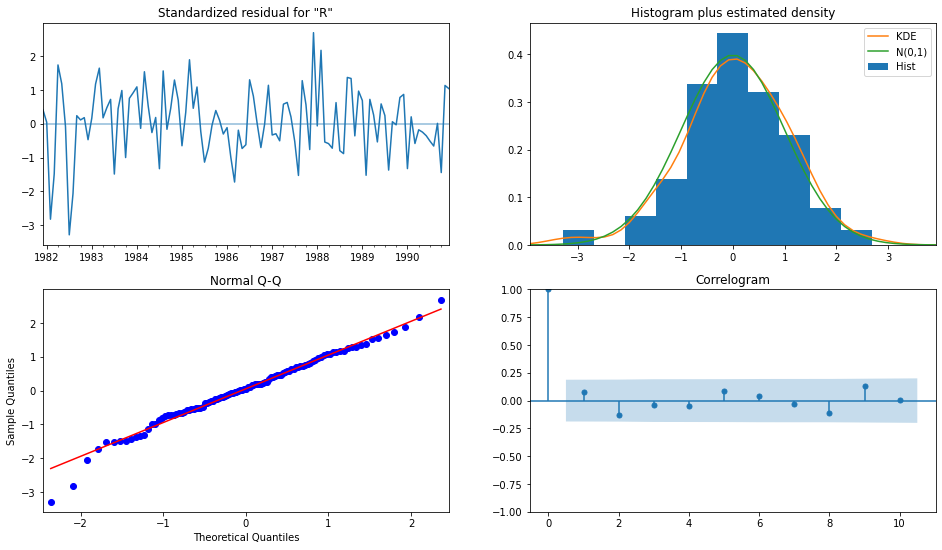

In [145]:
results_auto_SARIMA.plot_diagnostics();

## Predict on the Test Set using this model and evaluate the model.

In [146]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(rtest))
predicted_auto_SARIMA1= results_auto_SARIMA.get_prediction(start=pd.to_datetime('1991-01-01'), dynamic=False)

In [147]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  66.903965  16.350351      34.857865      98.950064
1991-02-01  65.996368  16.481746      33.692739      98.299996
1991-03-01  74.434463  16.587661      41.923245     106.945681
1991-04-01  76.043481  16.710282      43.291931     108.795031
1991-05-01  78.408991  16.710898      45.656232     111.161750

In [148]:
predicted_auto_SARIMA1

In [149]:
rmse = mean_squared_error(rtest['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 27.12411610501949 
MAPE: 55.2398932167765


In [150]:
resultsDf_SAR = pd.DataFrame({'Test RMSE Rose': rmse,'Test MAPE Rose':mape}
                           ,index=['SARIMA(2, 1, 3)(2, 0, 3, 6)'])


resultsDf_SAR6 = pd.concat([resultsDf_ARI,resultsDf_SAR])
resultsDf_SAR6

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)                      36.811514       75.835805
SARIMA(2, 1, 3)(2, 0, 3, 6)       27.124116       55.239893

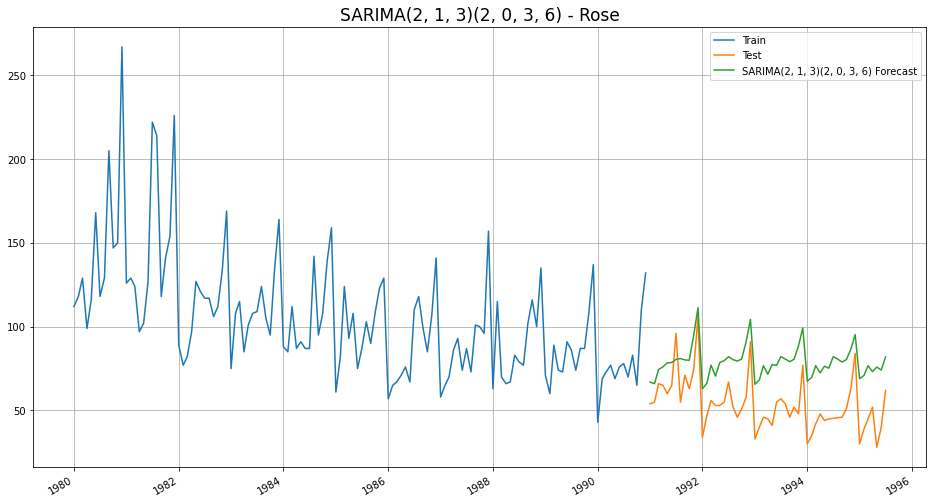

In [151]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')
# plt.plot(predicted_auto_SARIMA,label='SARIMA(3, 1, 1)(3, 0, 2, 12)')
# predicted_auto_SARIMA.plot(label='SARIMA(3, 1, 1)(3, 0, 2, 12)')
predicted_auto_SARIMA.predicted_mean.plot(label='SARIMA(2, 1, 3)(2, 0, 3, 6) Forecast')


plt.legend(loc='best')
plt.grid()
plt.title('SARIMA(2, 1, 3)(2, 0, 3, 6) - Rose', fontsize=17);

## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 12.

#### Let us look at the ACF and the PACF plots once more.

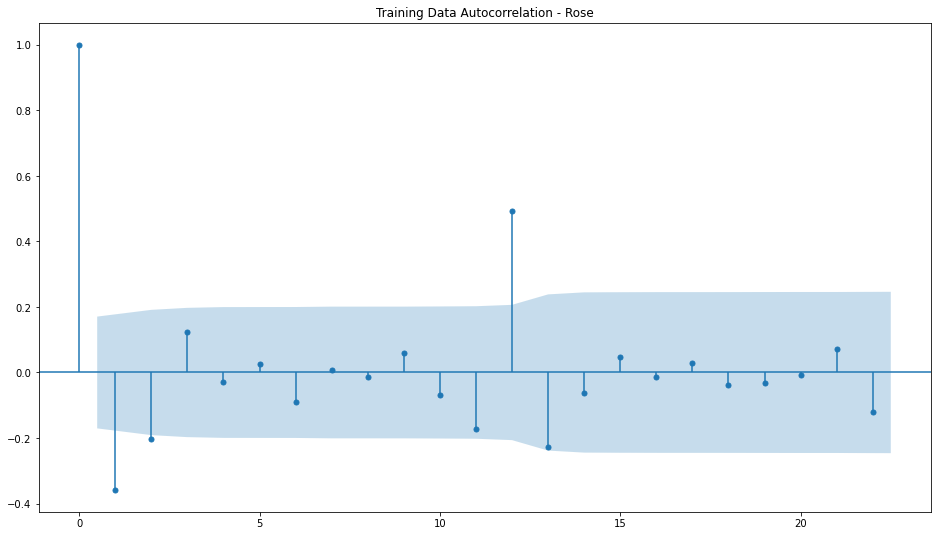

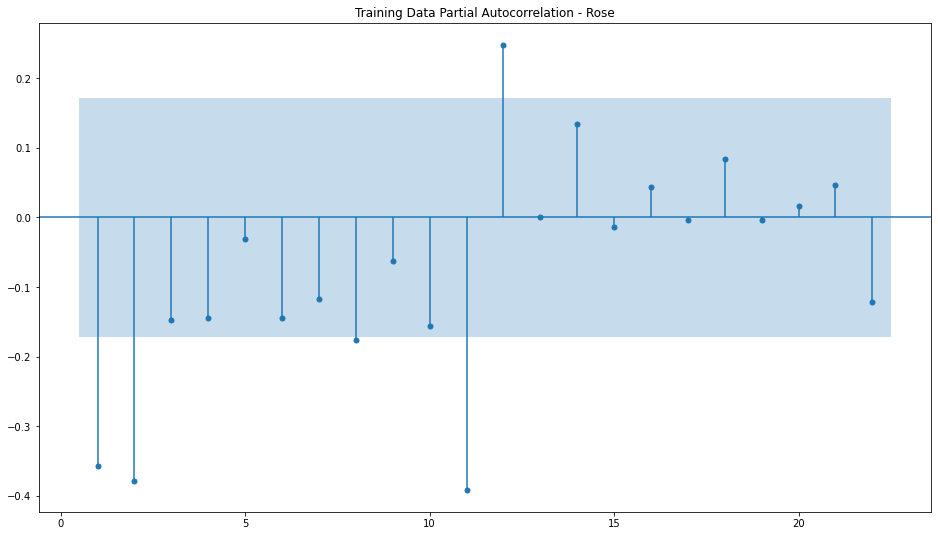

In [152]:
plot_acf(rtrain.diff(),title='Training Data Autocorrelation - Rose',missing='drop')
plot_pacf(rtrain.diff().dropna(),title='Training Data Partial Autocorrelation - Rose',zero=False,method='ywmle');

### Here, we have taken alpha=0.05.

#### We are going to take the seasonal period as 12
#### We are taking the p value to be 2 and the q value also to be 2 as the parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0. 
* The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 3.

In [153]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(rtrain['Rose'],
                                order=(2,1,2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -379.498
Date:                            Sat, 02 Jul 2022   AIC                            776.996
Time:                                    15:38:20   BIC                            799.692
Sample:                                01-01-1980   HQIC                           786.156
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8551      0.146     -5.838      0.000      -1.142      -0.568
ar.L2         -0.0022      0.125   

In [154]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(rtrain['Rose'],
                                order=(2,1,2),
                                seasonal_order=(3, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA1 = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(3, 1, 2, 12)   Log Likelihood                -334.893
Date:                            Sat, 02 Jul 2022   AIC                            689.786
Time:                                    15:38:33   BIC                            713.730
Sample:                                01-01-1980   HQIC                           699.392
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7091      0.403      1.758      0.079      -0.081       1.500
ar.L2         -0.1501      0.176   

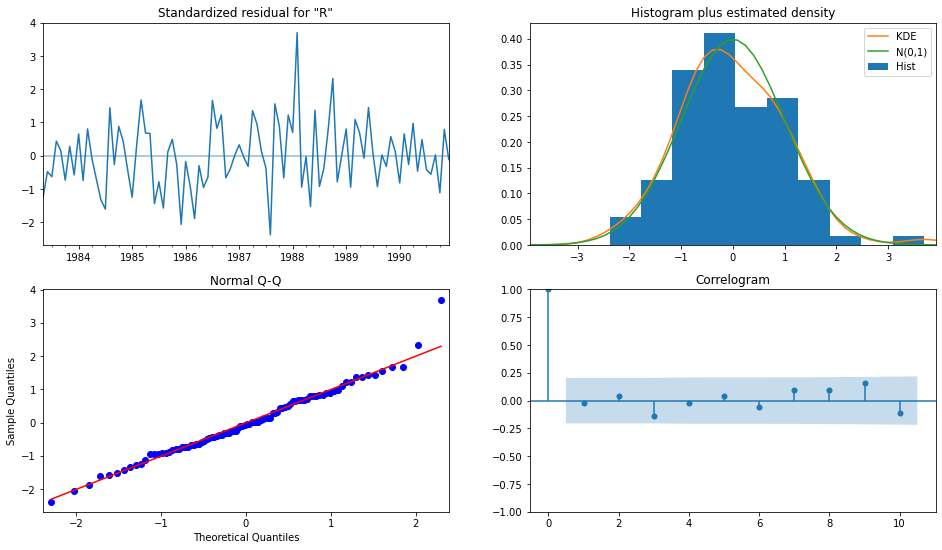

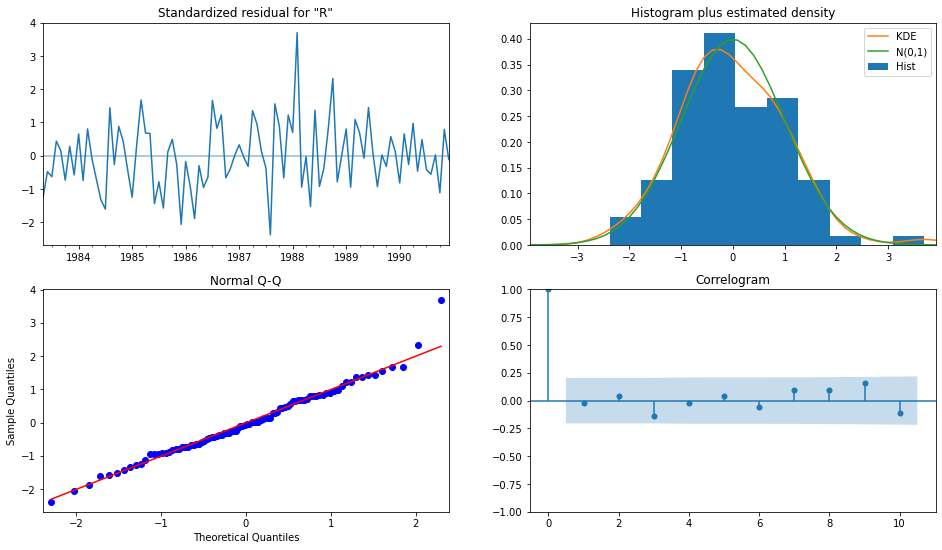

In [155]:
results_manual_SARIMA.plot_diagnostics()

## Predict on the Test Set using this model and evaluate the model.

In [156]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(rtest))
                                                             
predicted_manual_SARIMA1 = results_manual_SARIMA1.get_forecast(steps=len(rtest))

In [157]:
rmse = mean_squared_error(rtest['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 16.550728497659694 
MAPE: 25.477141466344396


In [158]:
rmse = mean_squared_error(rtest['Rose'],predicted_manual_SARIMA1.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_manual_SARIMA1.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 15.35719203342261 
MAPE: 22.955566805370136


In [159]:
resultsDf_SA12 = pd.DataFrame({'Test RMSE Rose': [rmse],'Test MAPE Rose':mape}
                           ,index=['SARIMA(2,1,2)(3,1,2,12)'])


resultsDf_SAR12 = pd.concat([resultsDf_SAR6,resultsDf_SA12])
resultsDf_SAR12

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)                      36.811514       75.835805
SARIMA(2, 1, 3)(2, 0, 3, 6)       27.124116       55.239893
SARIMA(2,1,2)(3,1,2,12)           15.357192       22.955567

<AxesSubplot:>

Text(0.5, 1.0, 'SARIMA(2, 1, 3)(2, 0, 3, 6) Forecast - ROSE')

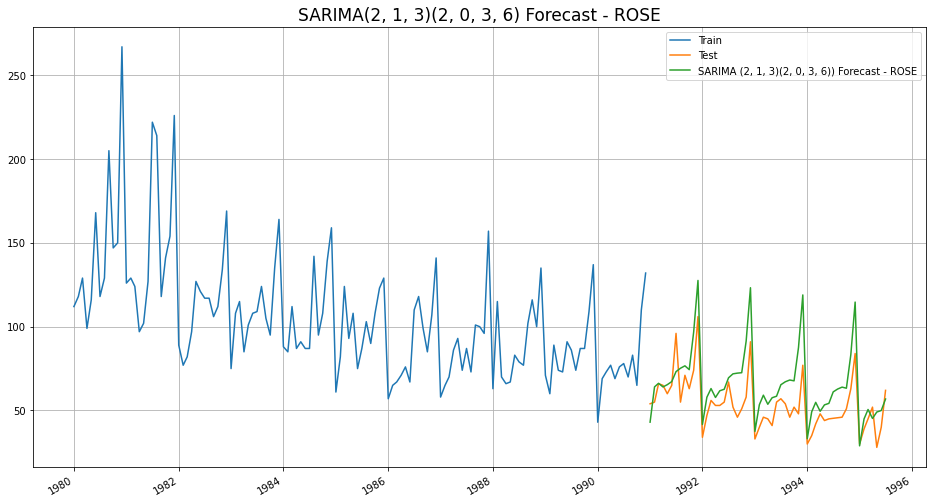

In [160]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label ='Test')

predicted_manual_SARIMA.predicted_mean.plot(label = 'SARIMA (2, 1, 3)(2, 0, 3, 6)) Forecast - ROSE')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA(2, 1, 3)(2, 0, 3, 6) Forecast - ROSE', fontsize=17)

<AxesSubplot:>

Text(0.5, 1.0, 'SARIMA (2,1,2)(3,1,2,12) Forecast - ROSE')

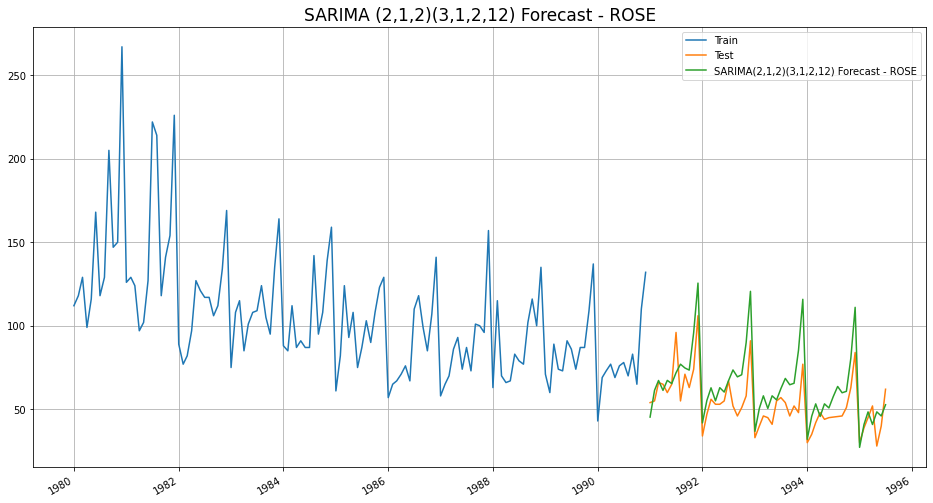

In [161]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label ='Test')

predicted_manual_SARIMA1.predicted_mean.plot(label = 'SARIMA(2,1,2)(3,1,2,12) Forecast - ROSE')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (2,1,2)(3,1,2,12) Forecast - ROSE', fontsize=17)
plt.show()

## Inference: The SARIMA Model is build based on the cut-off points of ACF and PACF on the training data of Rose Wine Sales.

## Building the most optimum model on the Full Data of Rose Wine Sales.

#### Here, we have a scenario where our training data was stationary but our full data was not stationary. So, we will use the same parameters as our training data but with adding a level of differencing which is needed for the data to be stationary.

In [162]:
full_data_model = sm.tsa.statespace.SARIMAX(dfr['Rose'],
                                order=(2,1,2),
                                seasonal_order=(3,1,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(2, 1, 2)x(3, 1, 2, 12)   Log Likelihood                -543.235
Date:                            Sat, 02 Jul 2022   AIC                           1106.470
Time:                                    15:38:51   BIC                           1135.596
Sample:                                01-01-1980   HQIC                          1118.306
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9129      0.173      5.278      0.000       0.574       1.252
ar.L2         -0.1403      0.120   

In [163]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [164]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  46.155569  12.834779      20.999863      71.311274
1995-09-01  46.182409  12.992381      20.717810      71.647008
1995-10-01  48.213416  13.002701      22.728590      73.698242
1995-11-01  60.861462  13.019932      35.342864      86.380061
1995-12-01  88.933850  13.059560      63.337583     114.530117

In [165]:
rmse = mean_squared_error(dfr['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 42.87769610890037


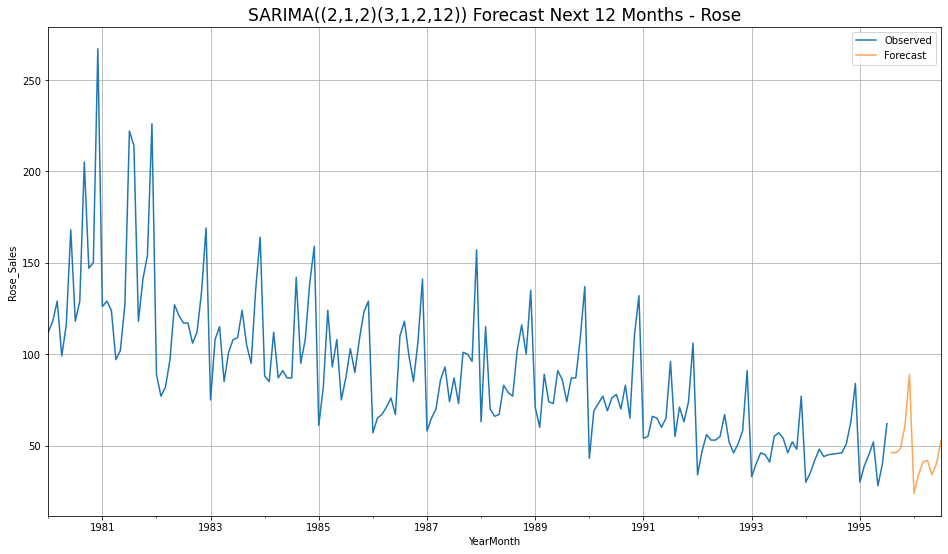

In [166]:
axis = dfr['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('YearMonth')
axis.set_ylabel('Rose_Sales')
plt.legend(loc='best')
plt.grid();
plt.title('SARIMA((2,1,2)(3,1,2,12)) Forecast Next 12 Months - Rose', fontsize=17);

In [167]:
resultsDf_SAR12 

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)                      36.811514       75.835805
SARIMA(2, 1, 3)(2, 0, 3, 6)       27.124116       55.239893
SARIMA(2,1,2)(3,1,2,12)           15.357192       22.955567

In [168]:
results_rose = pd.concat([resultsDf_Ram, resultsDf_SAR12], axis=0)
results_rose

Test RMSE Rose  \
RegressionOnTime                                         15.268955   
NaiveModel                                               79.718773   
SimpleAverageModel                                       53.460570   
2pointTrailingMovingAverage                              11.529278   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
Simple Exponential Smoothing                             36.796242   
Double Exponential Smoothing                             15.268957   
Triple Exponential Smoothing (Additive Season)           14.278440   
Triple Exponential Smoothing (Multiplicative Se...       20.189764   
ARIMA(2,1,3)                                             36.811514   
SARIMA(2, 1, 3)(2, 0, 3, 6)                              27.124116   
SARIMA(2,1,2)(3,1,2,12)                                  15.357192   

                                                    Test MAPE Rose  
RegressionOnTime                                               NaN  
NaiveModel                                                     NaN  
SimpleAverageModel                                             NaN  
2pointTrailingMovingAverage                                    NaN  
4pointTrailingMovingAverage                                    NaN  
6pointTrailingMovingAverage                                    NaN  
9pointTrailingMovingAverage                                    NaN  
Simple Exponential Smoothing                                   NaN  
Double Exponential Smoothing                                   NaN  
Triple Exponential Smoothing (Additive Season)                 NaN  
Triple Exponential Smoothing (Multiplicative Se...             NaN  
ARIMA(2,1,3)                                             75.835805  
SARIMA(2, 1, 3)(2, 0, 3, 6)                              55.239893  
SARIMA(2,1,2)(3,1,2,12)                                  22.955567

In [169]:
resultsDf_SAR12.sort_values(by=['Test RMSE Rose'])

Test RMSE Rose  Test MAPE Rose
SARIMA(2,1,2)(3,1,2,12)           15.357192       22.955567
SARIMA(2, 1, 3)(2, 0, 3, 6)       27.124116       55.239893
ARIMA(2,1,3)                      36.811514       75.835805

# =========================================================== #

## 07. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

## Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots on ROSE Wine Sales Dataset.

#### Let us look at the ACF and the PACF plots once more.

In [170]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

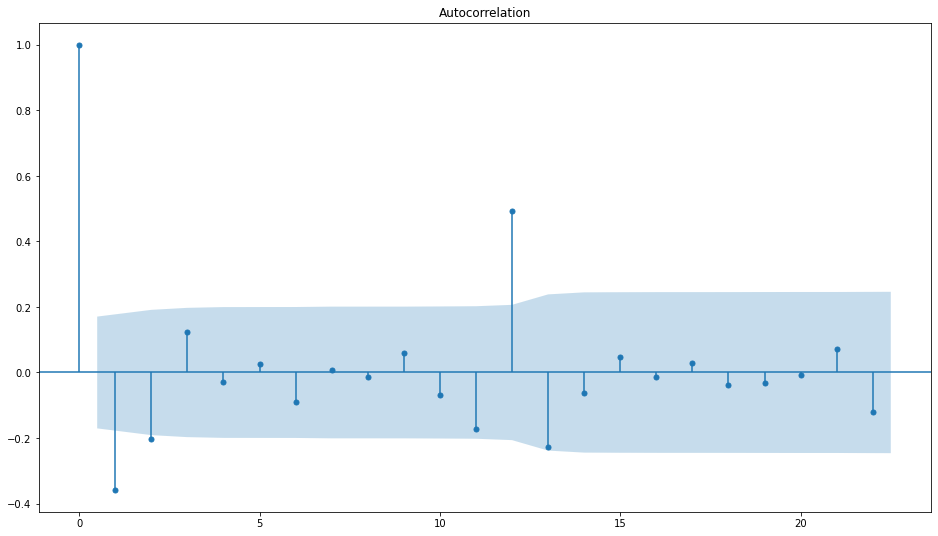

Text(0.5, 1.0, 'Rose Training Data Autocorrelation')

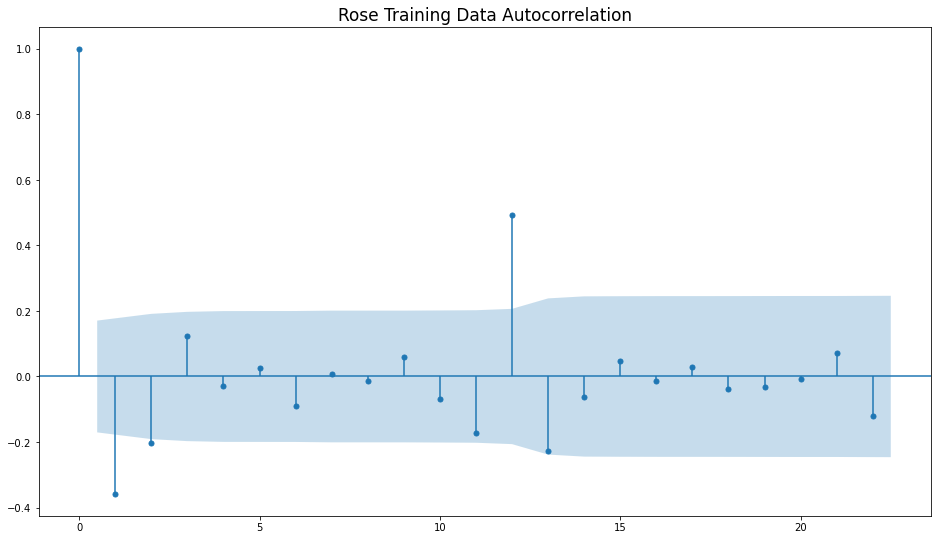

In [171]:
plot_acf(rtrain.diff(), missing='drop', alpha=0.05)
plt.title('Rose Training Data Autocorrelation',fontsize=17)

## Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off

#### By looking at the above plots, we will take the value of p and q to be 2 and 2 respectively.

In [172]:
manual_ARIMA = ARIMA(rtrain['Rose'], order=(2,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Sat, 02 Jul 2022   AIC                           1281.871
Time:                        15:38:52   BIC                           1296.247
Sample:                    01-01-1980   HQIC                          1287.712
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

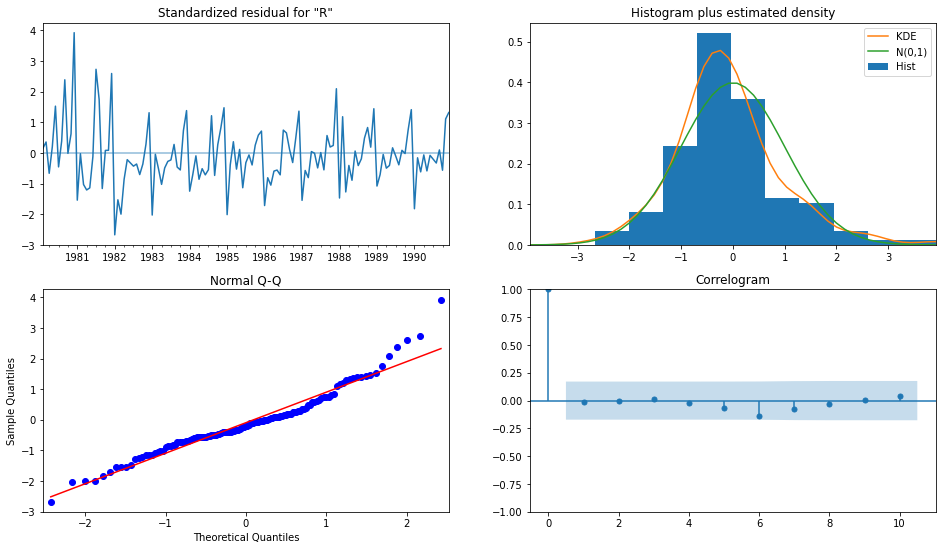

In [173]:
results_manual_ARIMA.plot_diagnostics();

## Predict on the Test Set using this model and evaluate the model.

In [174]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(rtest))

In [175]:
rmse = mean_squared_error(rtest['Rose'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 36.8711966129878 
MAPE: 76.05621270363592


In [176]:
resultsDf_rAR = pd.DataFrame({'Test RMSE Rose': rmse,'Test MAPE Rose':mape}
                           ,index=['ARIMA(2,1,2)'])
resultsDf_RARI = pd.concat([resultsDf_SAR12,resultsDf_rAR])
resultsDf_RARI

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)                      36.811514       75.835805
SARIMA(2, 1, 3)(2, 0, 3, 6)       27.124116       55.239893
SARIMA(2,1,2)(3,1,2,12)           15.357192       22.955567
ARIMA(2,1,2)                      36.871197       76.056213

In [177]:
resultsDf_RARI = pd.DataFrame({'Test RMSE Rose': rmse,'Test MAPE Rose':mape}
                           ,index=['ARIMA(2,1,2)'])
resultsDf_rARI = pd.concat([results_rose,resultsDf_RARI])
resultsDf_rARI

Test RMSE Rose  \
RegressionOnTime                                         15.268955   
NaiveModel                                               79.718773   
SimpleAverageModel                                       53.460570   
2pointTrailingMovingAverage                              11.529278   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
Simple Exponential Smoothing                             36.796242   
Double Exponential Smoothing                             15.268957   
Triple Exponential Smoothing (Additive Season)           14.278440   
Triple Exponential Smoothing (Multiplicative Se...       20.189764   
ARIMA(2,1,3)                                             36.811514   
SARIMA(2, 1, 3)(2, 0, 3, 6)                              27.124116   
SARIMA(2,1,2)(3,1,2,12)                                  15.357192   
ARIMA(2,1,2)                                             36.871197   

                                                    Test MAPE Rose  
RegressionOnTime                                               NaN  
NaiveModel                                                     NaN  
SimpleAverageModel                                             NaN  
2pointTrailingMovingAverage                                    NaN  
4pointTrailingMovingAverage                                    NaN  
6pointTrailingMovingAverage                                    NaN  
9pointTrailingMovingAverage                                    NaN  
Simple Exponential Smoothing                                   NaN  
Double Exponential Smoothing                                   NaN  
Triple Exponential Smoothing (Additive Season)                 NaN  
Triple Exponential Smoothing (Multiplicative Se...             NaN  
ARIMA(2,1,3)                                             75.835805  
SARIMA(2, 1, 3)(2, 0, 3, 6)                              55.239893  
SARIMA(2,1,2)(3,1,2,12)                                  22.955567  
ARIMA(2,1,2)                                             76.056213

In [178]:
resultsDf_rARI.sort_values(by=['Test RMSE Rose'])

Test RMSE Rose  \
2pointTrailingMovingAverage                              11.529278   
Triple Exponential Smoothing (Additive Season)           14.278440   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
RegressionOnTime                                         15.268955   
Double Exponential Smoothing                             15.268957   
SARIMA(2,1,2)(3,1,2,12)                                  15.357192   
Triple Exponential Smoothing (Multiplicative Se...       20.189764   
SARIMA(2, 1, 3)(2, 0, 3, 6)                              27.124116   
Simple Exponential Smoothing                             36.796242   
ARIMA(2,1,3)                                             36.811514   
ARIMA(2,1,2)                                             36.871197   
SimpleAverageModel                                       53.460570   
NaiveModel                                               79.718773   

                                                    Test MAPE Rose  
2pointTrailingMovingAverage                                    NaN  
Triple Exponential Smoothing (Additive Season)                 NaN  
4pointTrailingMovingAverage                                    NaN  
6pointTrailingMovingAverage                                    NaN  
9pointTrailingMovingAverage                                    NaN  
RegressionOnTime                                               NaN  
Double Exponential Smoothing                                   NaN  
SARIMA(2,1,2)(3,1,2,12)                                  22.955567  
Triple Exponential Smoothing (Multiplicative Se...             NaN  
SARIMA(2, 1, 3)(2, 0, 3, 6)                              55.239893  
Simple Exponential Smoothing                                   NaN  
ARIMA(2,1,3)                                             75.835805  
ARIMA(2,1,2)                                             76.056213  
SimpleAverageModel                                             NaN  
NaiveModel                                                     NaN

Text(0.5, 1.0, 'ARIMA (2, 1, 2) Forecast - Rose')

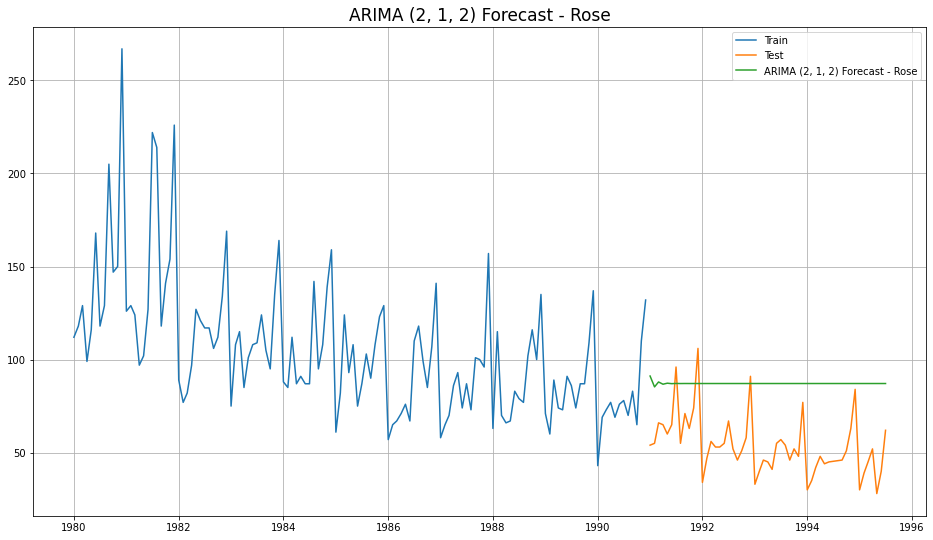

In [179]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(predicted_manual_ARIMA, label = 'ARIMA (2, 1, 2) Forecast - Rose')
plt.grid()
plt.legend(loc='best')
plt.title('ARIMA (2, 1, 2) Forecast - Rose', fontsize=17)

## Inference: I have created the SARIMA model in above part based on the cut-off points of ACF and PACF on the training data of Rose Wine Sales.

## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 12.

#### Let us look at the ACF and the PACF plots once more.

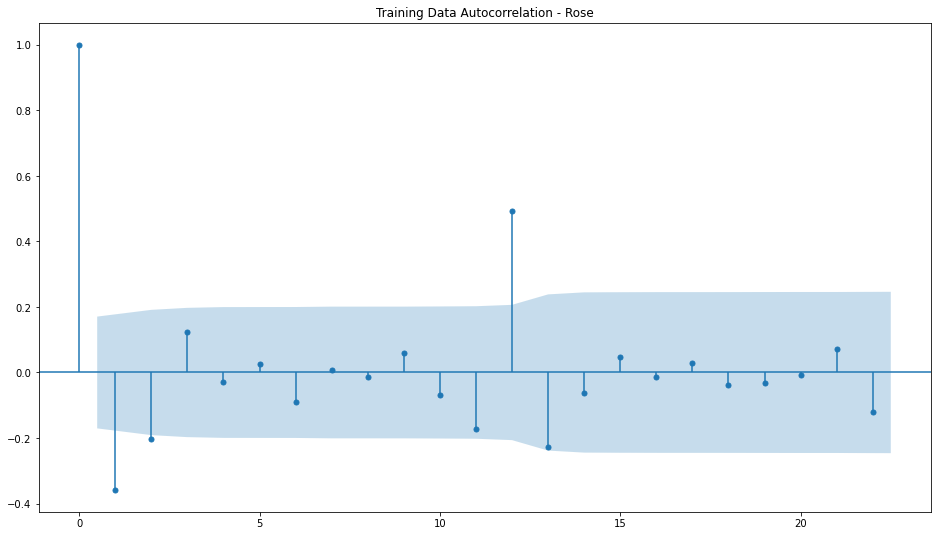

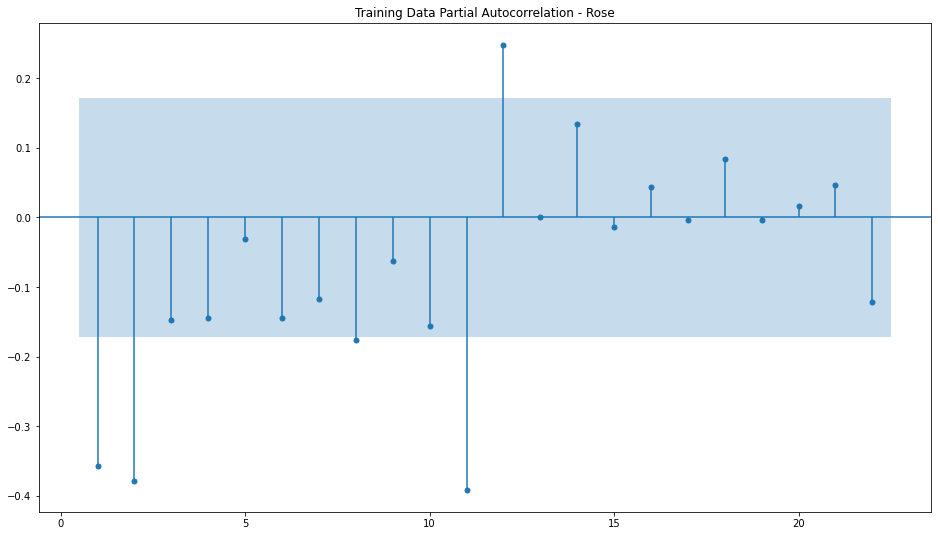

In [180]:
plot_acf(rtrain.diff(),title='Training Data Autocorrelation - Rose',missing='drop')
plot_pacf(rtrain.diff().dropna(),title='Training Data Partial Autocorrelation - Rose',zero=False,method='ywmle');

### Here, we have taken alpha=0.05.

#### We are going to take the seasonal period as 12
#### We are taking the p value to be 2 and the q value also to be 2 as the parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0. 
* The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 3.

In [181]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(rtrain['Rose'],
                                order=(2,1,2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -379.498
Date:                            Sat, 02 Jul 2022   AIC                            776.996
Time:                                    15:38:59   BIC                            799.692
Sample:                                01-01-1980   HQIC                           786.156
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8551      0.146     -5.838      0.000      -1.142      -0.568
ar.L2         -0.0022      0.125   

In [182]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(rtrain['Rose'],
                                order=(2,1,2),
                                seasonal_order=(3, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA1 = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(3, 1, 2, 12)   Log Likelihood                -334.893
Date:                            Sat, 02 Jul 2022   AIC                            689.786
Time:                                    15:39:12   BIC                            713.730
Sample:                                01-01-1980   HQIC                           699.392
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7091      0.403      1.758      0.079      -0.081       1.500
ar.L2         -0.1501      0.176   

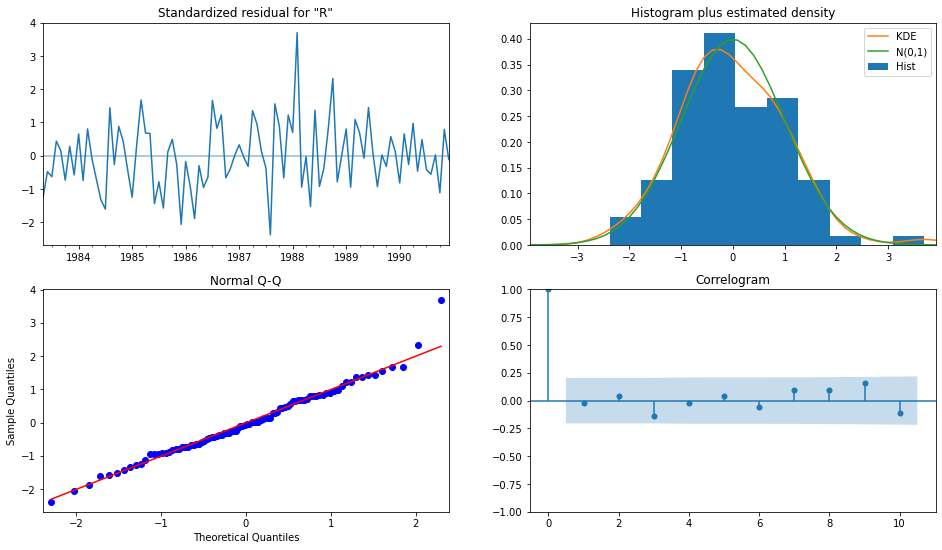

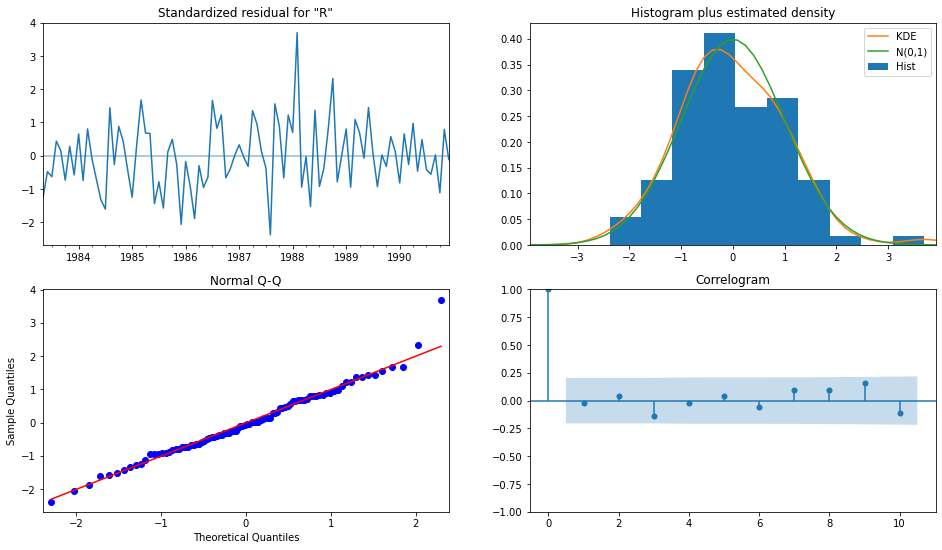

In [183]:
results_manual_SARIMA.plot_diagnostics()

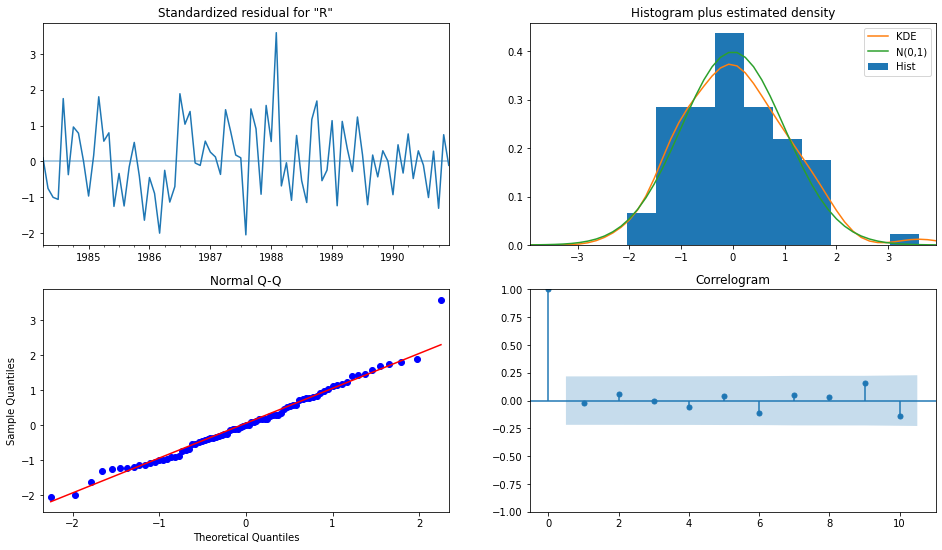

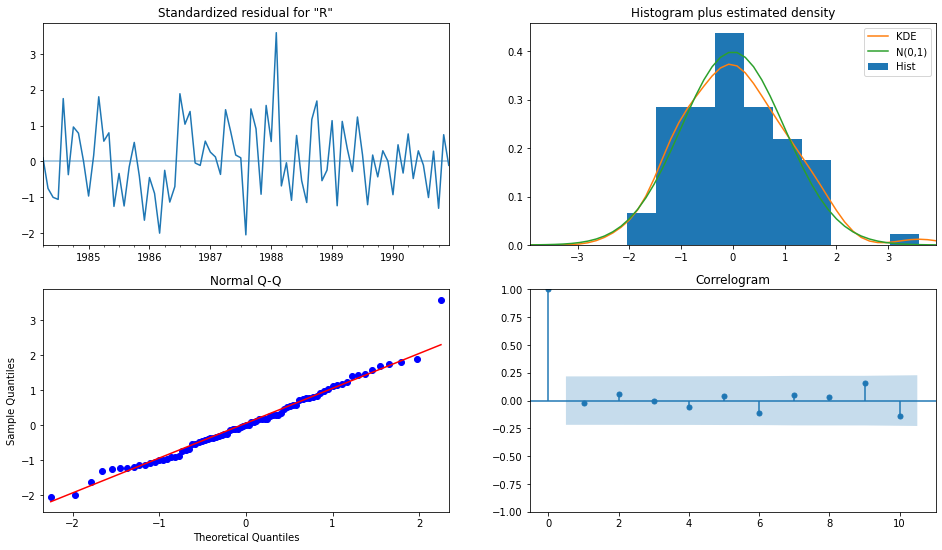

In [184]:
results_manual_SARIMA1.plot_diagnostics()

## Predict on the Test Set using this model and evaluate the model.

In [185]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(rtest))
                                                             
predicted_manual_SARIMA1 = results_manual_SARIMA1.get_forecast(steps=len(rtest))

In [186]:
rmse = mean_squared_error(rtest['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 16.550728497659694 
MAPE: 25.477141466344396


In [187]:
rmse = mean_squared_error(rtest['Rose'],predicted_manual_SARIMA1.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_manual_SARIMA1.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 15.35719203342261 
MAPE: 22.955566805370136


In [188]:
resultsDf_SAI12 = pd.DataFrame({'Test RMSE Rose': [rmse],'Test MAPE Rose':mape}
                           ,index=['SARIMA(2,1,2)(3,1,2,12)'])
resultsDf_SARI12 = pd.concat([resultsDf_RARI,resultsDf_SAI12])
resultsDf_SARI12

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,2)                  36.871197       76.056213
SARIMA(2,1,2)(3,1,2,12)       15.357192       22.955567

# ============================================================= #

## 08. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

### According to the question all the models are built in the sequence as per the given scenario.
### Here only the dataframe is being created of all the models along with their corresponding parameters and the respective RMSE values on the test data

In [189]:
resultsDf_RARI = pd.DataFrame({'Test RMSE Rose': rmse,'Test MAPE Rose':mape}
                           ,index=['ARIMA(2,1,2)'])
resultsDf_rARI = pd.concat([results_rose,resultsDf_RARI])
resultsDf_rARI

Test RMSE Rose  \
RegressionOnTime                                         15.268955   
NaiveModel                                               79.718773   
SimpleAverageModel                                       53.460570   
2pointTrailingMovingAverage                              11.529278   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
Simple Exponential Smoothing                             36.796242   
Double Exponential Smoothing                             15.268957   
Triple Exponential Smoothing (Additive Season)           14.278440   
Triple Exponential Smoothing (Multiplicative Se...       20.189764   
ARIMA(2,1,3)                                             36.811514   
SARIMA(2, 1, 3)(2, 0, 3, 6)                              27.124116   
SARIMA(2,1,2)(3,1,2,12)                                  15.357192   
ARIMA(2,1,2)                                             15.357192   

                                                    Test MAPE Rose  
RegressionOnTime                                               NaN  
NaiveModel                                                     NaN  
SimpleAverageModel                                             NaN  
2pointTrailingMovingAverage                                    NaN  
4pointTrailingMovingAverage                                    NaN  
6pointTrailingMovingAverage                                    NaN  
9pointTrailingMovingAverage                                    NaN  
Simple Exponential Smoothing                                   NaN  
Double Exponential Smoothing                                   NaN  
Triple Exponential Smoothing (Additive Season)                 NaN  
Triple Exponential Smoothing (Multiplicative Se...             NaN  
ARIMA(2,1,3)                                             75.835805  
SARIMA(2, 1, 3)(2, 0, 3, 6)                              55.239893  
SARIMA(2,1,2)(3,1,2,12)                                  22.955567  
ARIMA(2,1,2)                                             22.955567

In [190]:
resultsDf_rARI.sort_values(by=['Test RMSE Rose'])

Test RMSE Rose  \
2pointTrailingMovingAverage                              11.529278   
Triple Exponential Smoothing (Additive Season)           14.278440   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
RegressionOnTime                                         15.268955   
Double Exponential Smoothing                             15.268957   
SARIMA(2,1,2)(3,1,2,12)                                  15.357192   
ARIMA(2,1,2)                                             15.357192   
Triple Exponential Smoothing (Multiplicative Se...       20.189764   
SARIMA(2, 1, 3)(2, 0, 3, 6)                              27.124116   
Simple Exponential Smoothing                             36.796242   
ARIMA(2,1,3)                                             36.811514   
SimpleAverageModel                                       53.460570   
NaiveModel                                               79.718773   

                                                    Test MAPE Rose  
2pointTrailingMovingAverage                                    NaN  
Triple Exponential Smoothing (Additive Season)                 NaN  
4pointTrailingMovingAverage                                    NaN  
6pointTrailingMovingAverage                                    NaN  
9pointTrailingMovingAverage                                    NaN  
RegressionOnTime                                               NaN  
Double Exponential Smoothing                                   NaN  
SARIMA(2,1,2)(3,1,2,12)                                  22.955567  
ARIMA(2,1,2)                                             22.955567  
Triple Exponential Smoothing (Multiplicative Se...             NaN  
SARIMA(2, 1, 3)(2, 0, 3, 6)                              55.239893  
Simple Exponential Smoothing                                   NaN  
ARIMA(2,1,3)                                             75.835805  
SimpleAverageModel                                             NaN  
NaiveModel                                                     NaN

## 09. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

## Building the First most optimum model on the Full Data of ROSE WINE SALES Dataset.

#### Here, we have a scenario where our training data was stationary but our full data was not stationary. So, we will use the same parameters as our training data but with adding a level of differencing which is needed for the data to be stationary.

In [191]:
full_data_model = sm.tsa.statespace.SARIMAX(dfr['Rose'],
                                order=(2,1,2),
                                seasonal_order=(2,1,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -587.531
Date:                            Sat, 02 Jul 2022   AIC                           1193.062
Time:                                    15:39:20   BIC                           1219.976
Sample:                                01-01-1980   HQIC                          1203.997
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8649      0.101     -8.559      0.000      -1.063      -0.667
ar.L2          0.0340      0.091   

## Evaluate the model on the whole data and predict 12 months into the future for ROSE WINE SALES Dataset.

In [192]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [193]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  43.083488  12.674297      18.242323      67.924653
1995-09-01  43.341845  12.960068      17.940578      68.743112
1995-10-01  45.827188  12.964070      20.418078      71.236298
1995-11-01  57.397423  13.124798      31.673291      83.121556
1995-12-01  85.074950  13.133634      59.333501     110.816398

In [194]:
rmse = mean_squared_error(dfr['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 35.911038070585015


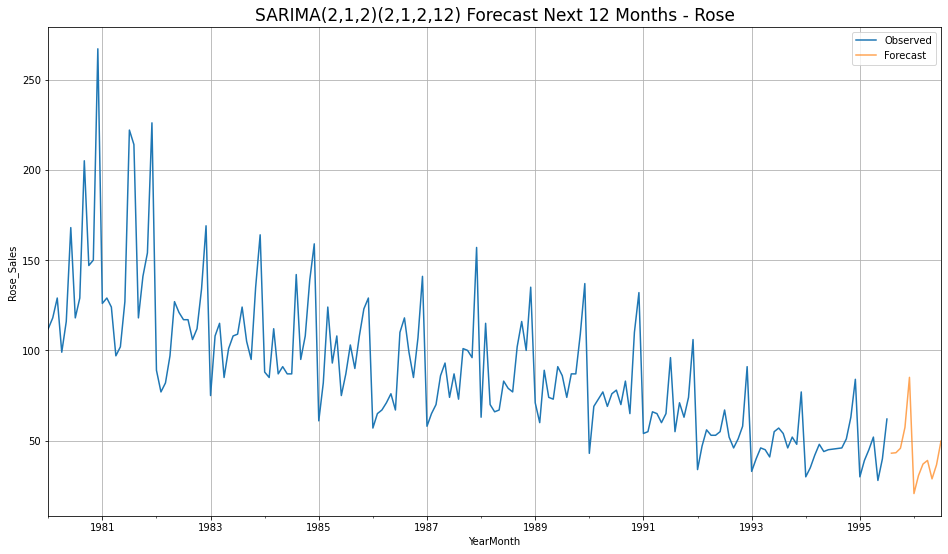

In [195]:
axis = dfr['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('YearMonth')
axis.set_ylabel('Rose_Sales')
plt.legend(loc='best')
plt.grid();
plt.title('SARIMA(2,1,2)(2,1,2,12) Forecast Next 12 Months - Rose', fontsize=17);

In [196]:
resultsDf_rARI

Test RMSE Rose  \
RegressionOnTime                                         15.268955   
NaiveModel                                               79.718773   
SimpleAverageModel                                       53.460570   
2pointTrailingMovingAverage                              11.529278   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
Simple Exponential Smoothing                             36.796242   
Double Exponential Smoothing                             15.268957   
Triple Exponential Smoothing (Additive Season)           14.278440   
Triple Exponential Smoothing (Multiplicative Se...       20.189764   
ARIMA(2,1,3)                                             36.811514   
SARIMA(2, 1, 3)(2, 0, 3, 6)                              27.124116   
SARIMA(2,1,2)(3,1,2,12)                                  15.357192   
ARIMA(2,1,2)                                             15.357192   

                                                    Test MAPE Rose  
RegressionOnTime                                               NaN  
NaiveModel                                                     NaN  
SimpleAverageModel                                             NaN  
2pointTrailingMovingAverage                                    NaN  
4pointTrailingMovingAverage                                    NaN  
6pointTrailingMovingAverage                                    NaN  
9pointTrailingMovingAverage                                    NaN  
Simple Exponential Smoothing                                   NaN  
Double Exponential Smoothing                                   NaN  
Triple Exponential Smoothing (Additive Season)                 NaN  
Triple Exponential Smoothing (Multiplicative Se...             NaN  
ARIMA(2,1,3)                                             75.835805  
SARIMA(2, 1, 3)(2, 0, 3, 6)                              55.239893  
SARIMA(2,1,2)(3,1,2,12)                                  22.955567  
ARIMA(2,1,2)                                             22.955567

In [197]:
resultsDf_rARI.sort_values(by=['Test RMSE Rose'])

Test RMSE Rose  \
2pointTrailingMovingAverage                              11.529278   
Triple Exponential Smoothing (Additive Season)           14.278440   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
RegressionOnTime                                         15.268955   
Double Exponential Smoothing                             15.268957   
SARIMA(2,1,2)(3,1,2,12)                                  15.357192   
ARIMA(2,1,2)                                             15.357192   
Triple Exponential Smoothing (Multiplicative Se...       20.189764   
SARIMA(2, 1, 3)(2, 0, 3, 6)                              27.124116   
Simple Exponential Smoothing                             36.796242   
ARIMA(2,1,3)                                             36.811514   
SimpleAverageModel                                       53.460570   
NaiveModel                                               79.718773   

                                                    Test MAPE Rose  
2pointTrailingMovingAverage                                    NaN  
Triple Exponential Smoothing (Additive Season)                 NaN  
4pointTrailingMovingAverage                                    NaN  
6pointTrailingMovingAverage                                    NaN  
9pointTrailingMovingAverage                                    NaN  
RegressionOnTime                                               NaN  
Double Exponential Smoothing                                   NaN  
SARIMA(2,1,2)(3,1,2,12)                                  22.955567  
ARIMA(2,1,2)                                             22.955567  
Triple Exponential Smoothing (Multiplicative Se...             NaN  
SARIMA(2, 1, 3)(2, 0, 3, 6)                              55.239893  
Simple Exponential Smoothing                                   NaN  
ARIMA(2,1,3)                                             75.835805  
SimpleAverageModel                                             NaN  
NaiveModel                                                     NaN

## Best Model for ROSE WINE SALES with Least RMSE - 2 Pt Moving Average

In [198]:
MovingAverage = dfr.copy()
MovingAverage.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

## Trailing moving averages for ROSE WINE SALES DATASET.

In [199]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()

MovingAverage.head()
MovingAverage.tail()

Rose  Trailing_2
YearMonth                    
1980-01-01  112.0         NaN
1980-02-01  118.0       115.0
1980-03-01  129.0       123.5
1980-04-01   99.0       114.0
1980-05-01  116.0       107.5

Rose  Trailing_2
YearMonth                   
1995-03-01  45.0        42.0
1995-04-01  52.0        48.5
1995-05-01  28.0        40.0
1995-06-01  40.0        34.0
1995-07-01  62.0        51.0

In [200]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']


MovingAverage.head()

Rose  Trailing_2
YearMonth                    
1980-01-01  112.0         NaN
1980-02-01  118.0       115.0
1980-03-01  129.0       123.5
1980-04-01   99.0       114.0
1980-05-01  116.0       107.5

In [201]:
import pandas as pd
from datetime import datetime

datelist = pd.date_range(start='08/01/1995', periods=12, freq='MS')
ts = pd.to_datetime(datelist, format="%Y-%m-%d")

ma_forecast = pd.DataFrame(columns=['Rose', 'Trailing_2', 'forecast_12'], index=ts)

MovingAverage = pd.concat([MovingAverage, ma_forecast], axis=0)
MovingAverage['forecast_12'] = MovingAverage['Rose'].rolling(2).mean()

In [202]:
MovingAverage.tail()
MovingAverage.shape
MovingAverage.fillna(0)
MovingAverage['Rose'].iloc[0:2]

Rose  Trailing_2  forecast_12
1996-03-01   NaN         NaN          NaN
1996-04-01   NaN         NaN          NaN
1996-05-01   NaN         NaN          NaN
1996-06-01   NaN         NaN          NaN
1996-07-01   NaN         NaN          NaN

(199, 3)

Rose  Trailing_2  forecast_12
1980-01-01  112.0         0.0          0.0
1980-02-01  118.0       115.0        115.0
1980-03-01  129.0       123.5        123.5
1980-04-01   99.0       114.0        114.0
1980-05-01  116.0       107.5        107.5
...           ...         ...          ...
1996-03-01    0.0         0.0          0.0
1996-04-01    0.0         0.0          0.0
1996-05-01    0.0         0.0          0.0
1996-06-01    0.0         0.0          0.0
1996-07-01    0.0         0.0          0.0

[199 rows x 3 columns]

1980-01-01    112.0
1980-02-01    118.0
Name: Rose, dtype: float64

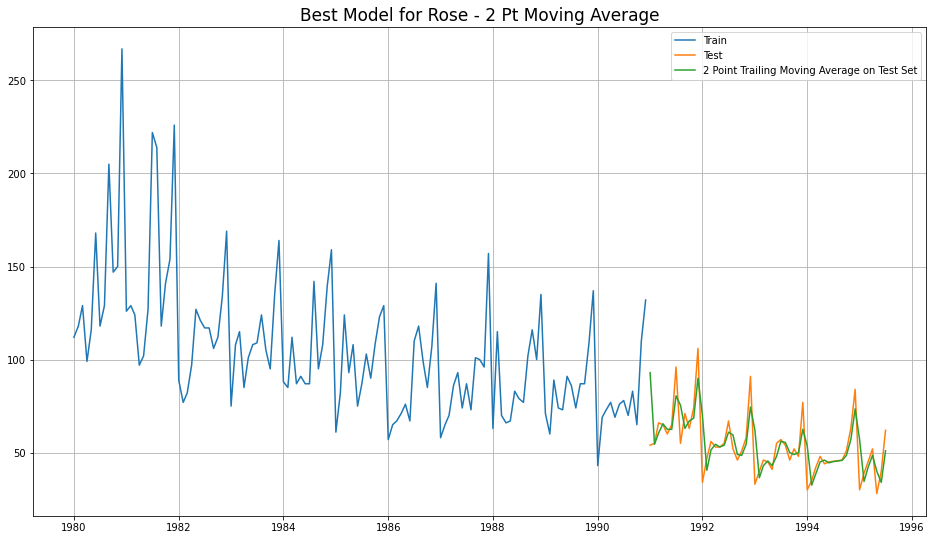

In [203]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')


plt.legend(loc = 'best')
plt.grid();
plt.title('Best Model for Rose - 2 Pt Moving Average', fontsize=17);

## FORECAST ON NEXT 12 MONTHS ON ROSE WINE SALES.

## (Using 2 Pt Moving Average Model).

In [204]:
dfr1 = pd.read_csv('Rose.csv', parse_dates=True,index_col='YearMonth')
dfr1.head()
dfr1.tail()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

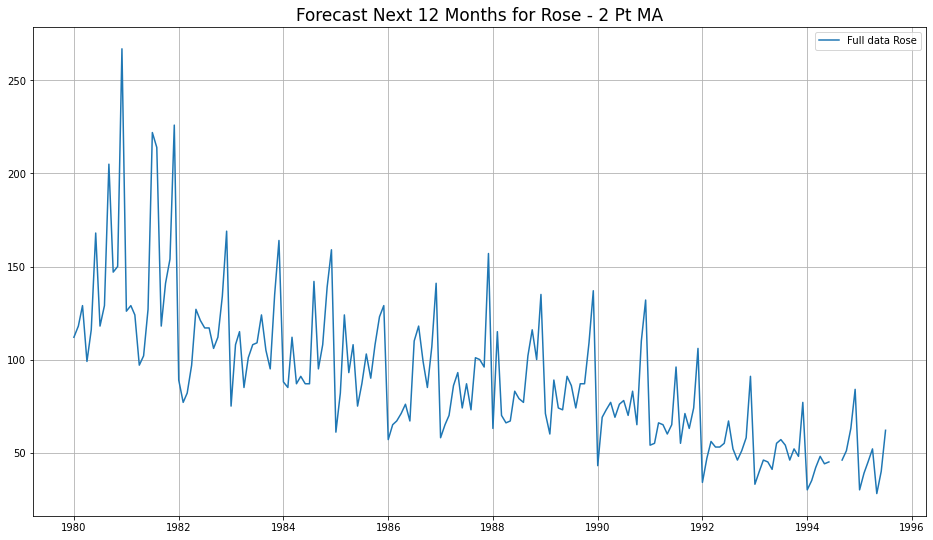

In [205]:
## FORECAST ON NEXT 12 MONTHS

plt.figure(figsize=(16,9))
plt.plot(dfr1['Rose'], label='Full data Rose')
##plt.plot(dfr1['forecast'].iloc[-12:], label='Forecast on next 12 months')

plt.legend(loc='best')
plt.grid()
plt.title('Forecast Next 12 Months for Rose - 2 Pt MA', fontsize=17);

## Building the Second most optimum model on ROSE WINE SALES - TES ETS(A, A, A).

#### Here, we have a scenario where our training data was stationary but our full data was not stationary. So, we will use the same parameters as our training data but with adding a level of differencing which is needed for the data to be stationary.

In [206]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(dfr,trend='add',seasonal='additive',initialization_method='estimated', damped_trend=False)
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.10004205357726026, 'smoothing_trend': 0.005460931332325488, 'smoothing_seasonal': 0.002369189635224424, 'damping_trend': nan, 'initial_level': 146.15301435958608, 'initial_trend': -0.5547071735515288, 'initial_seasons': array([-27.99255907, -17.21137823,  -9.15141909, -15.79697167,
       -11.86552002,  -5.86732672,   5.30883239,   5.42478795,
         2.77609689,   2.057545  ,  17.1829741 ,  55.90232469]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [207]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES_am.forecast(steps=12)
TES_predict
prediction_1 = TES_predict

1995-08-01    50.123621
1995-09-01    46.952806
1995-10-01    45.709683
1995-11-01    60.308535
1995-12-01    98.500361
1996-01-01    14.085685
1996-02-01    24.343326
1996-03-01    31.877575
1996-04-01    24.708757
1996-05-01    28.108126
1996-06-01    33.580485
1996-07-01    44.200468
Freq: MS, dtype: float64

In [208]:
plt.rcParams["figure.figsize"] = [16,9]

In [209]:
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(model_TES_am.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(model_TES_am.resid,ddof=1)})
pred_1_df.head()

lower_CI  prediction    upper_ci
1995-08-01  15.294978   50.123621   84.952264
1995-09-01  12.124163   46.952806   81.781450
1995-10-01  10.881040   45.709683   80.538327
1995-11-01  25.479891   60.308535   95.137178
1995-12-01  63.671718   98.500361  133.329005

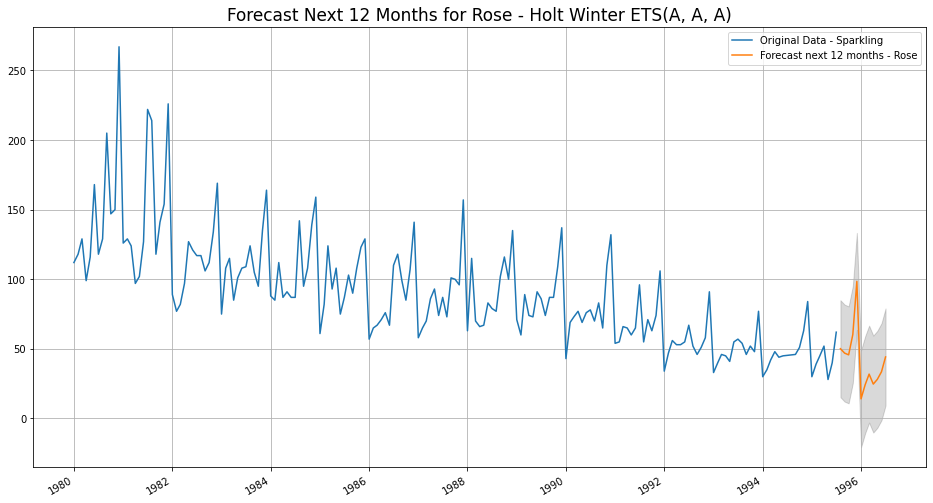

In [210]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(dfr['Rose'], label='Original Data - Sparkling')

ax =TES_predict.plot(label='Forecast next 12 months - Rose')


ax.fill_between(pred_1_df.index,pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)

plt.legend(loc='best')
plt.grid()
plt.title('Forecast Next 12 Months for Rose - Holt Winter ETS(A, A, A)', fontsize=17);

## 10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

## Problem:
## For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century - Sparkling Dataset.


## Importing the Necessary Library.

In [211]:
# Importing the necessary packages

import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import seaborn                         as      sns
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 01 Read the data as an appropriate Time Series data and plot the data.

In [212]:
dfs = pd.read_csv('Sparkling.csv',parse_dates=True,index_col='YearMonth')
##dfs.head().to_csv('spark_head.csv')
dfs.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [213]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [214]:
dfs.shape

(187, 1)

## Checking for mkissing values.

In [215]:
dfs.isnull().sum()

Sparkling    0
dtype: int64

## Plotting the Time series Of Sparkling wines Dataset. 

Text(0.5, 1.0, 'Sparkling Wine Time Series')

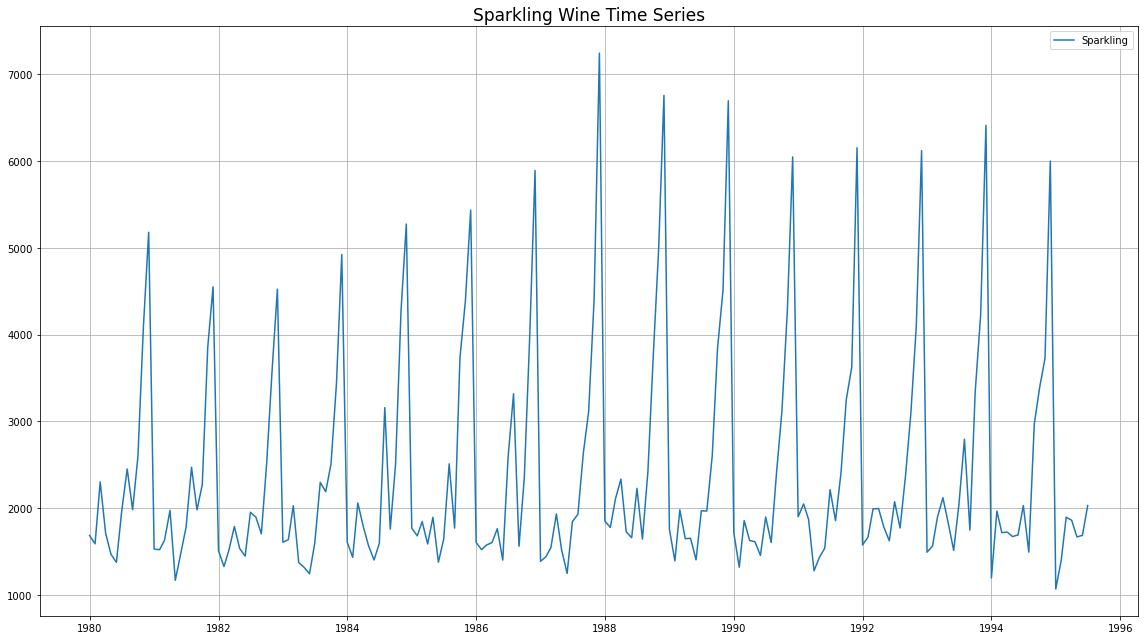

In [216]:
# SPARKLING TIME SERIES

plt.plot(dfs);
plt.title('Sparkling Wine Time Series', fontsize=17);
plt.grid();
plt.legend(['Sparkling']);
plt.tight_layout()

## 02. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

### Check the basic measures of descriptive statistics of the Time Series

In [217]:
round(dfs.describe().T,3)

count      mean       std     min     25%     50%     75%     max
Sparkling  187.0  2402.417  1295.112  1070.0  1605.0  1874.0  2549.0  7242.0

## Plot a year on year boxplot for the Sparkling Wine Sales.

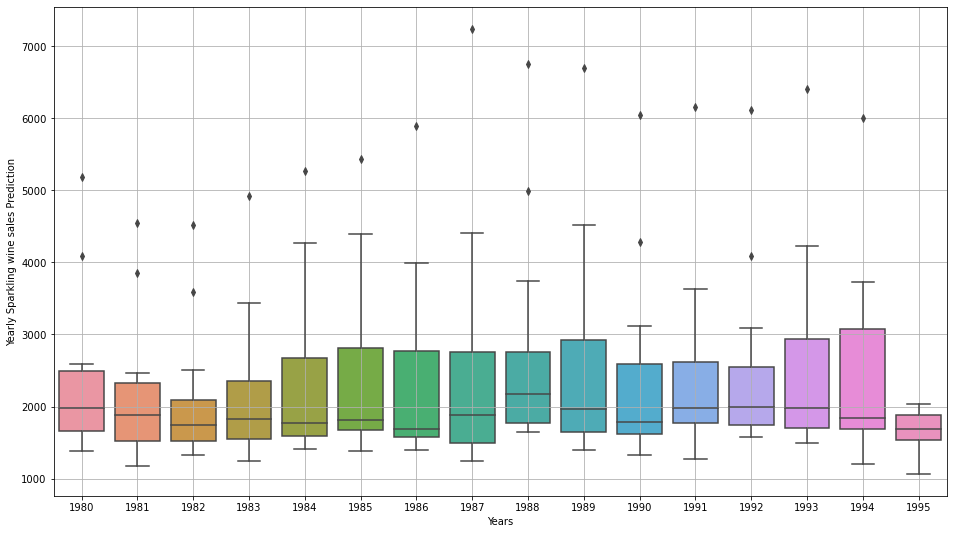

In [218]:
sns.boxplot(x = dfs.index.year, y = dfs['Sparkling']);
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Sparkling wine sales Prediction');

### As we got to know from the Time Series plot, the boxplots over here also indicates a measure of trend being present. Also, we see that the Sparkling wine Sales has some outliers for certain years.

### Box Plotting MonthWise for Sparkling Wine Sales.

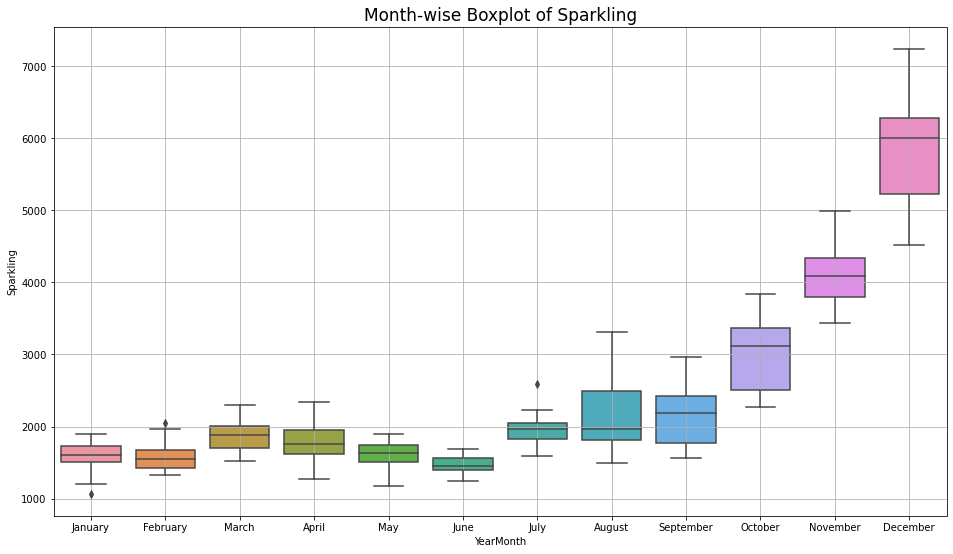

In [219]:
sns.boxplot(x = dfs.index.month_name(), y = dfs['Sparkling']);
plt.grid();
plt.title('Month-wise Boxplot of Sparkling', fontsize=17);

## Plot a monthplot of the given Time series of Sparkling wine sales.

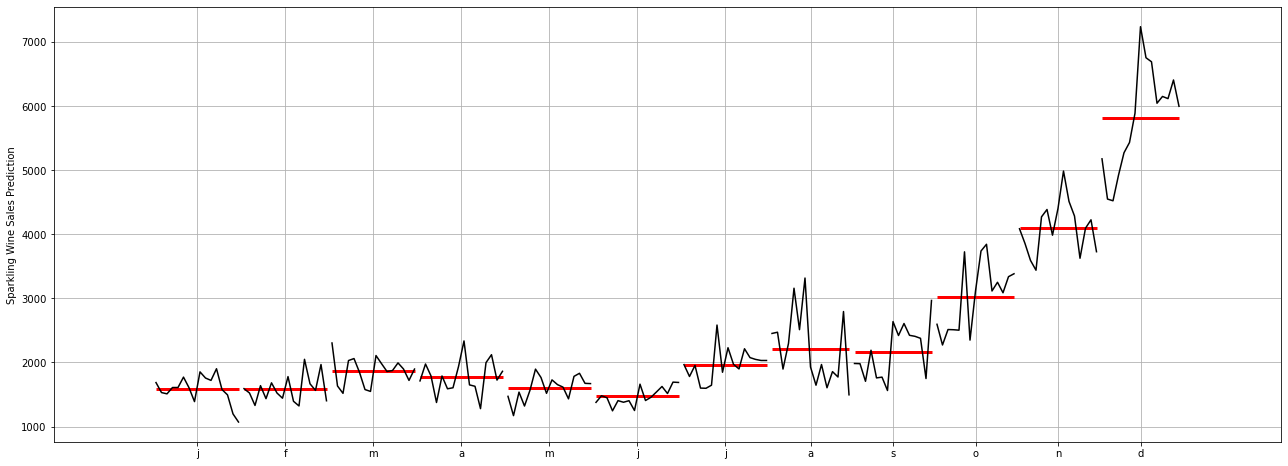

In [220]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))
month_plot(dfs,ylabel='Sparkling Wine Sales Prediction',ax=ax)
plt.grid();

## Plot the Time Series according to different months for different years for Sparkling Wine Sales.

In [221]:
yearly_sales_across_months_sp = pd.pivot_table(dfs, values = 'Sparkling', columns = dfs.index.month, 
                                        index = dfs.index.year)
yearly_sales_across_months_sp

YearMonth      1       2       3       4       5       6       7       8   \
YearMonth                                                                   
1980       1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981       1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982       1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983       1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984       1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985       1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986       1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987       1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988       1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989       1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990       1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991       1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992       1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993       1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994       1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995       1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

YearMonth      9       10      11      12  
YearMonth                                  
1980       1984.0  2596.0  4087.0  5179.0  
1981       1981.0  2273.0  3857.0  4551.0  
1982       1706.0  2514.0  3593.0  4524.0  
1983       2191.0  2511.0  3440.0  4923.0  
1984       1759.0  2504.0  4273.0  5274.0  
1985       1771.0  3727.0  4388.0  5434.0  
1986       1562.0  2349.0  3987.0  5891.0  
1987       2638.0  3114.0  4405.0  7242.0  
1988       2421.0  3740.0  4988.0  6757.0  
1989       2608.0  3845.0  4514.0  6694.0  
1990       2424.0  3116.0  4286.0  6047.0  
1991       2408.0  3252.0  3627.0  6153.0  
1992       2377.0  3088.0  4096.0  6119.0  
1993       1749.0  3339.0  4227.0  6410.0  
1994       2968.0  3385.0  3729.0  5999.0  
1995          NaN     NaN     NaN     NaN

## 02(B) Decompose the Time Series and plot the different components.

In [222]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

### Additive Decomposition of Sparkling WIne Sales.

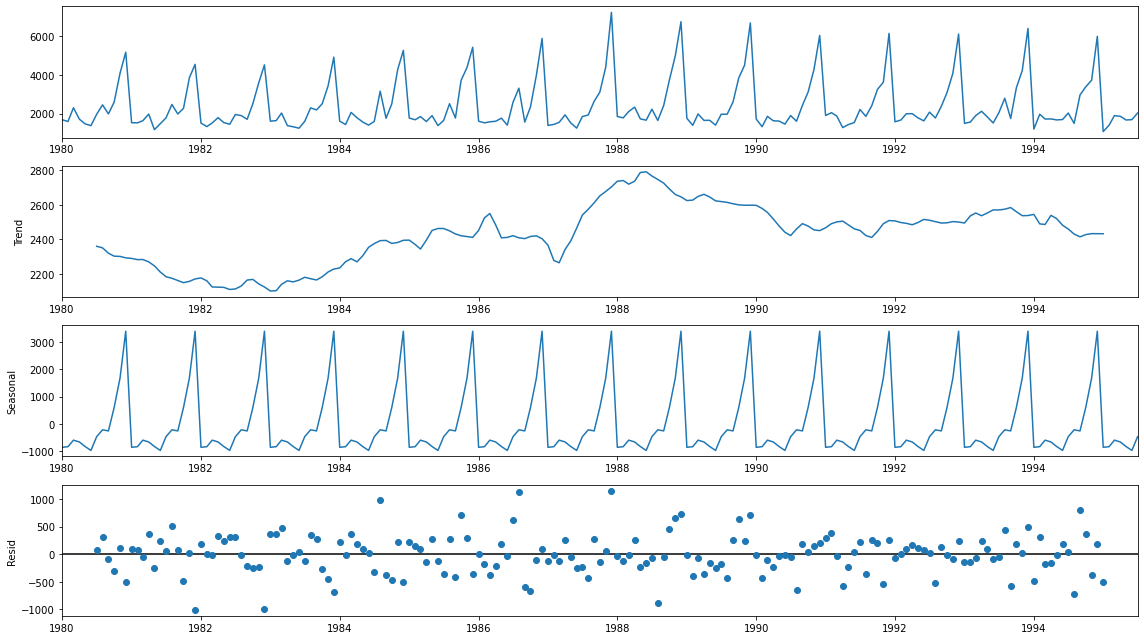

In [223]:
decompositions = seasonal_decompose(dfs,model='additive')
decompositions.plot();

In [224]:
trend = decompositions.trend
seasonality = decompositions.seasonal
residual = decompositions.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290


In [225]:
cvsa = residual.std()/residual.mean()
cvsa

-296.08335294142995

### Multiplicative Decomposition of Sparkling Wine Sales.

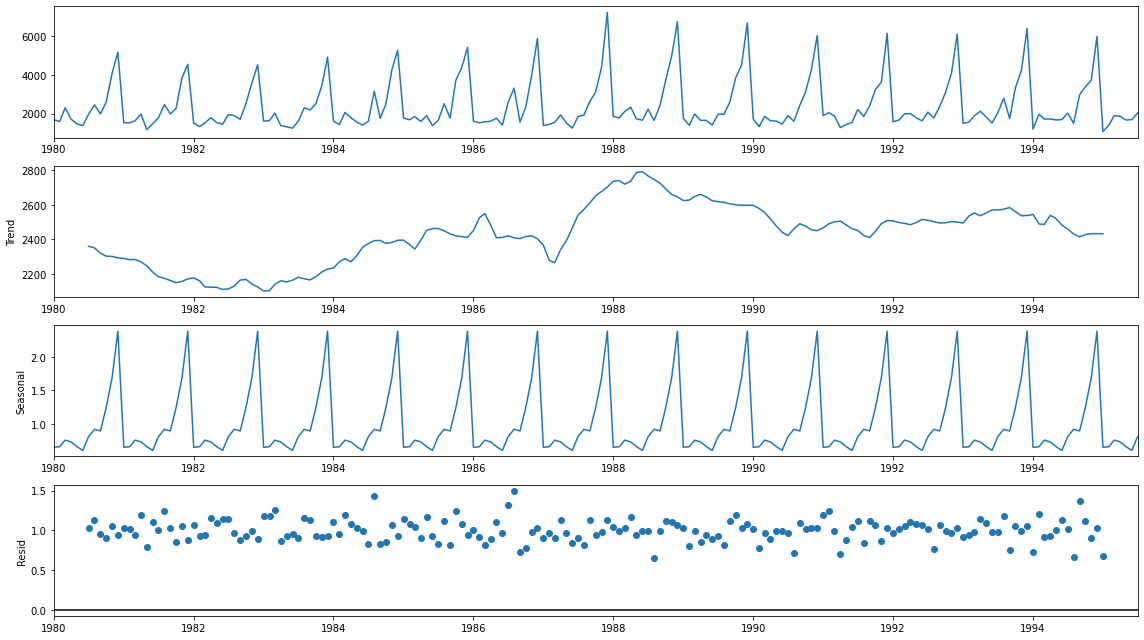

In [226]:
decompositionms = seasonal_decompose(dfs,model='multiplicative')
decompositionms.plot();

In [227]:
trend = decompositionms.trend
seasonality = decompositionms.seasonal
residual = decompositionms.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-01    1.050423
1980-12-01    0.946770
Name: resi

In [228]:
cvsm = residual.std()/residual.mean()
cvsm

0.13886244212828963

## 03. Split the data into training and test. The test data should start in 1991.

### Splittiung the Sparkling Wine Sales Dataset Into Training & Testing Set.

In [229]:
# SPARKLING DATA SPLIT

strain = dfs[dfs.index<'1991'] 
stest = dfs[dfs.index>='1991']

In [230]:
print(strain.shape)
print(stest.shape)

(132, 1)
(55, 1)


In [231]:
from IPython.display import display

In [232]:
# SPARKLING DATA TRAIN AND TEST

print('First few rows of Sparkling Training Data')
display(strain.head())
print('Last few rows of Sparkling Training Data')
display(strain.tail())
print('First few rows of Sparkling Test Data')
display(stest.head())
print('Last few rows of Sparkling Test Data')
display(stest.tail())

First few rows of Sparkling Training Data


Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

Last few rows of Sparkling Training Data


Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

First few rows of Sparkling Test Data


Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432

Last few rows of Sparkling Test Data


Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

### Plotting the Sparkling wine Sales Train & Test Dataset.

<AxesSubplot:xlabel='YearMonth'>

<AxesSubplot:xlabel='YearMonth'>

Text(0.5, 1.0, 'Sparkling Data Train and Test Split')

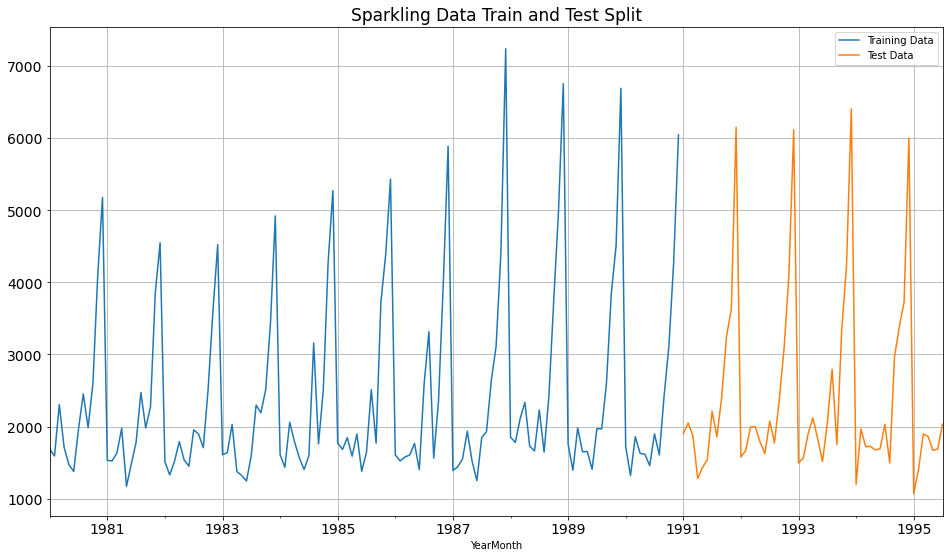

In [233]:
# SPARKLING DATA TRAIN TEST SPLIT TIME SERIES

strain['Sparkling'].plot(fontsize=14)
stest['Sparkling'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.title('Sparkling Data Train and Test Split', fontsize=17)
plt.show()

## Building different models and comparing the accuracy metrics.

### Model 1: Linear Regression on Sparkling Wine Sales.
### For this particular linear regression, we are going to regress the 'Sparkling' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [234]:
print(strain.shape)
print(stest.shape)

(132, 1)
(55, 1)


In [235]:
train_time = [i+1 for i in range(len(strain))]
test_time = [i+133 for i in range(len(stest))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


#### We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [236]:
LinearRegression_train = strain.copy()
LinearRegression_test = stest.copy()

In [237]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5

Last few rows of Training Data


Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132

First few rows of Test Data


Sparkling  time
YearMonth                  
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135
1991-04-01       1279   136
1991-05-01       1432   137

Last few rows of Test Data


Sparkling  time
YearMonth                  
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187

### Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to build the model on the training data and test the model on the test data.

In [238]:
from sklearn.linear_model import LinearRegression

In [239]:
lr = LinearRegression()

In [240]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])

LinearRegression()

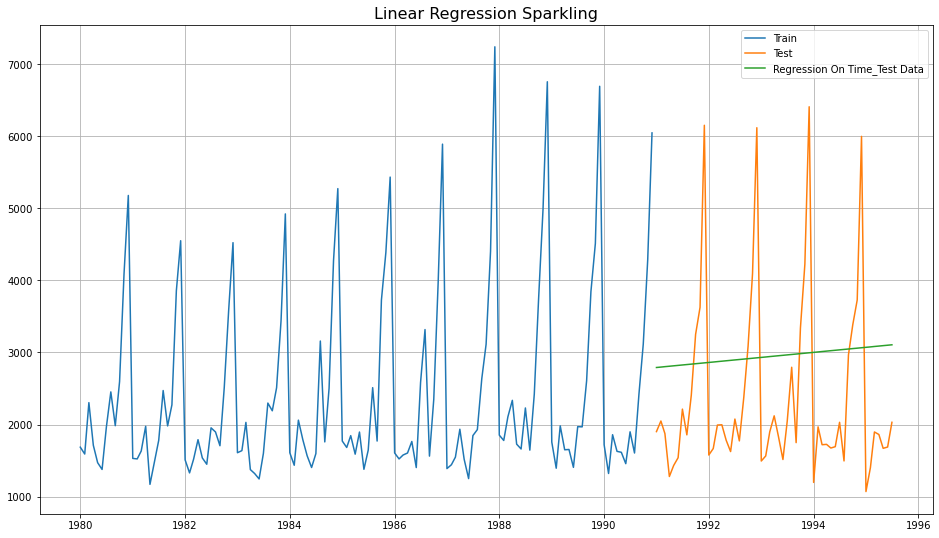

In [241]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot(strain['Sparkling'], label='Train')
plt.plot(stest['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.title('Linear Regression Sparkling', fontsize=16)
plt.grid();

### Defining the functions for calculating the accuracy metrics.

In [242]:
from sklearn import metrics

### Model Evaluation of Sparkling wine Sales.

In [243]:
rmse_model12_test = metrics.mean_squared_error(stest['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model12_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135 


In [244]:
resultsDf_11 = pd.DataFrame({'Test RMSE Sparkling': [rmse_model12_test]},index=['RegressionOnTime'])
resultsDf_11

Test RMSE Sparkling
RegressionOnTime          1389.135175

## Model 2: Naive Approach Rose :  𝑦̂ 𝑡+1=𝑦𝑡.

### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [245]:
NaiveModel_train = strain.copy()
NaiveModel_test = stest.copy()

In [246]:
strain.tail()

Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

In [247]:
NaiveModel_test['naive'] = np.asarray(strain['Sparkling'])[len(np.asarray(strain['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

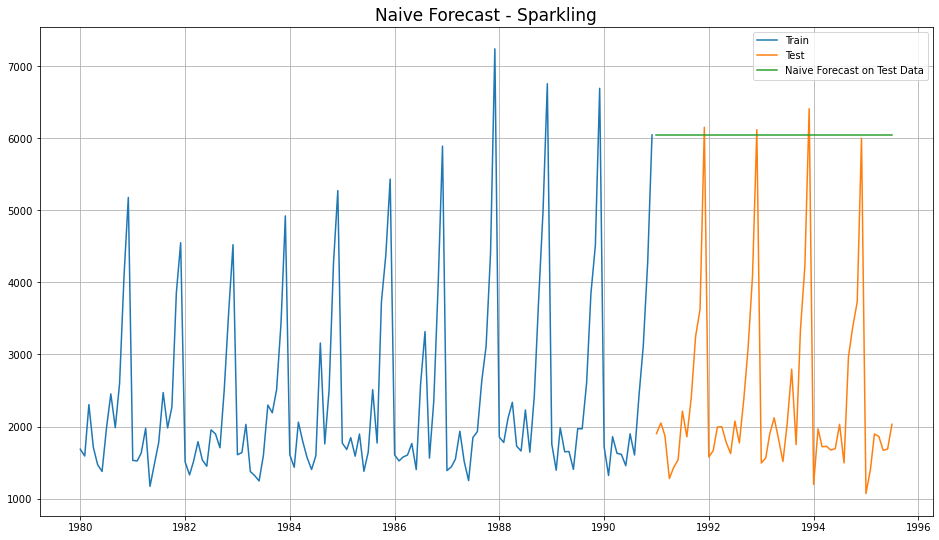

In [248]:
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(stest['Sparkling'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast - Sparkling", fontsize=17)
plt.grid();

## Model Evaluation of Sparkling wine Sales.

In [249]:
rmse_model22_test = metrics.mean_squared_error(stest['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For NaiveModel forecast on the Test Data,  RMSE is %3.3f" %(rmse_model22_test))

For NaiveModel forecast on the Test Data,  RMSE is 3864.279


In [250]:
resultsDf_21 = pd.DataFrame({'Test RMSE Sparkling': [rmse_model22_test]},
                            index=['NaiveModel'])
resultsDf_22 = pd.concat([resultsDf_11, resultsDf_21], axis=0)
resultsDf_22

Test RMSE Sparkling
RegressionOnTime          1389.135175
NaiveModel                3864.279352

## Model 3: Simple Average Sparkling Wine Sales.

### For this particular simple average method, we will forecast by using the average of the training values.

In [251]:
SimpleAverage_train = strain.copy()
SimpleAverage_test = stest.copy()

In [252]:
SimpleAverage_test['mean_forecast'] = strain['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
YearMonth                           
1991-01-01       1902    2403.780303
1991-02-01       2049    2403.780303
1991-03-01       1874    2403.780303
1991-04-01       1279    2403.780303
1991-05-01       1432    2403.780303

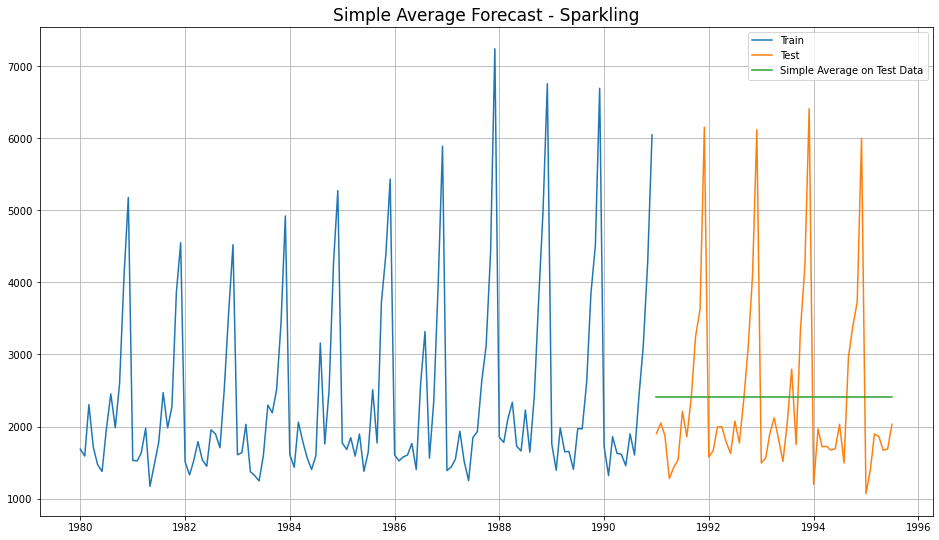

In [253]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast - Sparkling", fontsize=17)
plt.grid();

## Model Evaluation of Sparkling wine Sales.

In [254]:
rmse_model32_test = metrics.mean_squared_error(stest['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on Sparkling Test Data,  RMSE is %3.3f" %(rmse_model32_test))

For Simple Average forecast on Sparkling Test Data,  RMSE is 1275.082


In [255]:
resultsDf_31 = pd.DataFrame({'Test RMSE Sparkling': [rmse_model32_test]}
                           ,index=['SimpleAverageModel'])
resultsDf_32 = pd.concat([resultsDf_22, resultsDf_31], axis=0)
resultsDf_32

Test RMSE Sparkling
RegressionOnTime            1389.135175
NaiveModel                  3864.279352
SimpleAverageModel          1275.081804

## Model 4: Moving Average(MA) - Sparkling Wine Sales.

### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

### For Moving Average, we are going to average over the entire data.

In [256]:
MovingAverage = dfs.copy()
MovingAverage.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

### Trailing moving averages Sparkling Wine Sales.

In [257]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                            
1980-01-01       1686         NaN         NaN         NaN         NaN
1980-02-01       1591      1638.5         NaN         NaN         NaN
1980-03-01       2304      1947.5         NaN         NaN         NaN
1980-04-01       1712      2008.0     1823.25         NaN         NaN
1980-05-01       1471      1591.5     1769.50         NaN         NaN

Text(0.5, 1.0, 'Moving Average - Sparkling')

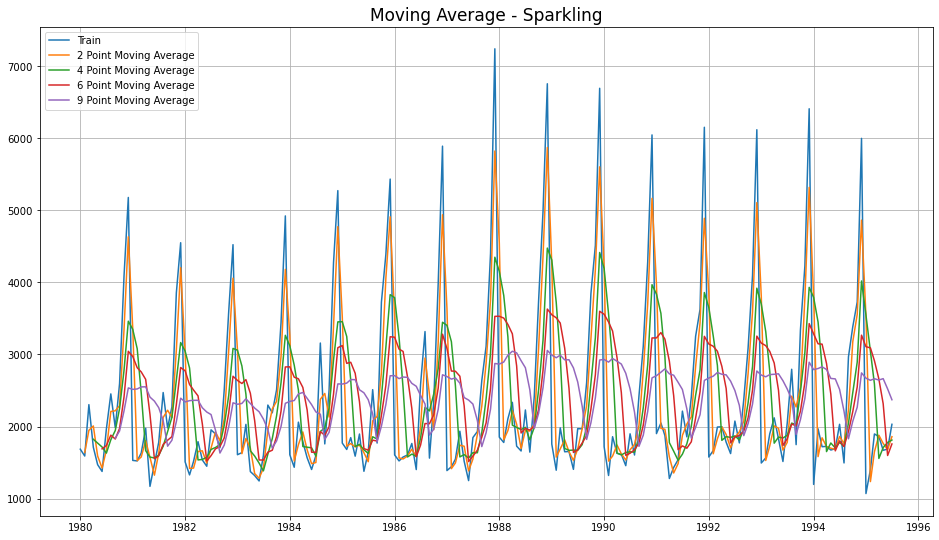

In [258]:
## Plotting on the whole data

plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average - Sparkling', fontsize=17)

### Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [259]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

<Figure size 1152x648 with 0 Axes>

Text(0.5, 1.0, 'Moving Average Forecast - Sparkling')

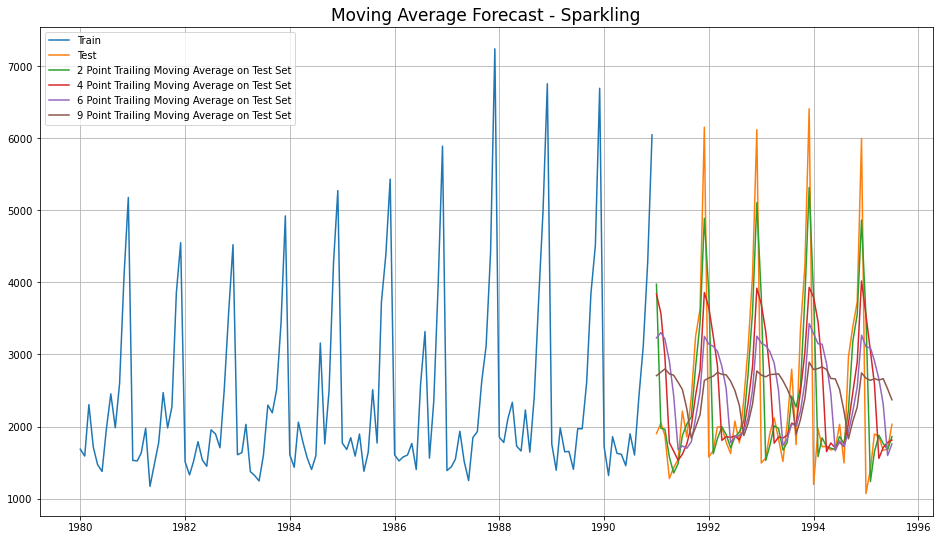

In [260]:
## Plotting on Test data

plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average Forecast - Sparkling', fontsize=17)

## Model Evaluation on Sparkling Wine sales.

#### Done only on the test data.

In [261]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(stest['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(stest['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(stest['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(stest['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 1346.278


In [262]:
resultsDf_41 = pd.DataFrame({'Test RMSE Sparkling': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])
resultsDf_42 = pd.concat([resultsDf_32, resultsDf_41], axis=0)
resultsDf_42

Test RMSE Sparkling
RegressionOnTime                     1389.135175
NaiveModel                           3864.279352
SimpleAverageModel                   1275.081804
2pointTrailingMovingAverage           813.400684
4pointTrailingMovingAverage          1156.589694
6pointTrailingMovingAverage          1283.927428
9pointTrailingMovingAverage          1346.278315

## Consolidated plots of All Models- Sparkling Wine Sales.

In [263]:
# LR on Sparkling
train_time = [i+1 for i in range(len(strain))]
test_time = [i+133 for i in range(len(stest))]
LinearRegression_train = strain.copy()
LinearRegression_test = stest.copy()
LinearRegression_test['time'] = test_time
LinearRegression_train['time'] = train_time
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

# NB on Sparkling
NaiveModel_train = strain.copy()
NaiveModel_test = stest.copy()
NaiveModel_test['naive'] = np.asarray(strain['Sparkling'])[len(np.asarray(strain['Sparkling']))-1]

# SA on Sparkling
SimpleAverage_train = strain.copy()
SimpleAverage_test = stest.copy()
SimpleAverage_test['mean_forecast'] = strain['Sparkling'].mean()

# MA on Sparkling

MovingAverage = dfs.copy()
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
trailing_MovingAverage_test = MovingAverage[MovingAverage.index>='1991']

LinearRegression()

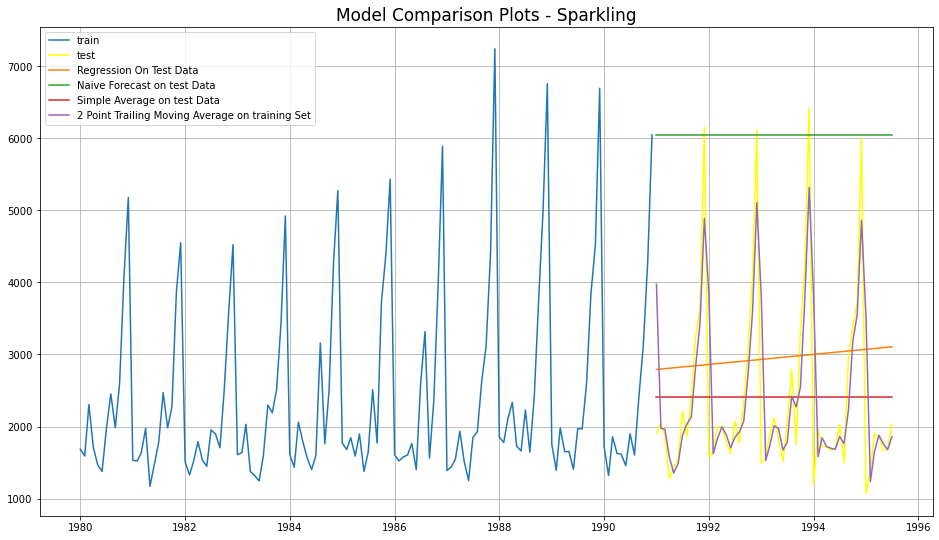

In [264]:
## Plotting on both rtraining and rtest data

plt.plot(strain['Sparkling'], label='train')
plt.plot(stest['Sparkling'], label='test', c='yellow')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots - Sparkling", fontsize=17)
plt.grid();

## SES - ETS(A, N, N) - Simple Exponential Smoothing with additive errors - SPARKLING Wine Sales.

### SimpleExpSmoothing class must be instantiated and passed the training data.

### The fit() function is then called providing the fit configuration, the alpha value, smoothing_level. If this is omitted or set to None, the model will automatically optimize the value

In [265]:
SES_train = strain.copy()
SES_test = stest.copy()

In [266]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'], initialization_method='estimated')

In [267]:
model_SES_autofit = model_SES.fit(optimized=True)

In [268]:
model_SES_autofit.params

{'smoothing_level': 0.07028442075641193,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1763.8402828521703,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [269]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(stest))
SES_test

Sparkling      predict
YearMonth                         
1991-01-01       1902  2804.650301
1991-02-01       2049  2804.650301
1991-03-01       1874  2804.650301
1991-04-01       1279  2804.650301
1991-05-01       1432  2804.650301
1991-06-01       1540  2804.650301
1991-07-01       2214  2804.650301
1991-08-01       1857  2804.650301
1991-09-01       2408  2804.650301
1991-10-01       3252  2804.650301
1991-11-01       3627  2804.650301
1991-12-01       6153  2804.650301
1992-01-01       1577  2804.650301
1992-02-01       1667  2804.650301
1992-03-01       1993  2804.650301
1992-04-01       1997  2804.650301
1992-05-01       1783  2804.650301
1992-06-01       1625  2804.650301
1992-07-01       2076  2804.650301
1992-08-01       1773  2804.650301
1992-09-01       2377  2804.650301
1992-10-01       3088  2804.650301
1992-11-01       4096  2804.650301
1992-12-01       6119  2804.650301
1993-01-01       1494  2804.650301
1993-02-01       1564  2804.650301
1993-03-01       1898  2804.650301
1993-04-01       2121  2804.650301
1993-05-01       1831  2804.650301
1993-06-01       1515  2804.650301
1993-07-01       2048  2804.650301
1993-08-01       2795  2804.650301
1993-09-01       1749  2804.650301
1993-10-01       3339  2804.650301
1993-11-01       4227  2804.650301
1993-12-01       6410  2804.650301
1994-01-01       1197  2804.650301
1994-02-01       1968  2804.650301
1994-03-01       1720  2804.650301
1994-04-01       1725  2804.650301
1994-05-01       1674  2804.650301
1994-06-01       1693  2804.650301
1994-07-01       2031  2804.650301
1994-08-01       1495  2804.650301
1994-09-01       2968  2804.650301
1994-10-01       3385  2804.650301
1994-11-01       3729  2804.650301
1994-12-01       5999  2804.650301
1995-01-01       1070  2804.650301
1995-02-01       1402  2804.650301
1995-03-01       1897  2804.650301
1995-04-01       1862  2804.650301
1995-05-01       1670  2804.650301
1995-06-01       1688  2804.650301
1995-07-01       2031  2804.650301

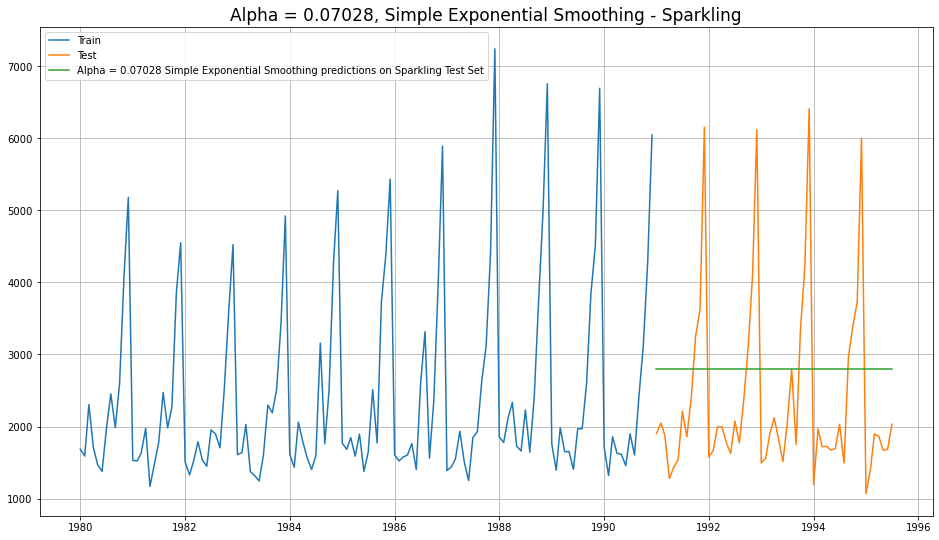

In [270]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_test['predict'], label='Alpha = 0.07028 Simple Exponential Smoothing predictions on Sparkling Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.07028, Simple Exponential Smoothing - Sparkling', fontsize=17);

In [271]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [272]:
print('SES RMSE:',mean_squared_error(stest.values,SES_test['predict'].values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(rtest.values,SES_test['predict'].values)[0])

SES RMSE: 1338.0008612252468
SES RMSE (calculated using statsmodels): 2750.840900239387


In [273]:
resultsDf_sses = pd.DataFrame({'Test RMSE Sparkling': [em.rmse(stest.values,SES_test['predict'].values)[0]]},index=['Simple Exponential Smoothing'])
resultsDf_sses

Test RMSE Sparkling
Simple Exponential Smoothing          1338.000861

## Model 6: Holt - ETS(A, A, N) - Holt's linear method with additive errors - Rose Wine Sales.

## Double Exponential Smoothing - Rose


* One of the drawbacks of the simple exponential smoothing is that the model does not do well in the presence of the trend.
* This model is an extension of SES known as Double Exponential model which estimates two smoothing parameters.
* Applicable when data has Trend but no seasonality.
* Two separate components are considered: Level and Trend.
* Level is the local mean.
* One smoothing parameter α corresponds to the level series
* A second smoothing parameter β corresponds to the trend series.

### Two parameters 𝛼 and 𝛽 are estimated in this model. Level and Trend are accounted for in this model.

In [274]:
DES_train = strain.copy()
DES_test = stest.copy() 

In [275]:
model_DES = Holt(DES_train['Sparkling'], initialization_method='estimated')

In [276]:
# Fitting the model
model_DES = model_DES.fit()

In [277]:
print('')
print('Holt model Exponential Smoothing Estimated Parameters :')
print('')
print(model_DES.params)


Holt model Exponential Smoothing Estimated Parameters :

{'smoothing_level': 0.6649999999999999, 'smoothing_trend': 0.0001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.1999999999991, 'initial_trend': 74.87272727272739, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [278]:
# Forecasting using this model for the duration of the test set
DES_predict_spark =  model_DES.forecast(len(stest))
DES_predict_spark

1991-01-01    5401.733026
1991-02-01    5476.005230
1991-03-01    5550.277433
1991-04-01    5624.549637
1991-05-01    5698.821840
1991-06-01    5773.094044
1991-07-01    5847.366248
1991-08-01    5921.638451
1991-09-01    5995.910655
1991-10-01    6070.182858
1991-11-01    6144.455062
1991-12-01    6218.727266
1992-01-01    6292.999469
1992-02-01    6367.271673
1992-03-01    6441.543876
1992-04-01    6515.816080
1992-05-01    6590.088284
1992-06-01    6664.360487
1992-07-01    6738.632691
1992-08-01    6812.904894
1992-09-01    6887.177098
1992-10-01    6961.449302
1992-11-01    7035.721505
1992-12-01    7109.993709
1993-01-01    7184.265912
1993-02-01    7258.538116
1993-03-01    7332.810320
1993-04-01    7407.082523
1993-05-01    7481.354727
1993-06-01    7555.626930
1993-07-01    7629.899134
1993-08-01    7704.171338
1993-09-01    7778.443541
1993-10-01    7852.715745
1993-11-01    7926.987948
1993-12-01    8001.260152
1994-01-01    8075.532356
1994-02-01    8149.804559
1994-03-01  

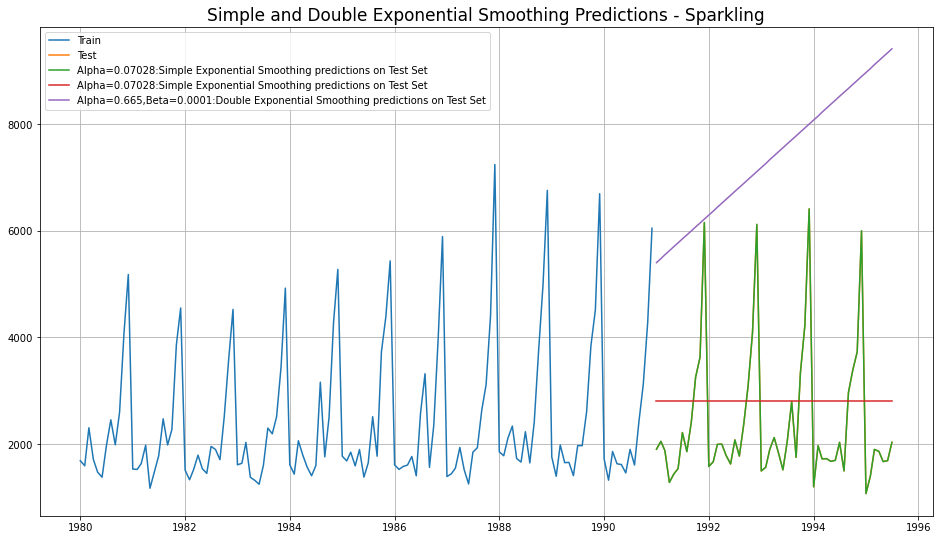

In [279]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_test, label='Alpha=0.07028:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions - Sparkling', fontsize=17);

In [280]:
print('DES RMSE:',mean_squared_error(stest.values,DES_predict_spark.values,squared=False))

DES RMSE: 5291.8798332269125


In [281]:
resultsDf_71 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,DES_predict_spark.values,squared=False)]}
                           ,index=['Double Exponential Smoothing'])
resultsDf_dses = pd.concat([resultsDf_sses, resultsDf_71], axis=0)
resultsDf_dses

Test RMSE Sparkling
Simple Exponential Smoothing          1338.000861
Double Exponential Smoothing          5291.879833